In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.optimize import linprog
import matplotlib.pyplot as plt

# 1. GoogleAds Performance

In [2]:
googleads_performance = pd.read_csv("googlead-performance2.csv")
googleads_performance

,Date,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue
0,2024-01-01,Cross-network,216382.0,2765.0,1957.4,136.1,17835.5
1,2024-01-01,Display Network,3873.0,85.0,27.2,1.0,84.6
2,2024-01-01,Search Network,6856.0,753.0,917.3,54.7,8777.1
3,2024-01-02,Cross-network,236636.0,2750.0,2055.9,148.9,19639.5
4,2024-01-02,Display Network,5030.0,96.0,26.7,0.8,91.2
...,...,...,...,...,...,...,...
465,2024-06-28,Search Network,6793.0,672.0,586.2,55.4,9464.4
466,2024-06-29,Cross-network,183267.0,2125.0,1500.3,111.1,11849.8
467,2024-06-29,Search Network,7788.0,727.0,660.8,54.8,7517.2
468,2024-06-30,Cross-network,207606.0,2360.0,1724.2,118.6,15217.4


In [3]:
googleads_performance.head()

,Date,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue
0,2024-01-01,Cross-network,216382.0,2765.0,1957.4,136.1,17835.5
1,2024-01-01,Display Network,3873.0,85.0,27.2,1.0,84.6
2,2024-01-01,Search Network,6856.0,753.0,917.3,54.7,8777.1
3,2024-01-02,Cross-network,236636.0,2750.0,2055.9,148.9,19639.5
4,2024-01-02,Display Network,5030.0,96.0,26.7,0.8,91.2


In [4]:
googleads_performance.tail()

,Date,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue
465,2024-06-28,Search Network,6793.0,672.0,586.2,55.4,9464.4
466,2024-06-29,Cross-network,183267.0,2125.0,1500.3,111.1,11849.8
467,2024-06-29,Search Network,7788.0,727.0,660.8,54.8,7517.2
468,2024-06-30,Cross-network,207606.0,2360.0,1724.2,118.6,15217.4
469,2024-06-30,Search Network,8161.0,728.0,649.5,50.0,7851.0


In [5]:
googleads_performance.shape

(470, 7)

In [6]:
googleads_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           470 non-null    object 
 1   Campaign type  470 non-null    object 
 2   Impressions    470 non-null    float64
 3   Clicks         470 non-null    float64
 4   Cost           470 non-null    float64
 5   Conversions    470 non-null    float64
 6   Revenue        470 non-null    float64
dtypes: float64(5), object(2)
memory usage: 25.8+ KB


In [7]:
googleads_performance.columns

Index(['Date', 'Campaign type', 'Impressions', 'Clicks', 'Cost', 'Conversions',
       'Revenue'],
      dtype='object')

In [8]:
googleads_performance['Campaign type'].unique()

array(['Cross-network', 'Display Network', 'Search Network'], dtype=object)

In [9]:
googleads_performance.describe()

,Impressions,Clicks,Cost,Conversions,Revenue
count,470.000000,470.000000,470.000000,470.000000,470.000000
mean,83660.123404,1283.489362,1055.711702,76.038298,11733.801489
std,104072.597175,1132.614988,835.493118,54.224895,7871.955734
min,800.000000,29.000000,4.600000,0.000000,0.000000
25%,5074.750000,668.500000,553.350000,43.200000,6980.750000
50%,8438.500000,867.000000,907.200000,73.250000,12625.800000
75%,181967.750000,2072.500000,1549.275000,112.250000,16930.125000
max,502368.000000,13429.000000,3646.400000,213.900000,33528.200000


In [10]:
googleads_performance.describe(include="object")

,Date,Campaign type
count,470,470
unique,182,3
top,2024-01-01,Cross-network
freq,3,182


In [11]:
googleads_performance.isnull()

,Date,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
465,False,False,False,False,False,False,False
466,False,False,False,False,False,False,False
467,False,False,False,False,False,False,False
468,False,False,False,False,False,False,False


In [12]:
googleads_performance.isnull().sum()

Date             0
Campaign type    0
Impressions      0
Clicks           0
Cost             0
Conversions      0
Revenue          0
dtype: int64

In [13]:
googleads_performance.drop(columns=["Date"], axis=1, inplace=True)

<Axes: xlabel='Impressions'>

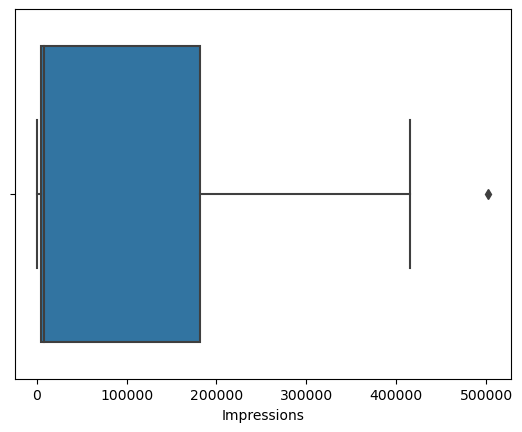

In [14]:
sns.boxplot(x="Impressions", data=googleads_performance)

<Axes: xlabel='Clicks'>

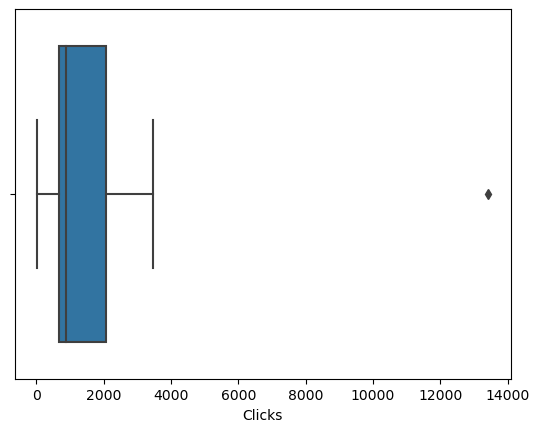

In [15]:
sns.boxplot(x="Clicks", data=googleads_performance)

<Axes: xlabel='Cost'>

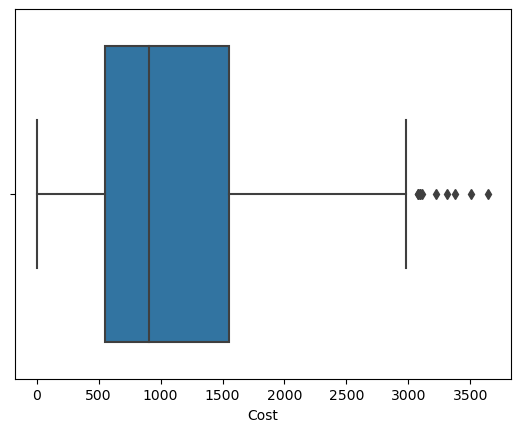

In [16]:
sns.boxplot(x="Cost", data=googleads_performance)

<Axes: xlabel='Conversions'>

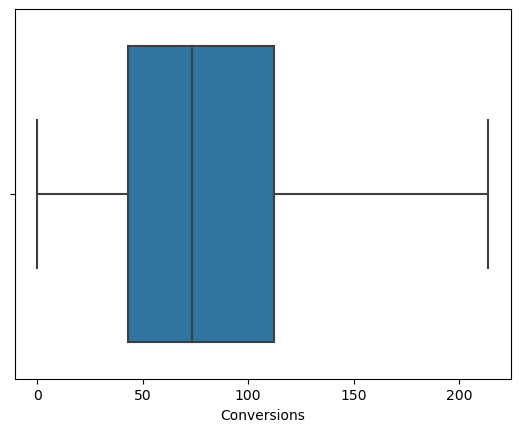

In [17]:
sns.boxplot(x="Conversions", data=googleads_performance)

<Axes: xlabel='Revenue'>

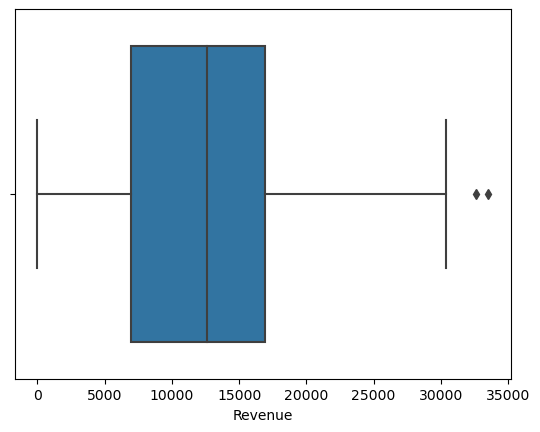

In [18]:
sns.boxplot(x="Revenue", data=googleads_performance)

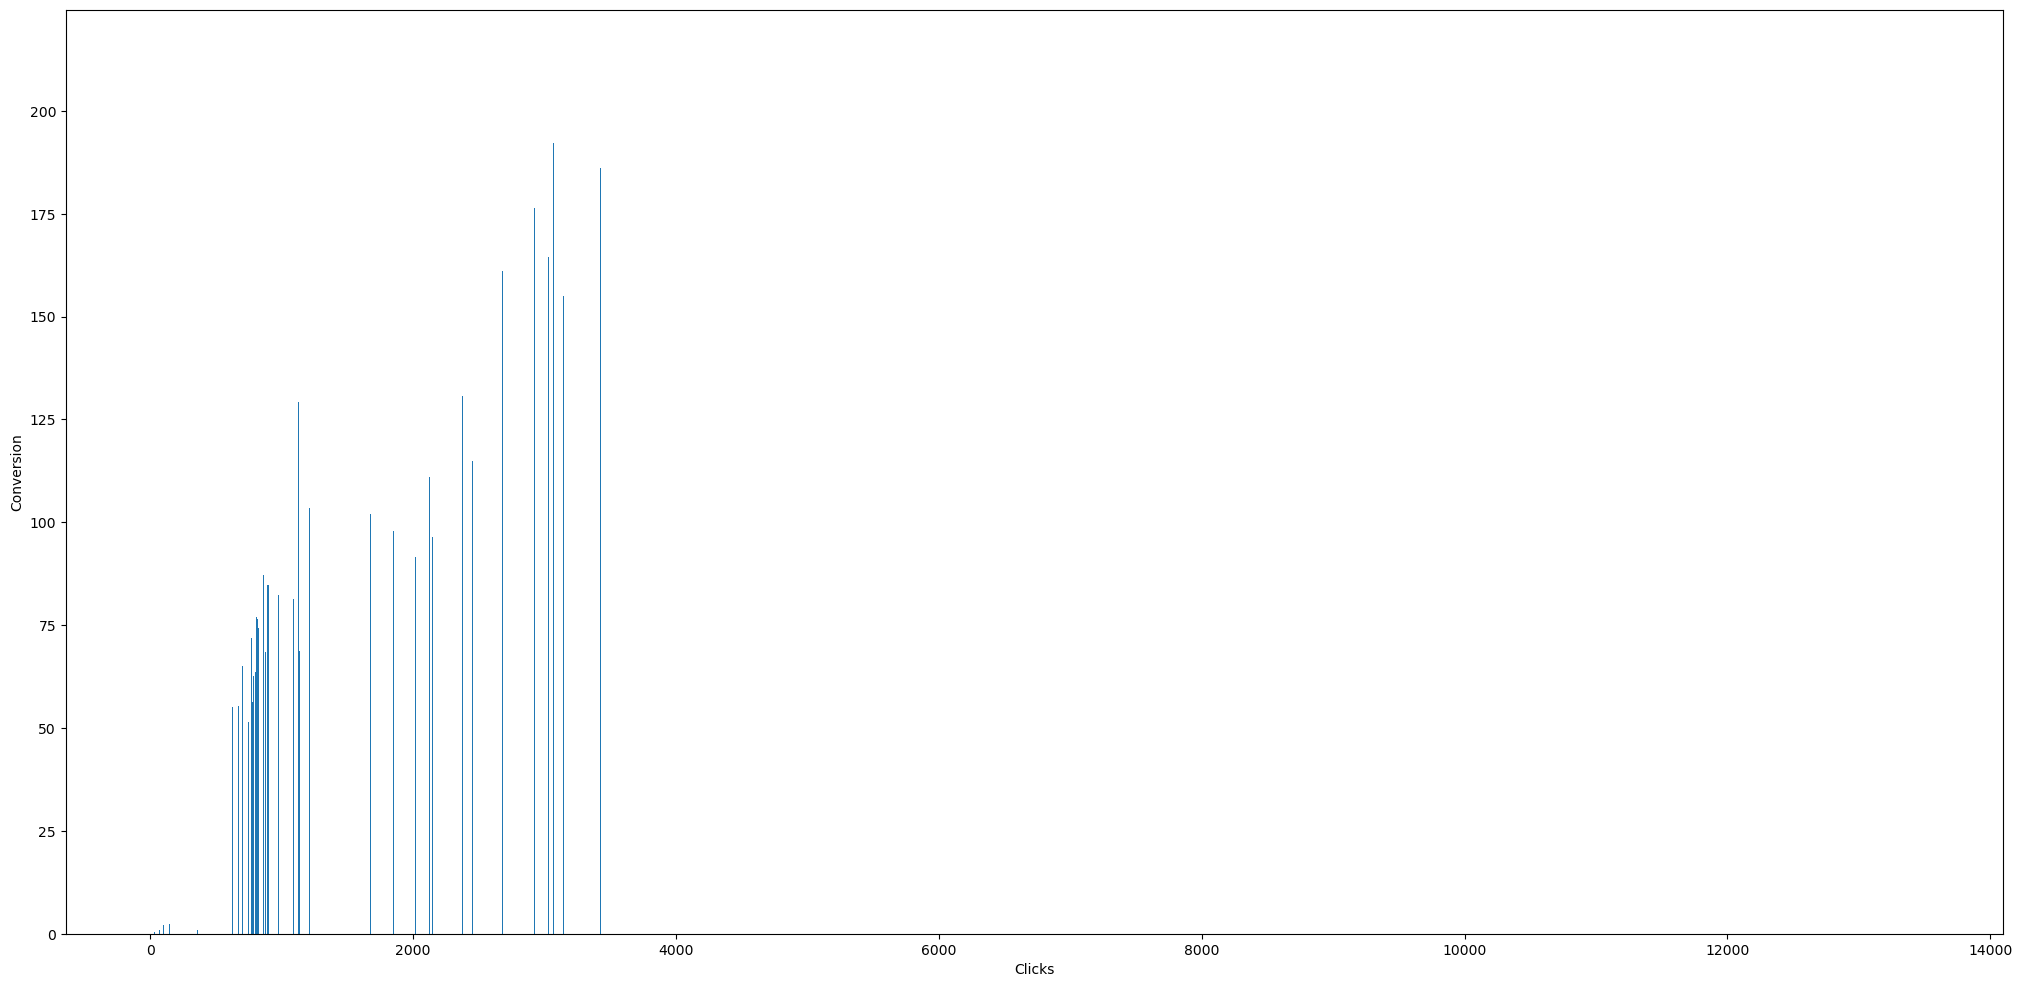

In [19]:
plt.figure(figsize=(25,12))
plt.bar(googleads_performance['Clicks'], googleads_performance['Conversions'])
plt.xlabel("Clicks")
plt.ylabel("Conversion")
plt.show()

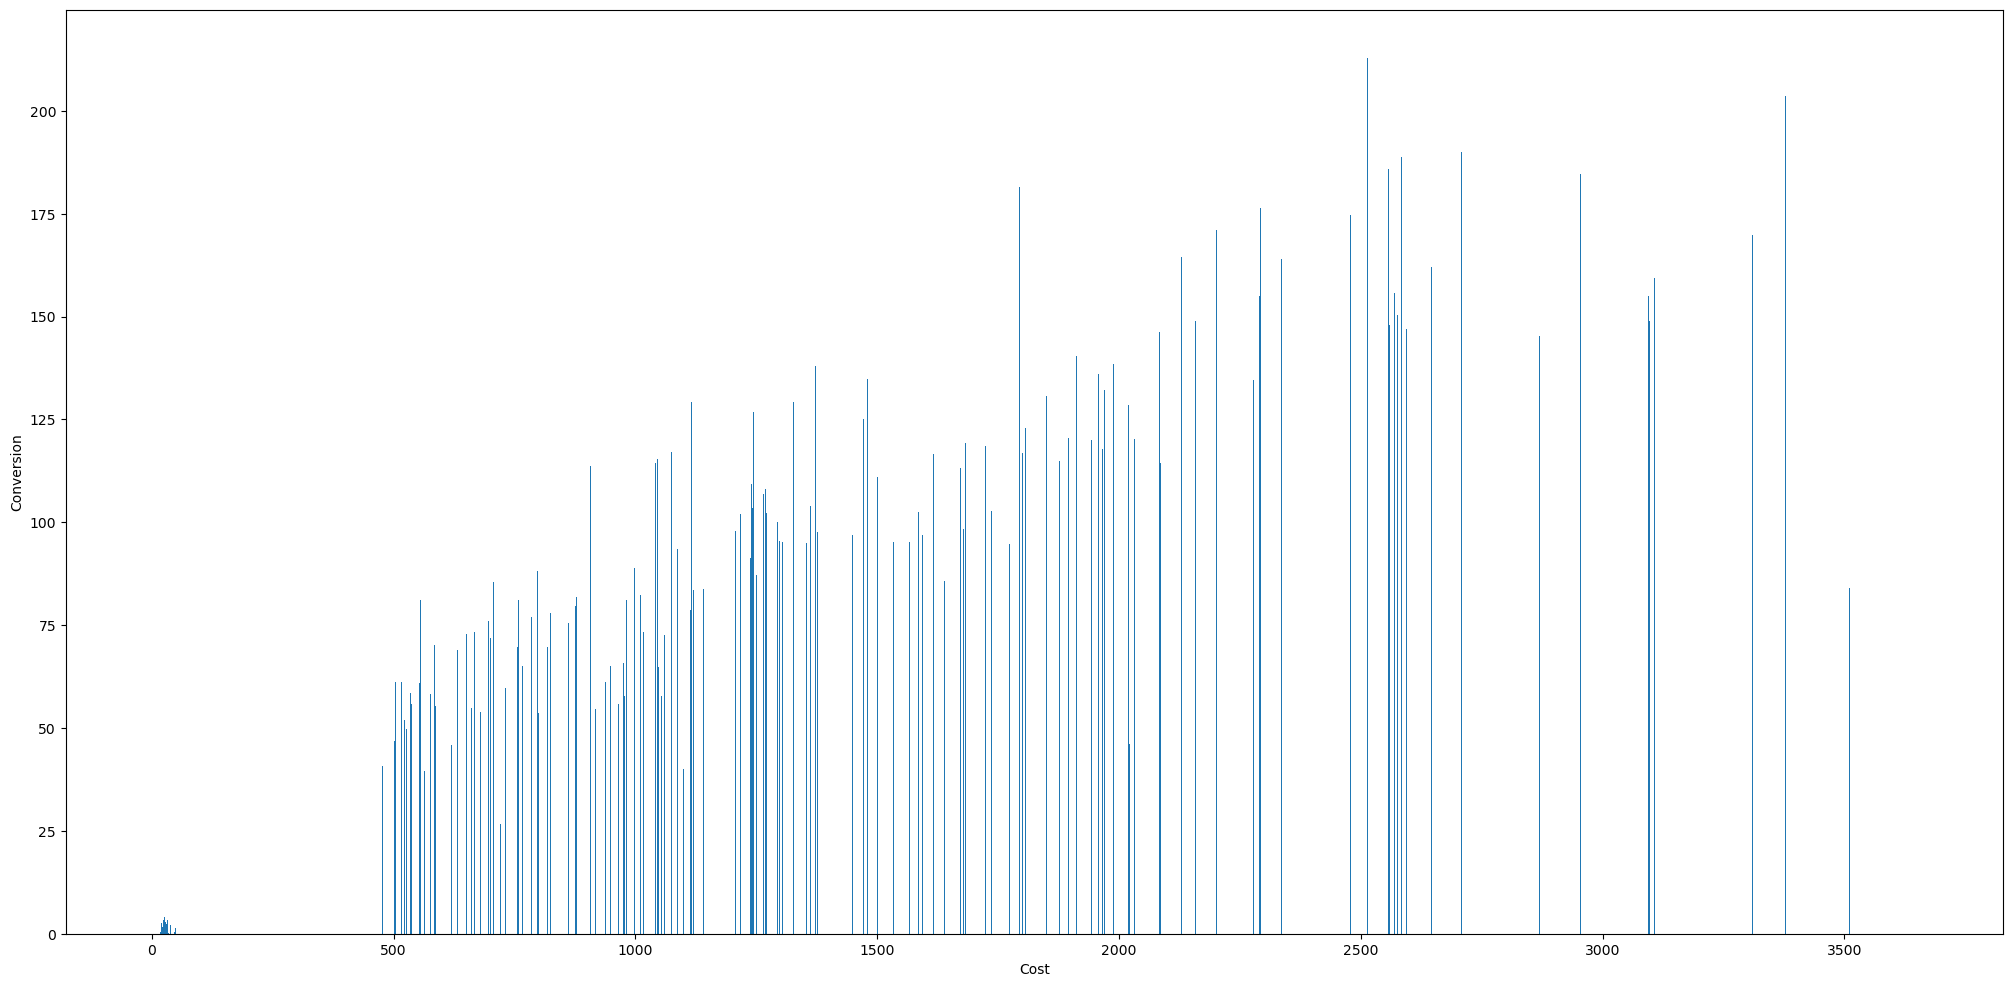

In [20]:
plt.figure(figsize=(25,12))
plt.bar(googleads_performance['Cost'], googleads_performance['Conversions'])
plt.xlabel("Cost")
plt.ylabel("Conversion")
plt.show()

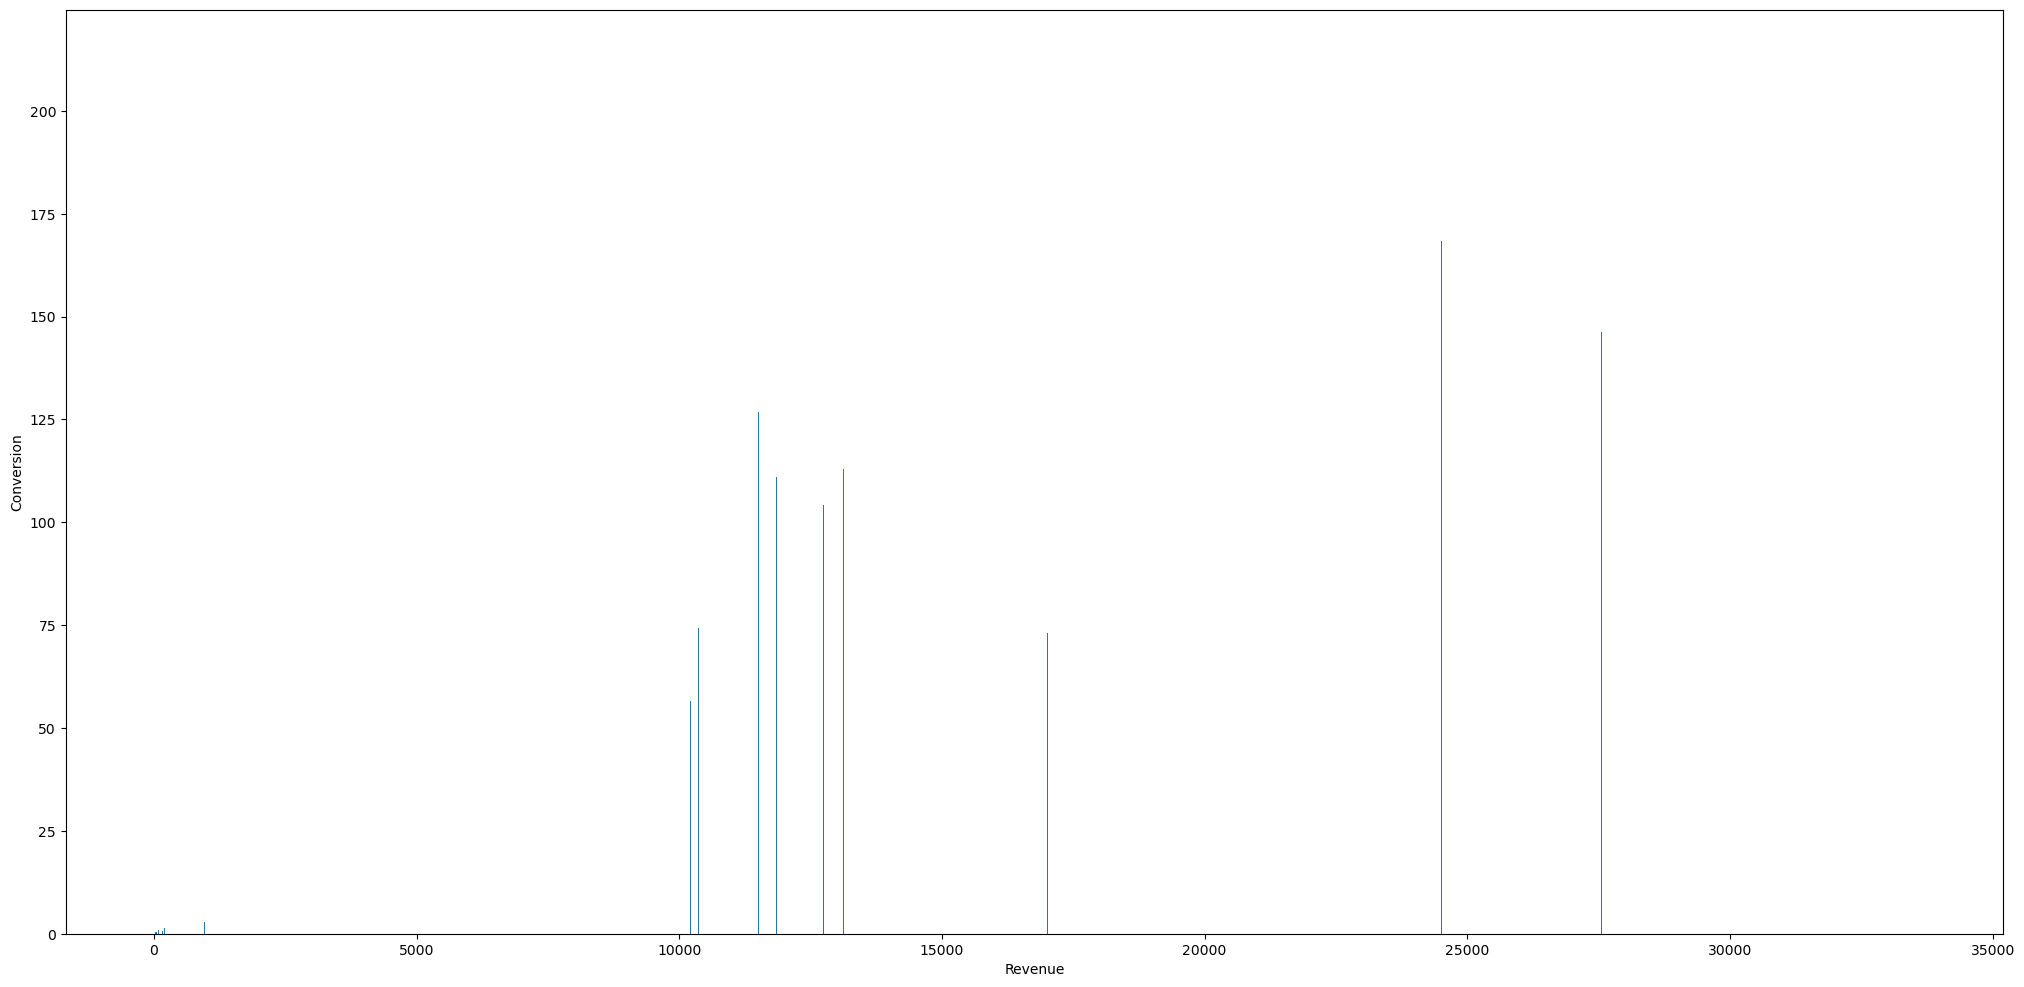

In [21]:
plt.figure(figsize=(25,12))
plt.bar(googleads_performance['Revenue'], googleads_performance['Conversions'])
plt.xlabel("Revenue")
plt.ylabel("Conversion")
plt.show()

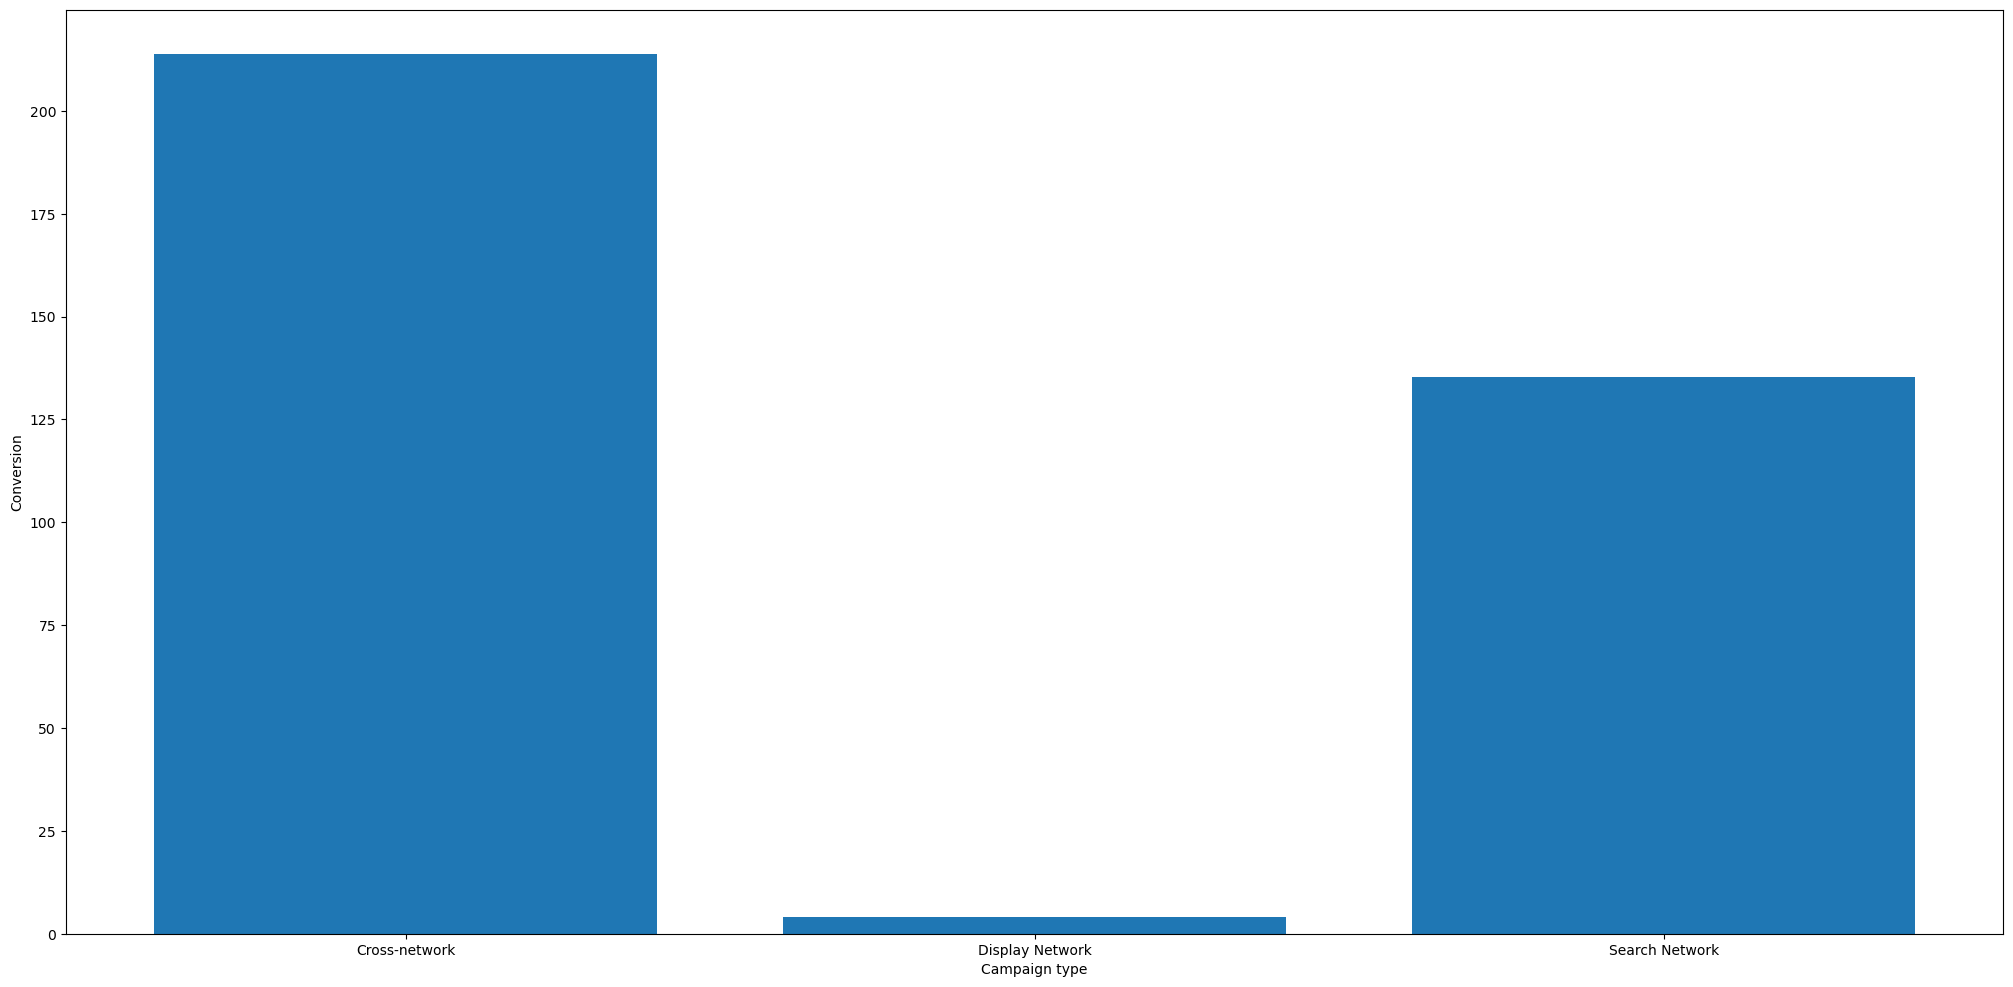

In [22]:
plt.figure(figsize=(25,12))
plt.bar(googleads_performance['Campaign type'], googleads_performance['Conversions'])
plt.xlabel("Campaign type")
plt.ylabel("Conversion")
plt.show()

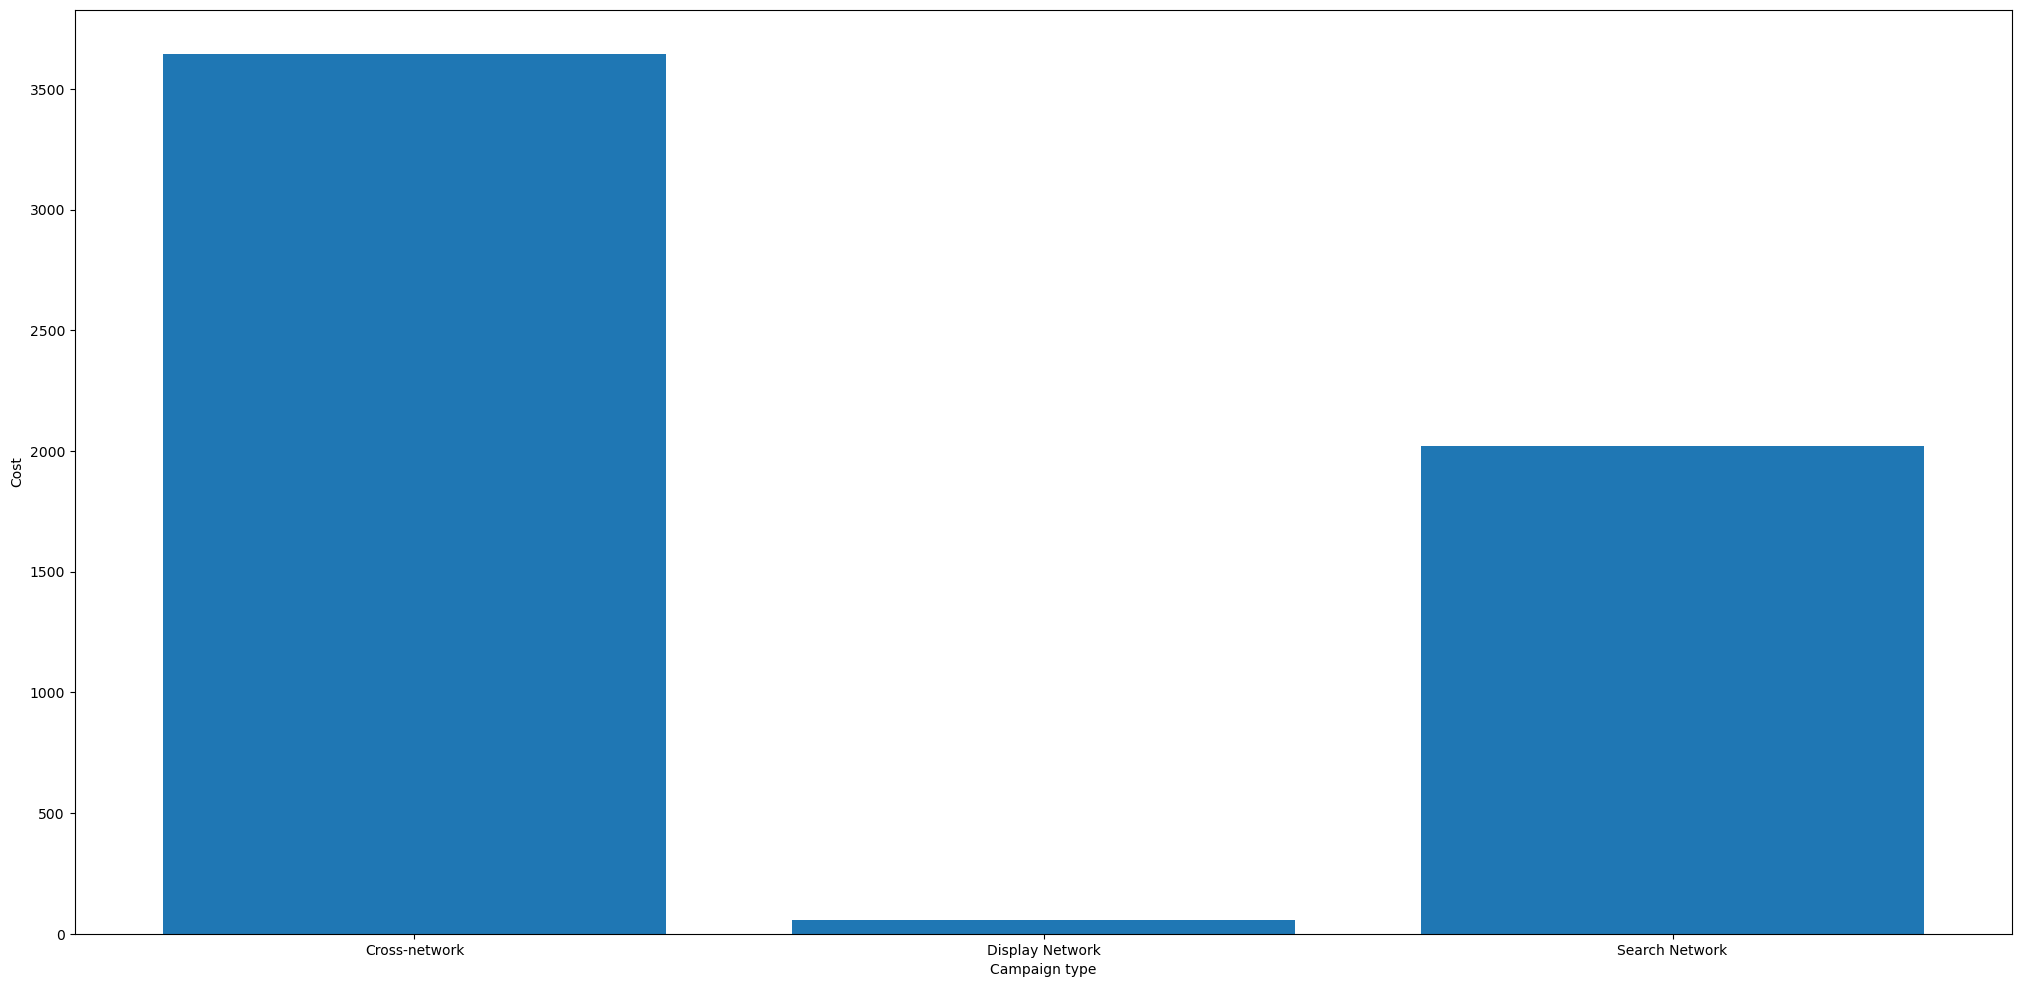

In [23]:
plt.figure(figsize=(25,12))
plt.bar(googleads_performance['Campaign type'], googleads_performance['Cost'])
plt.xlabel("Campaign type")
plt.ylabel("Cost")
plt.show()

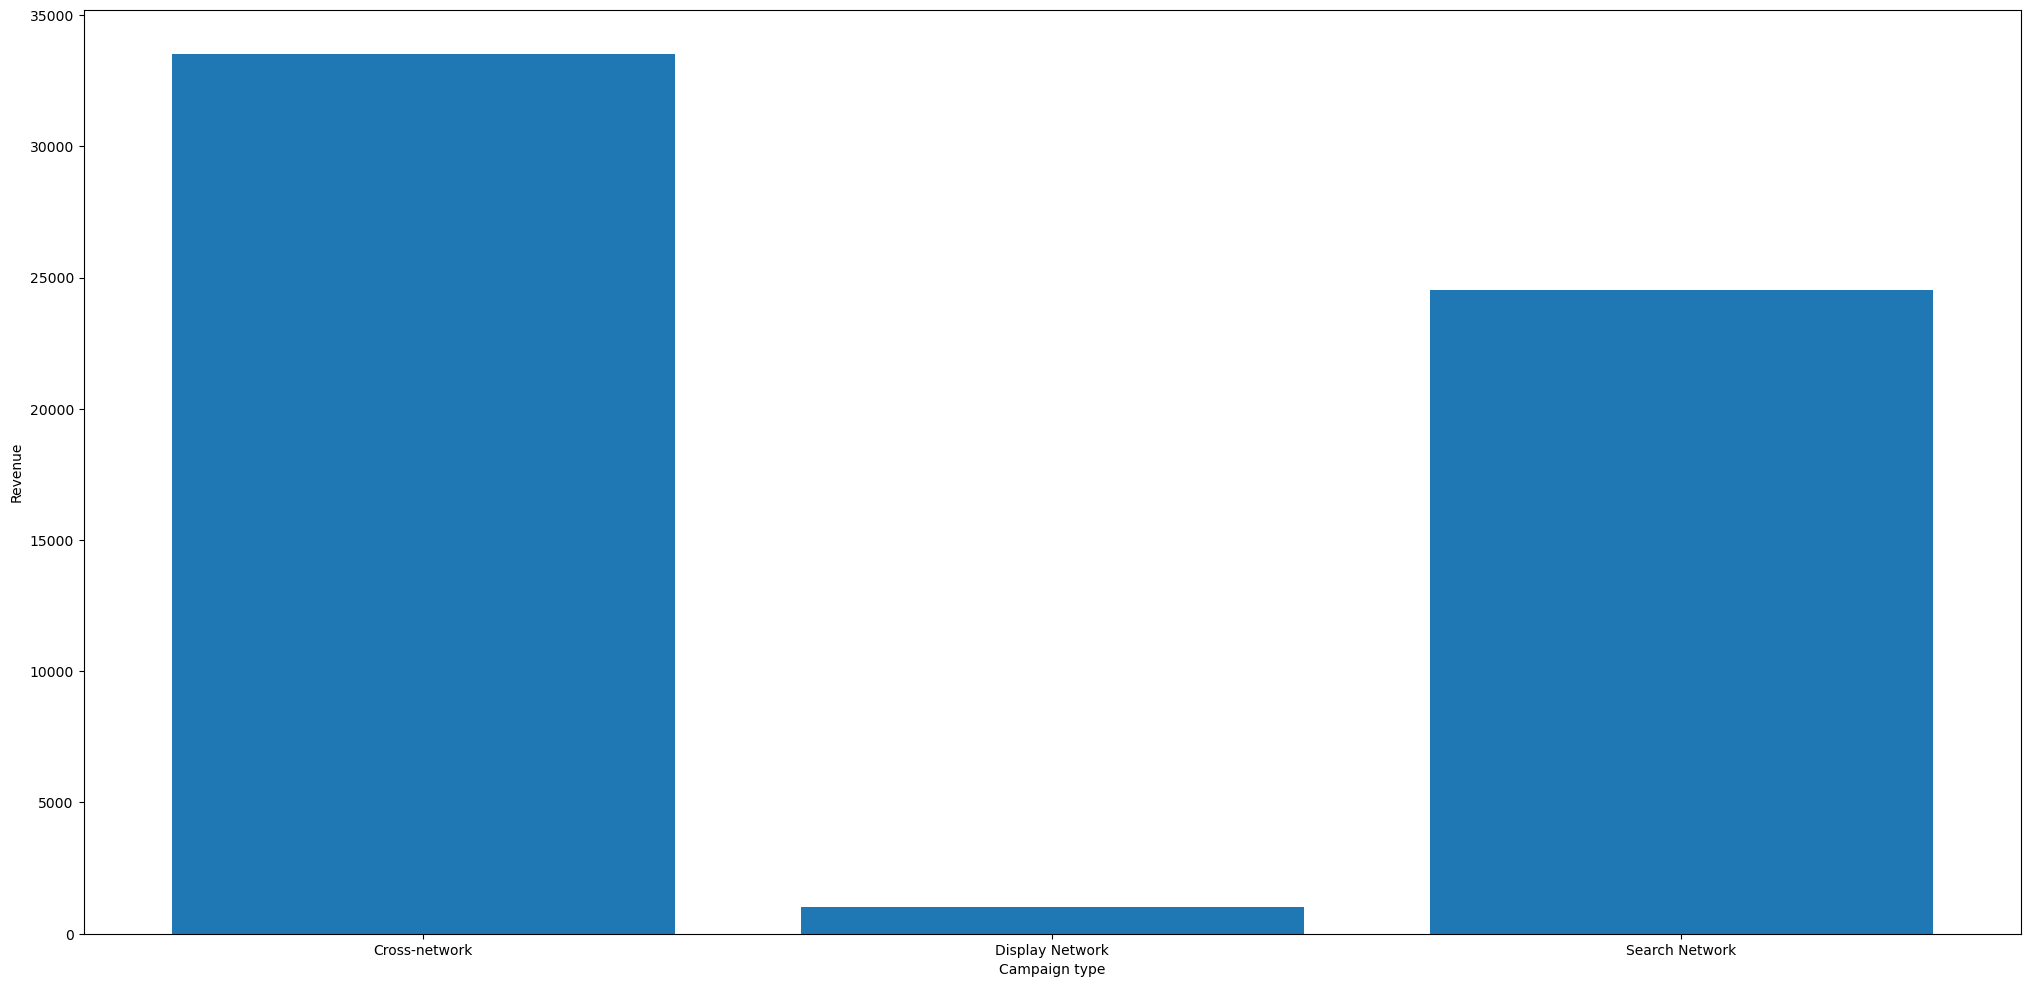

In [24]:
plt.figure(figsize=(25,12))
plt.bar(googleads_performance['Campaign type'], googleads_performance['Revenue'])
plt.xlabel("Campaign type")
plt.ylabel("Revenue")
plt.show()

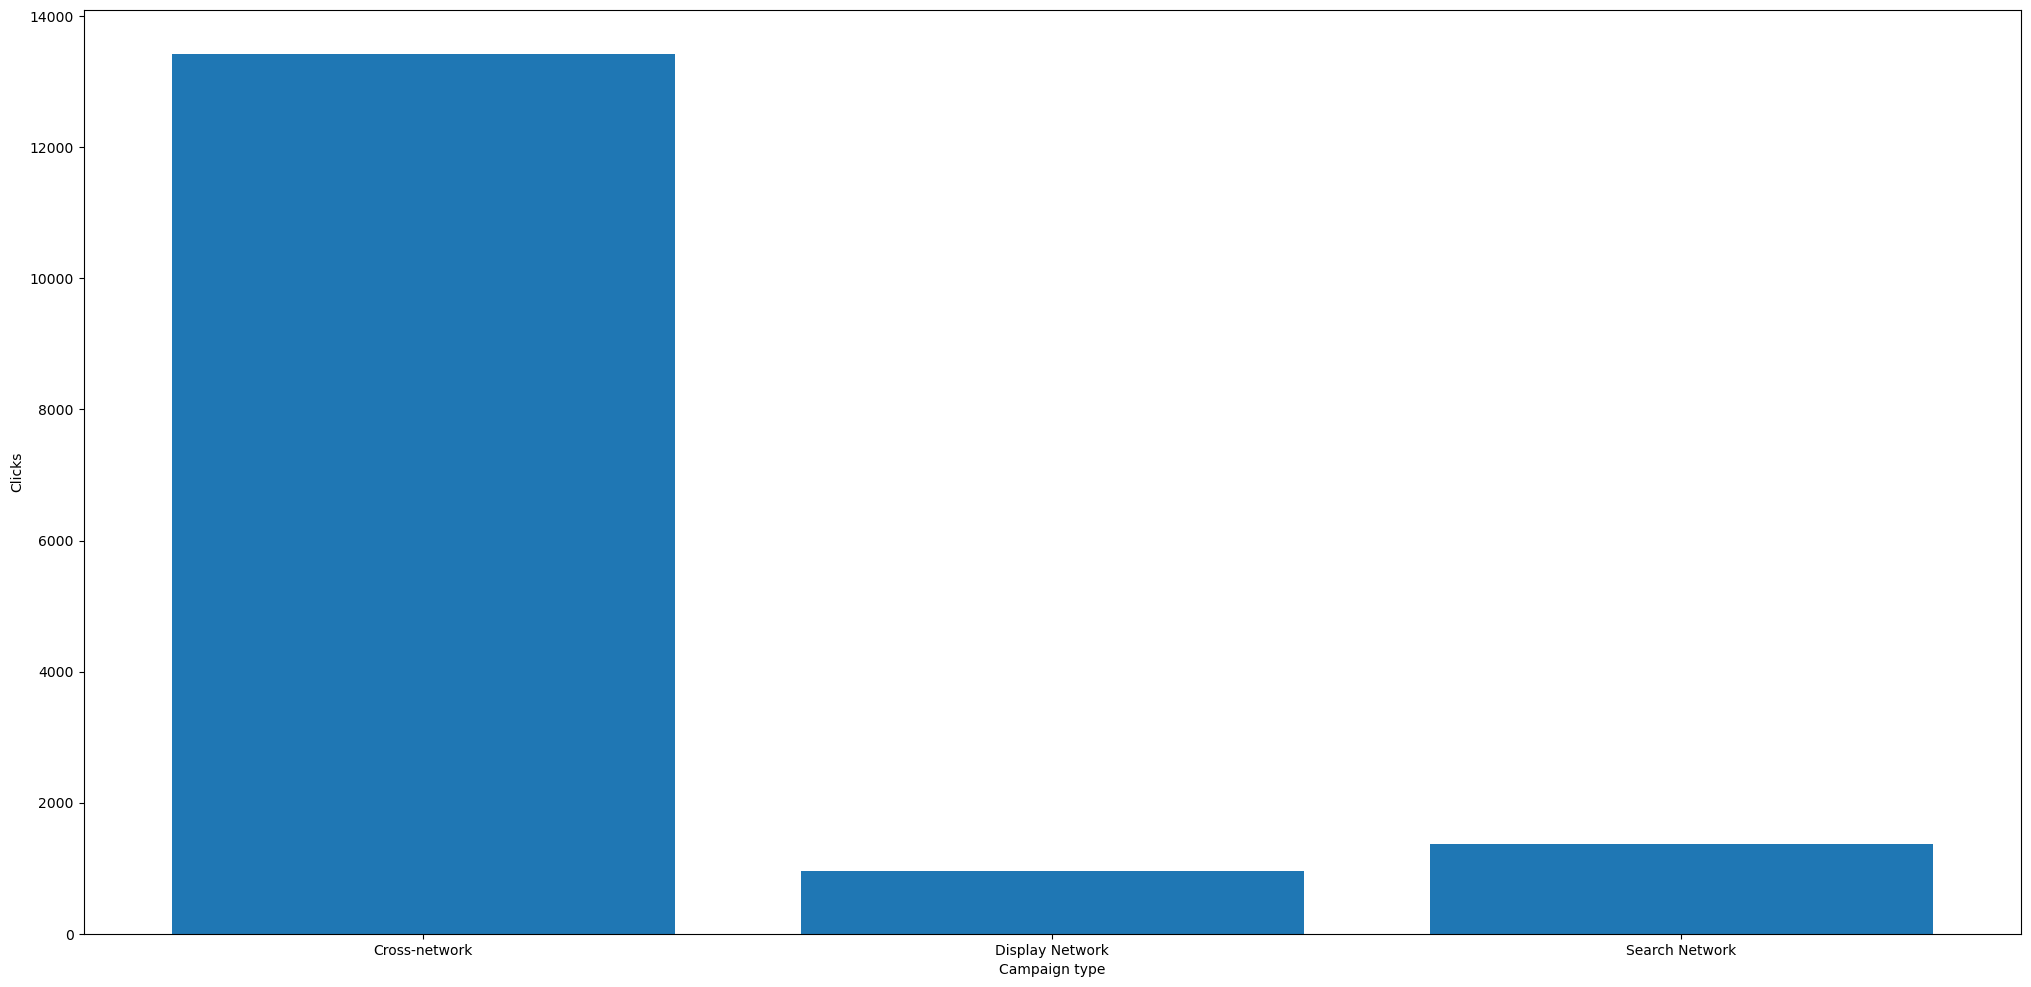

In [25]:
plt.figure(figsize=(25,12))
plt.bar(googleads_performance['Campaign type'], googleads_performance['Clicks'])
plt.xlabel("Campaign type")
plt.ylabel("Clicks")
plt.show()

In [26]:
corr=googleads_performance.corr()
corr.style.background_gradient(cmap="coolwarm")

C:\Users\nensi\AppData\Local\Temp\ipykernel_24312\1310118654.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=googleads_performance.corr()


,Impressions,Clicks,Cost,Conversions,Revenue
Impressions,1.000000,0.898181,0.892989,0.806426,0.638915
Clicks,0.898181,1.000000,0.882661,0.832914,0.714052
Cost,0.892989,0.882661,1.000000,0.923650,0.839240
Conversions,0.806426,0.832914,0.923650,1.000000,0.940502
Revenue,0.638915,0.714052,0.839240,0.940502,1.000000


<Axes: xlabel='Campaign type', ylabel='Cost'>

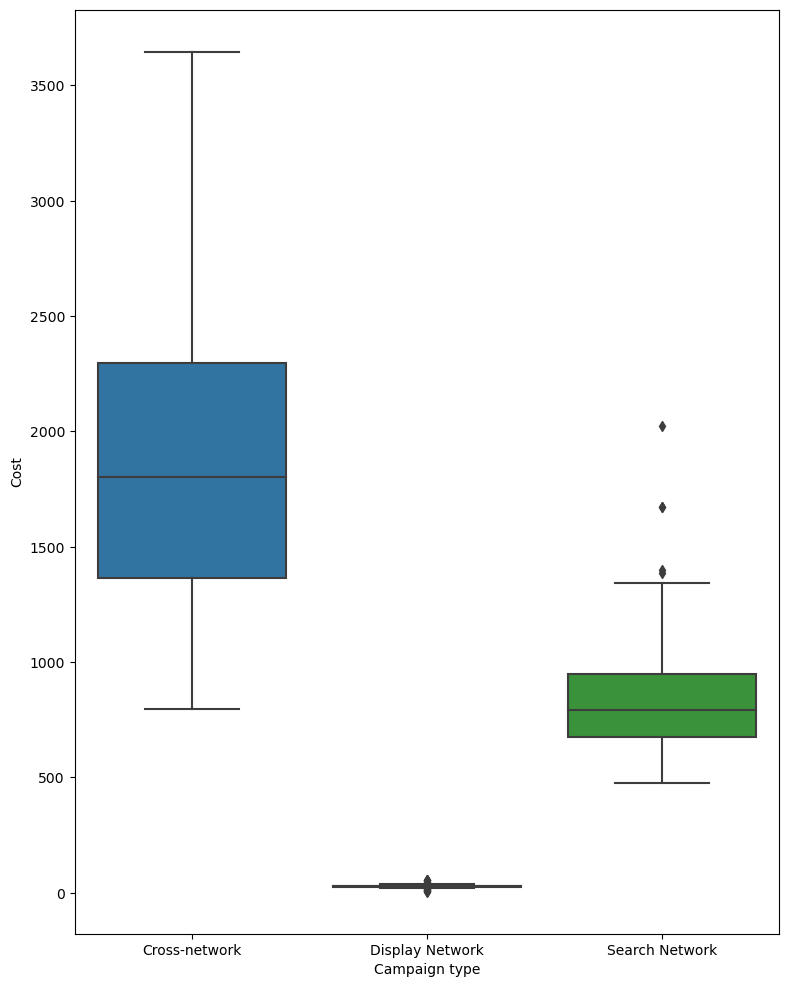

In [27]:
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
sns.boxplot(x="Campaign type", y="Cost", data=googleads_performance)

<Axes: xlabel='Campaign type', ylabel='Conversions'>

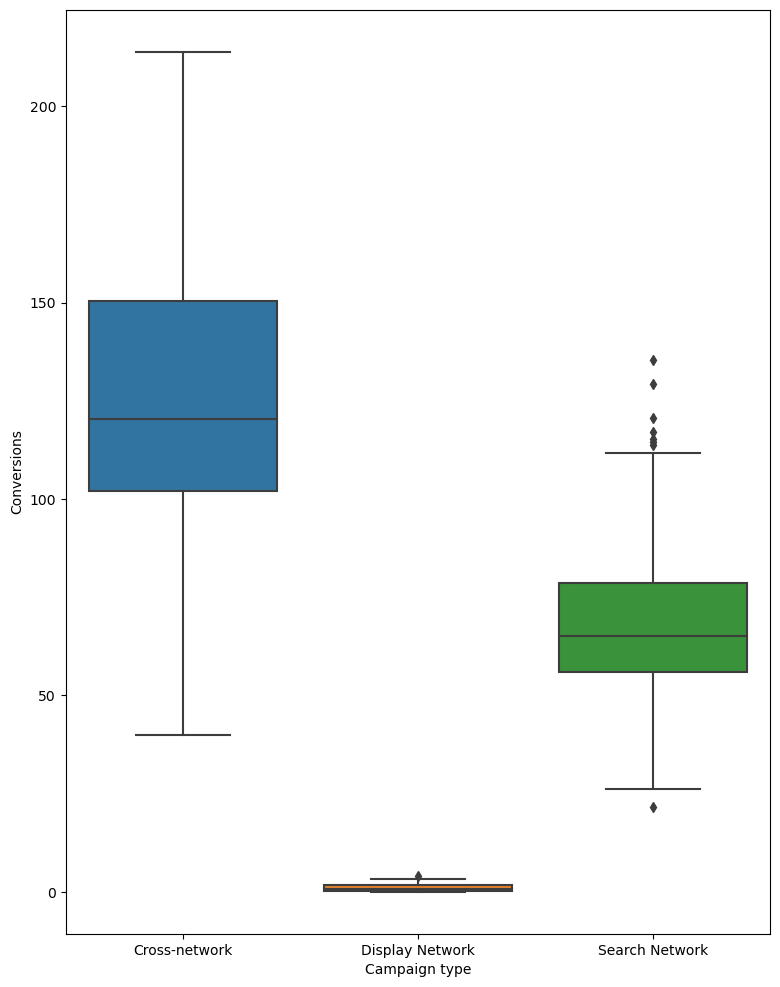

In [28]:
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
sns.boxplot(x="Campaign type", y="Conversions", data=googleads_performance)

<Axes: xlabel='Campaign type', ylabel='Revenue'>

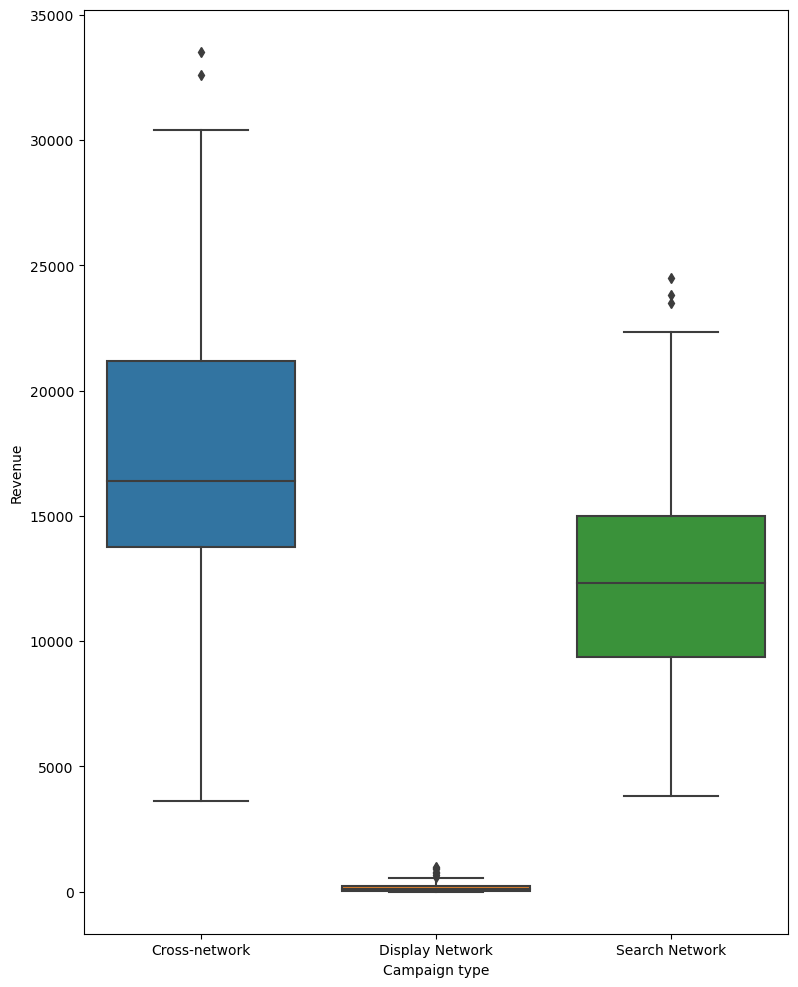

In [29]:
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
sns.boxplot(x="Campaign type", y="Revenue", data=googleads_performance)

<Axes: xlabel='Campaign type', ylabel='Clicks'>

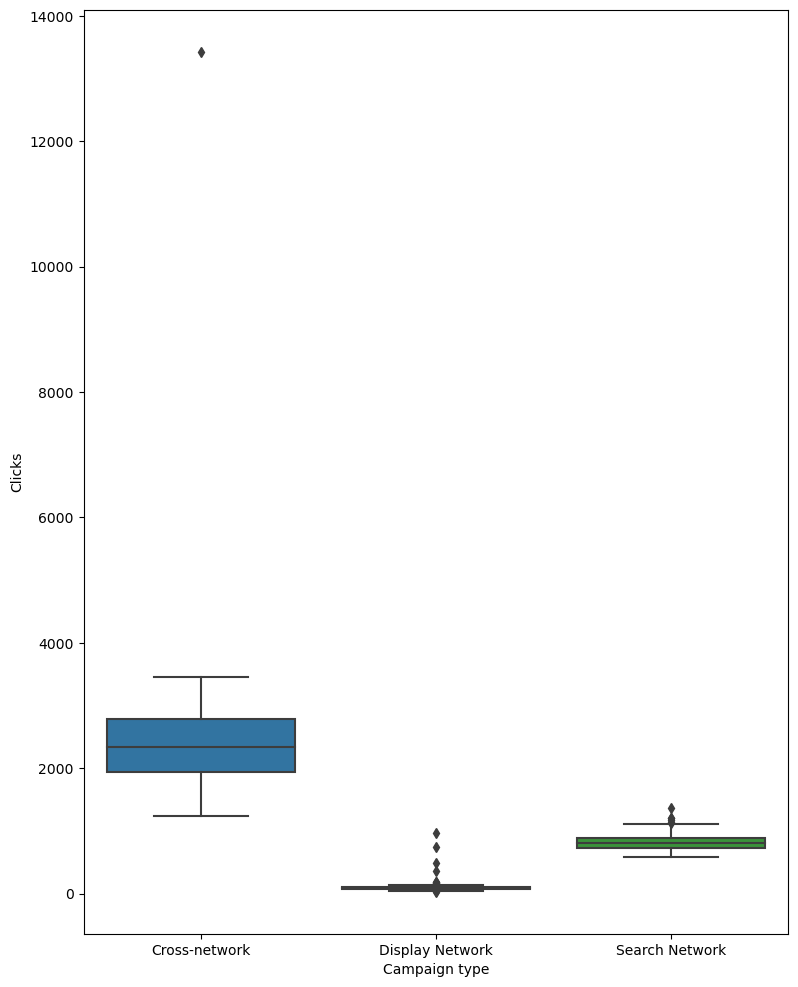

In [30]:
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
sns.boxplot(x="Campaign type", y="Clicks", data=googleads_performance)

<Axes: xlabel='Campaign type', ylabel='Impressions'>

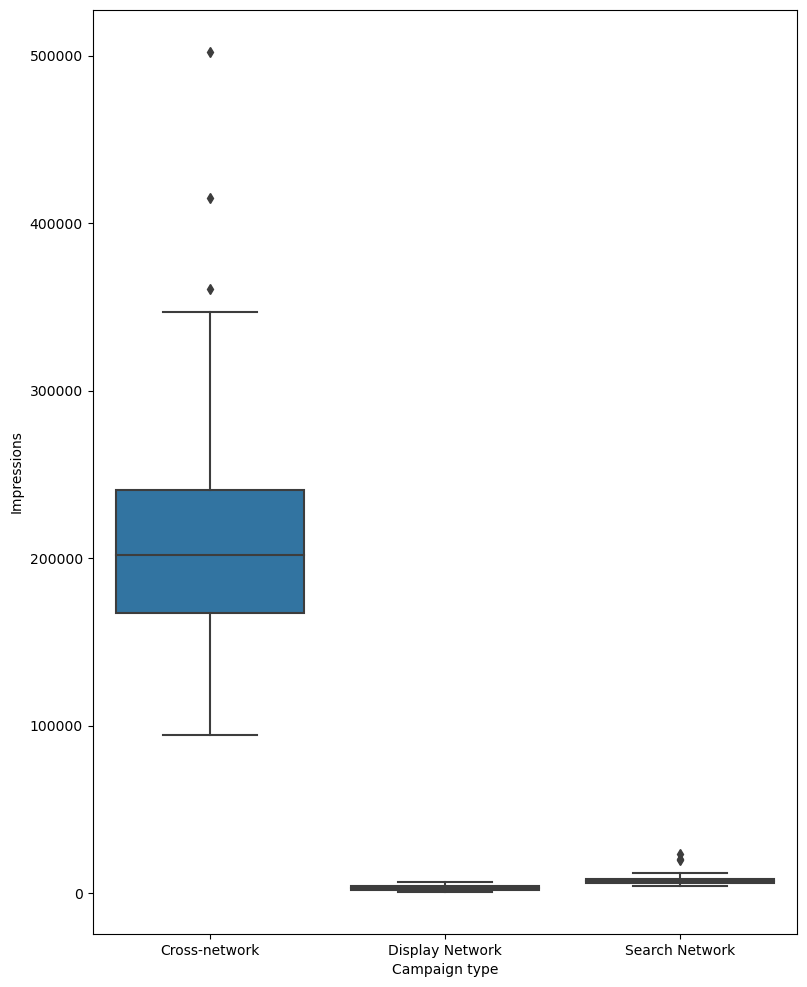

In [31]:
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
sns.boxplot(x="Campaign type", y="Impressions", data=googleads_performance)

In [32]:
numeric_columns=["Impressions", "Clicks", "Cost", "Conversions", "Revenue"]

In [33]:
scaler=StandardScaler()
data_scaled=googleads_performance.copy()
data_scaled[numeric_columns]=scaler.fit_transform(googleads_performance[numeric_columns])
print(scaler.mean_)

[8.36601234e+04 1.28348936e+03 1.05571170e+03 7.60382979e+01
 1.17338015e+04]


In [34]:
googleads_performance_Impressions_Q1 = googleads_performance["Impressions"].quantile(0.25)
googleads_performance_Impressions_Q3 = googleads_performance["Impressions"].quantile(0.75)
googleads_performance_Impressions_iqr = googleads_performance_Impressions_Q3 - googleads_performance_Impressions_Q1

In [35]:
upper_googleads_performance_Impressions = googleads_performance_Impressions_Q3 + 1.5 * googleads_performance_Impressions_iqr
lower_googleads_performance_Impressions = googleads_performance_Impressions_Q1 - 1.5 * googleads_performance_Impressions_iqr

In [36]:
googleads_performance[googleads_performance['Impressions'] > upper_googleads_performance_Impressions]

,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue
364,Cross-network,502368.0,13429.0,2861.7,155.3,18002.8


In [37]:
googleads_performance[googleads_performance['Impressions'] < lower_googleads_performance_Impressions]

,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue


In [38]:
googleads_performance_Clicks_Q1 = googleads_performance["Clicks"].quantile(0.25)
googleads_performance_Clicks_Q3 = googleads_performance["Clicks"].quantile(0.75)
googleads_performance_Clicks_iqr = googleads_performance_Clicks_Q3 - googleads_performance_Clicks_Q1

In [39]:
upper_googleads_performance_Clicks = googleads_performance_Clicks_Q3 + 1.5 * googleads_performance_Clicks_iqr
lower_googleads_performance_Clicks = googleads_performance_Clicks_Q1 - 1.5 * googleads_performance_Clicks_iqr

In [40]:
googleads_performance[googleads_performance['Clicks'] > upper_googleads_performance_Clicks]

,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue
364,Cross-network,502368.0,13429.0,2861.7,155.3,18002.8


In [41]:
googleads_performance[googleads_performance['Clicks'] < lower_googleads_performance_Clicks]

,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue


In [42]:
googleads_performance_Cost_Q1 = googleads_performance["Cost"].quantile(0.25)
googleads_performance_Cost_Q3 = googleads_performance["Cost"].quantile(0.75)
googleads_performance_Cost_iqr = googleads_performance_Cost_Q3 - googleads_performance_Cost_Q1

In [43]:
upper_googleads_performance_Cost = googleads_performance_Cost_Q3 + 1.5 * googleads_performance_Cost_iqr
lower_googleads_performance_Cost = googleads_performance_Cost_Q1 - 1.5 * googleads_performance_Cost_iqr

In [44]:
googleads_performance[googleads_performance['Cost'] > upper_googleads_performance_Cost]

,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue
344,Cross-network,415253.0,3072.0,3646.4,213.9,33528.2
352,Cross-network,340778.0,2883.0,3309.8,169.9,21024.8
356,Cross-network,347079.0,3144.0,3095.1,155.1,23955.8
358,Cross-network,360465.0,3007.0,3107.2,159.3,21708.0
362,Cross-network,322789.0,3035.0,3097.2,148.9,18813.5
400,Cross-network,281341.0,3360.0,3510.3,84.1,17940.0
402,Cross-network,257805.0,3165.0,3075.2,196.8,28175.2
418,Cross-network,258764.0,3457.0,3378.3,203.6,25304.8
420,Cross-network,272588.0,3344.0,3226.2,174.0,24842.6
422,Cross-network,262152.0,3376.0,3081.6,191.2,26524.7


In [45]:
googleads_performance[googleads_performance["Cost"] < lower_googleads_performance_Cost]

,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue


In [46]:
googleads_performance['Cost'] = np.where(
    googleads_performance['Cost'] > upper_googleads_performance_Cost,
    upper_googleads_performance_Cost,
    np.where(
    googleads_performance['Cost'] < lower_googleads_performance_Cost,
    lower_googleads_performance_Cost, googleads_performance['Cost']))

<Axes: xlabel='Cost'>

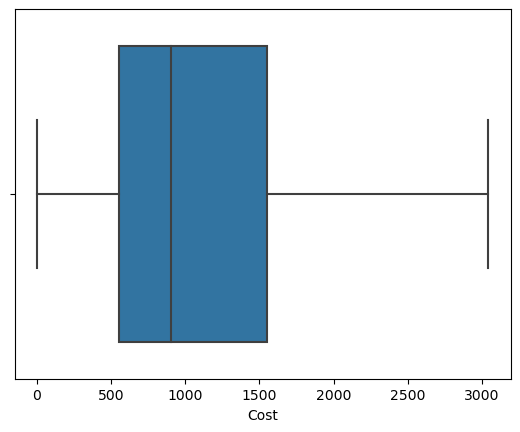

In [47]:
sns.boxplot(x="Cost", data=googleads_performance)

In [48]:
# Feature Engineering: Calculate conversion rates
googleads_performance['conversion_rate'] = googleads_performance['Conversions'] / googleads_performance['Clicks']

In [49]:
# Display summary statistics
googleads_performance.describe()

,Impressions,Clicks,Cost,Conversions,Revenue,conversion_rate
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,83660.123404,1283.489362,1051.252819,76.038298,11733.801489,0.055520
std,104072.597175,1132.614988,823.733980,54.224895,7871.955734,0.030365
min,800.000000,29.000000,4.600000,0.000000,0.000000,0.000000
25%,5074.750000,668.500000,553.350000,43.200000,6980.750000,0.040620
50%,8438.500000,867.000000,907.200000,73.250000,12625.800000,0.056654
75%,181967.750000,2072.500000,1549.275000,112.250000,16930.125000,0.078025
max,502368.000000,13429.000000,3043.162500,213.900000,33528.200000,0.130096


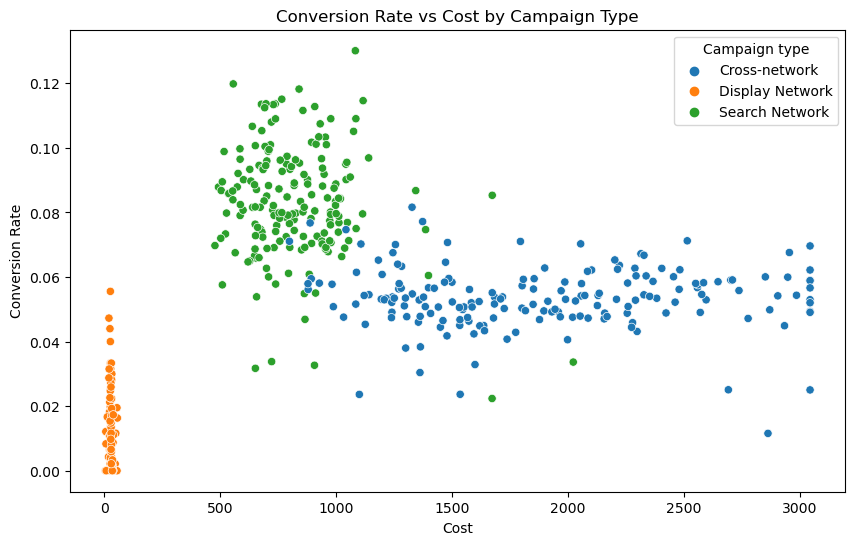

In [50]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Cost', y='conversion_rate', hue='Campaign type', data=googleads_performance)
plt.title('Conversion Rate vs Cost by Campaign Type')
plt.xlabel('Cost')
plt.ylabel('Conversion Rate')
plt.show()

In [51]:
# Define features (X) and target (y)
X = googleads_performance[['Cost', 'Impressions', 'Clicks']]
y = googleads_performance['Conversions']

In [52]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [54]:
# Predict conversions on the test set
y_pred = model.predict(X_test)

In [55]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [56]:
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')

Mean Absolute Error: 17.761386104096317
R2 Score: 0.2506550129141747


In [57]:
# Group by Campaign type to get conversion and cost data
campaign_performance = googleads_performance.groupby('Campaign type').agg({
    'Cost': 'sum',
    'Conversions': 'sum'
}).reset_index()
campaign_performance

,Campaign type,Cost,Conversions
0,Cross-network,341578.325,23165.9
1,Display Network,2951.700,108.1
2,Search Network,149558.800,12464.0


In [58]:
# Initialize parameters
n_campaigns = len(campaign_performance)  # Number of campaign types
total_budget = 200000  # Total budget to allocate
min_budget = 0.1 * total_budget  # Minimum budget allocation to each campaign
campaign_performance['Allocated Budget'] = min_budget  # Initialize with minimum budget

In [59]:
# Define Epsilon-Greedy parameters
epsilon = 0.1  # Exploration probability
n_rounds = 100  # Number of rounds (iterations) for budget allocation

In [60]:
# Track total conversions and budget allocated
total_conversions = 0
allocated_budgets = np.zeros(n_campaigns)

In [61]:
# Multi-Armed Bandit - Epsilon-Greedy Algorithm
for _ in range(n_rounds):
    # Exploration vs Exploitation
    if random.random() < epsilon:
        # Exploration: Randomly select a campaign
        campaign_index = random.randint(0, n_campaigns - 1)
    else:
        # Exploitation: Select the campaign with the best conversion rate
        conversion_rates = campaign_performance['Conversions'] / campaign_performance['Cost']
        campaign_index = np.argmax(conversion_rates)

    # Allocate a small portion of the remaining budget to the selected campaign
    remaining_budget = total_budget - campaign_performance['Allocated Budget'].sum()
    budget_to_allocate = remaining_budget / (n_rounds - _)

    campaign_performance.loc[campaign_index, 'Allocated Budget'] += budget_to_allocate

    # Update the total conversions
    conversion_rate = campaign_performance.loc[campaign_index, 'Conversions'] / campaign_performance.loc[campaign_index, 'Cost']
    total_conversions += conversion_rate * budget_to_allocate

In [62]:
# Print the final budget allocation and estimated conversions
print(campaign_performance[['Campaign type', 'Allocated Budget']])
print(f"Total Estimated Conversions: {total_conversions:.2f}")

     Campaign type  Allocated Budget
0    Cross-network           22800.0
1  Display Network           21400.0
2   Search Network          155800.0
Total Estimated Conversions: 11558.53


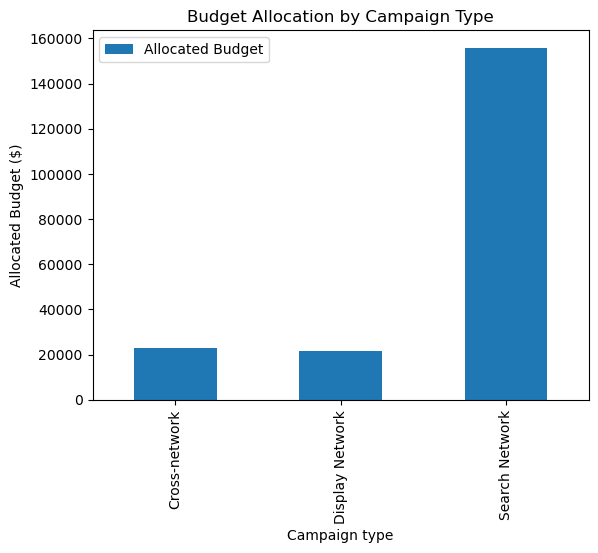

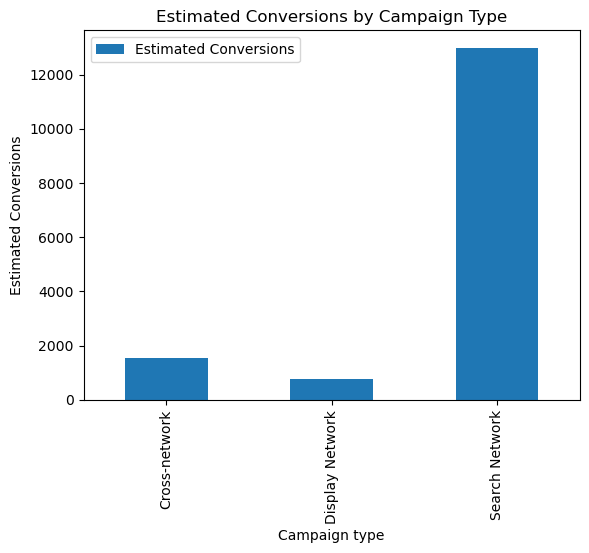

In [63]:
# Plot Allocated Budget vs. Campaign Type
campaign_performance.plot(kind='bar', x='Campaign type', y='Allocated Budget', title='Budget Allocation by Campaign Type')
plt.ylabel('Allocated Budget ($)')
plt.show()

# Plot Estimated Conversions vs. Campaign Type
campaign_performance['Estimated Conversions'] = campaign_performance['Allocated Budget'] * (campaign_performance['Conversions'] / campaign_performance['Cost'])
campaign_performance.plot(kind='bar', x='Campaign type', y='Estimated Conversions', title='Estimated Conversions by Campaign Type')
plt.ylabel('Estimated Conversions')
plt.show()


# 2. MetaAds Performance

In [64]:
metaads_performance = pd.read_csv("metaads-performance2.csv")
metaads_performance

,Date,Impressions,Reach,Cost,Clicks,Conversions,Revenue
0,2024-01-01,11560.0,7851.0,66.5,415.0,8.0,2258.3
1,2024-01-02,9674.0,6278.0,64.3,320.0,11.0,1894.2
2,2024-01-03,8640.0,5414.0,63.4,276.0,12.0,1808.1
3,2024-01-04,9057.0,5798.0,62.6,309.0,6.0,1962.0
4,2024-01-05,9448.0,6120.0,61.7,282.0,8.0,1763.5
...,...,...,...,...,...,...,...
177,2024-06-26,34980.0,20076.0,203.4,740.0,26.0,5582.2
178,2024-06-27,26524.0,17136.0,169.0,975.0,24.0,6443.4
179,2024-06-28,29264.0,18940.0,177.3,1064.0,8.0,1811.3
180,2024-06-29,39216.0,22878.0,286.6,1264.0,19.0,2215.6


In [65]:
metaads_performance.head()

,Date,Impressions,Reach,Cost,Clicks,Conversions,Revenue
0,2024-01-01,11560.0,7851.0,66.5,415.0,8.0,2258.3
1,2024-01-02,9674.0,6278.0,64.3,320.0,11.0,1894.2
2,2024-01-03,8640.0,5414.0,63.4,276.0,12.0,1808.1
3,2024-01-04,9057.0,5798.0,62.6,309.0,6.0,1962.0
4,2024-01-05,9448.0,6120.0,61.7,282.0,8.0,1763.5


In [66]:
metaads_performance.tail()

,Date,Impressions,Reach,Cost,Clicks,Conversions,Revenue
177,2024-06-26,34980.0,20076.0,203.4,740.0,26.0,5582.2
178,2024-06-27,26524.0,17136.0,169.0,975.0,24.0,6443.4
179,2024-06-28,29264.0,18940.0,177.3,1064.0,8.0,1811.3
180,2024-06-29,39216.0,22878.0,286.6,1264.0,19.0,2215.6
181,2024-06-30,43544.0,25180.0,292.8,1374.0,32.0,3397.7


In [67]:
metaads_performance.shape

(182, 7)

In [68]:
metaads_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         182 non-null    object 
 1   Impressions  182 non-null    float64
 2   Reach        182 non-null    float64
 3   Cost         182 non-null    float64
 4   Clicks       182 non-null    float64
 5   Conversions  182 non-null    float64
 6   Revenue      182 non-null    float64
dtypes: float64(6), object(1)
memory usage: 10.1+ KB


In [69]:
metaads_performance.columns

Index(['Date', 'Impressions', 'Reach', 'Cost', 'Clicks', 'Conversions',
       'Revenue'],
      dtype='object')

In [70]:
metaads_performance.describe()

,Impressions,Reach,Cost,Clicks,Conversions,Revenue
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,19224.296703,11609.483516,119.944505,396.857143,15.604396,2900.750549
std,7212.517890,4477.203274,54.150595,206.873708,10.520046,2337.057755
min,6956.000000,4587.000000,22.300000,91.000000,0.000000,0.000000
25%,13712.000000,7609.750000,95.575000,282.000000,8.000000,1316.675000
50%,19003.000000,11449.000000,109.900000,362.000000,14.000000,2169.550000
75%,23806.250000,15027.250000,126.900000,451.750000,20.000000,4076.625000
max,43544.000000,25180.000000,332.000000,1374.000000,52.000000,9149.700000


In [71]:
metaads_performance.describe(include="object")

,Date
count,182
unique,182
top,2024-01-01
freq,1


In [72]:
metaads_performance.isnull()

,Date,Impressions,Reach,Cost,Clicks,Conversions,Revenue
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
177,False,False,False,False,False,False,False
178,False,False,False,False,False,False,False
179,False,False,False,False,False,False,False
180,False,False,False,False,False,False,False


In [73]:
metaads_performance.isnull().sum()

Date           0
Impressions    0
Reach          0
Cost           0
Clicks         0
Conversions    0
Revenue        0
dtype: int64

<Axes: xlabel='Impressions'>

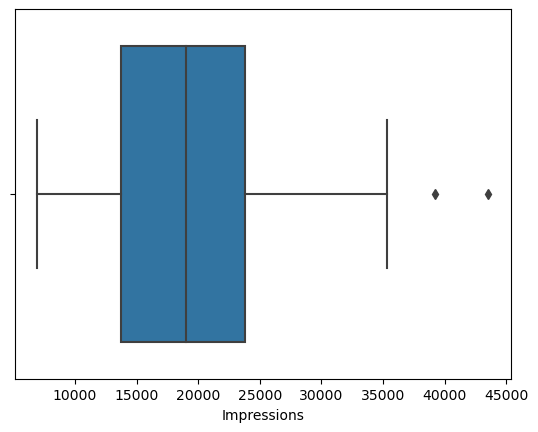

In [74]:
sns.boxplot(x="Impressions", data=metaads_performance)

<Axes: xlabel='Reach'>

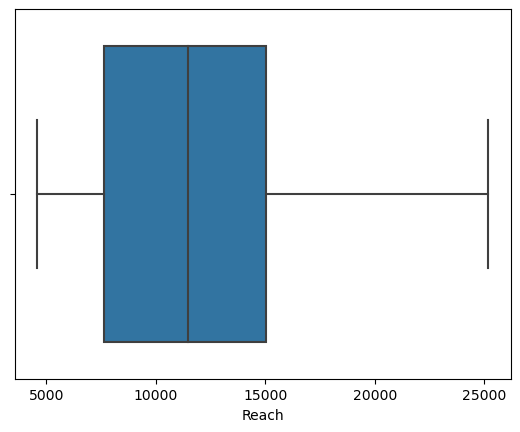

In [75]:
sns.boxplot(x="Reach", data=metaads_performance)

<Axes: xlabel='Cost'>

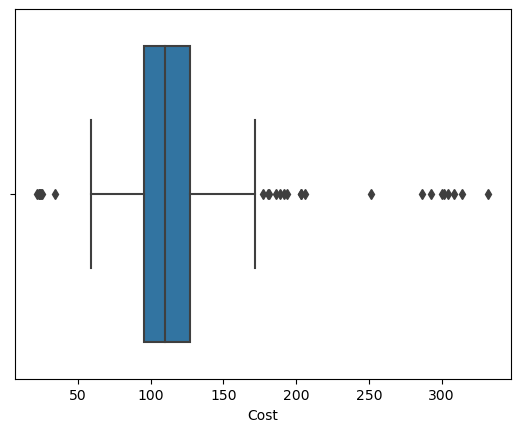

In [76]:
sns.boxplot(x="Cost", data=metaads_performance)

<Axes: xlabel='Clicks'>

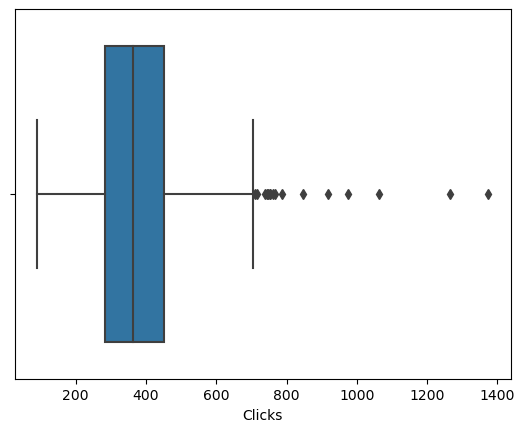

In [77]:
sns.boxplot(x="Clicks", data=metaads_performance)

<Axes: xlabel='Conversions'>

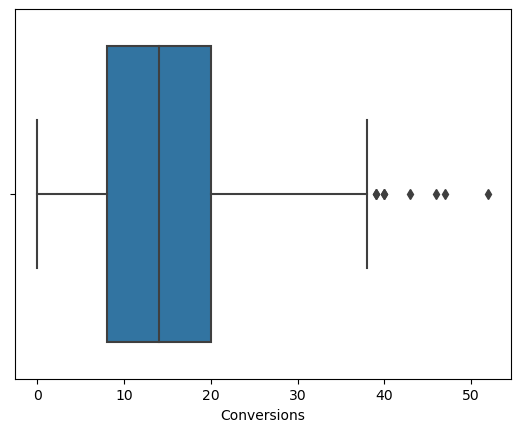

In [78]:
sns.boxplot(x="Conversions", data=metaads_performance)

<Axes: xlabel='Revenue'>

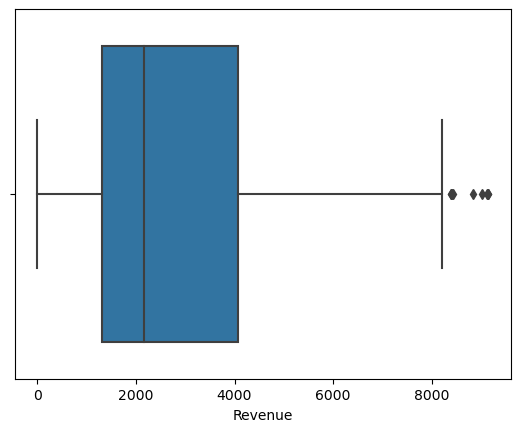

In [79]:
sns.boxplot(x="Revenue", data=metaads_performance)

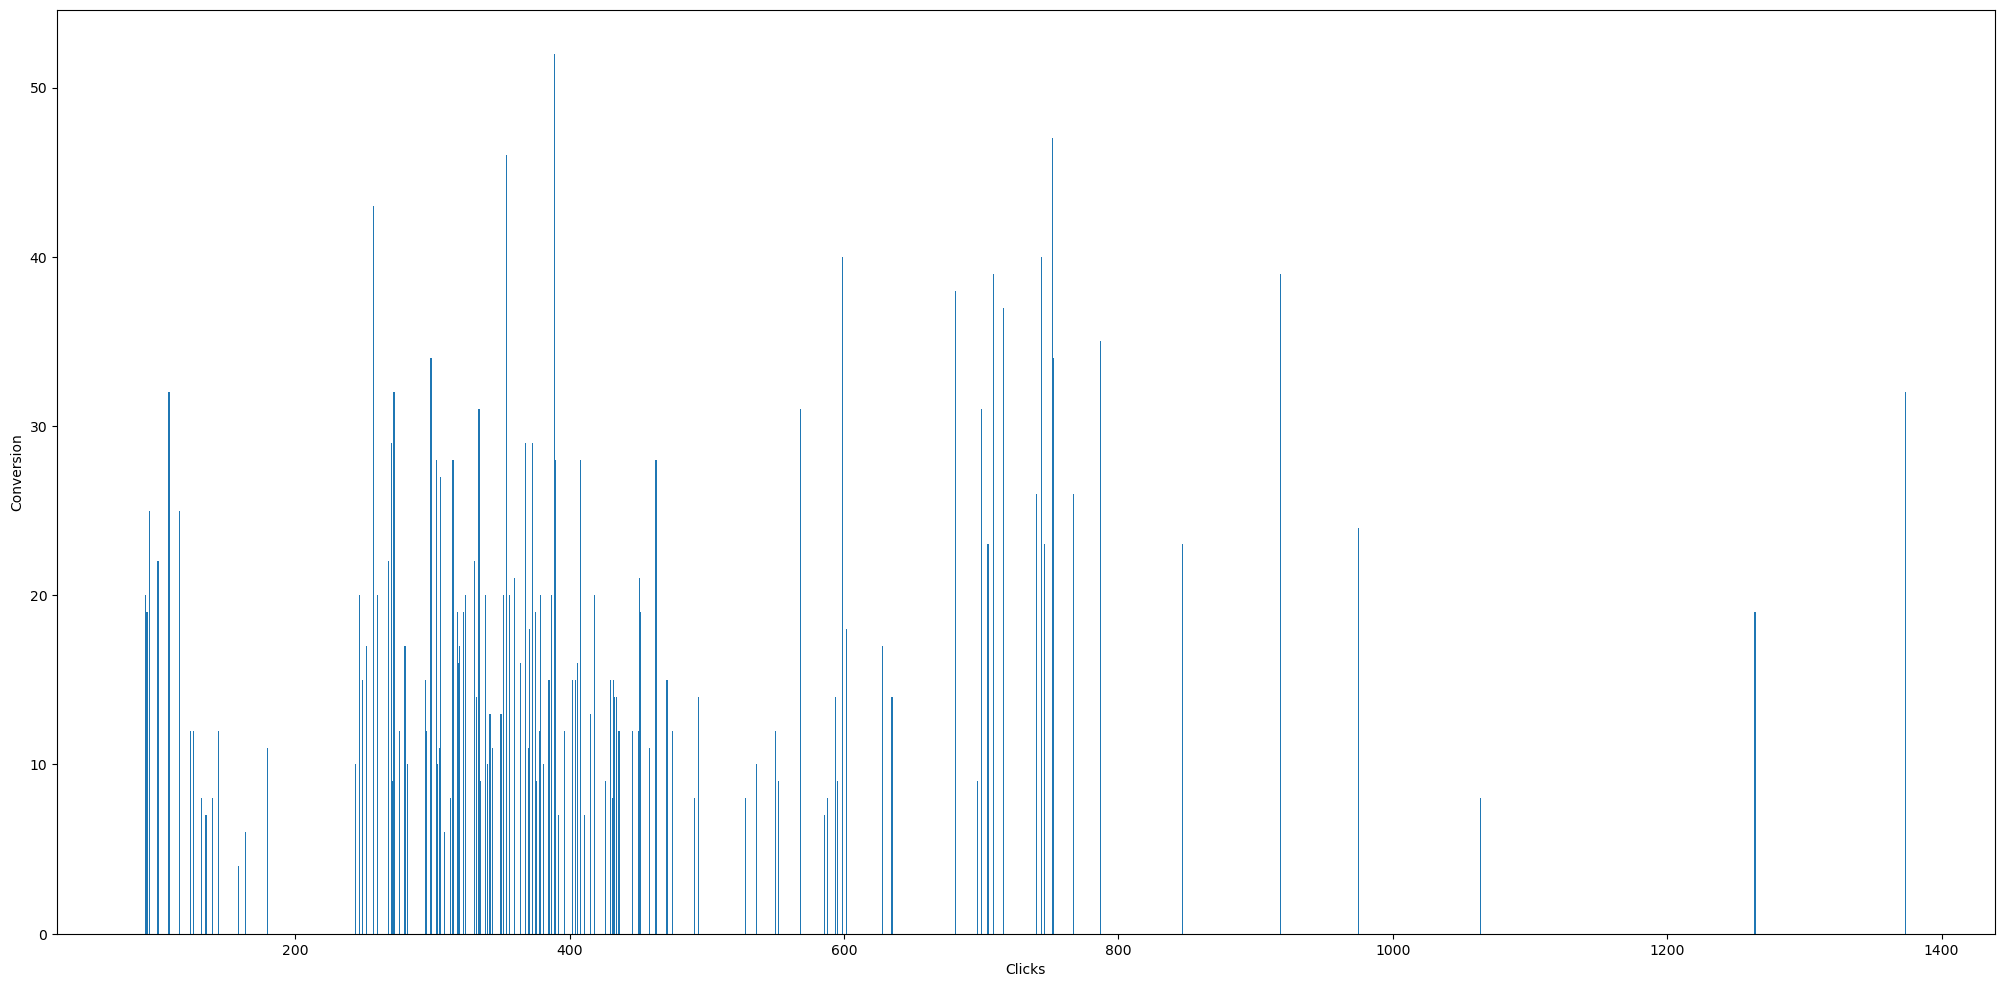

In [80]:
plt.figure(figsize=(25,12))
plt.bar(metaads_performance['Clicks'], metaads_performance['Conversions'])
plt.xlabel("Clicks")
plt.ylabel("Conversion")
plt.show()

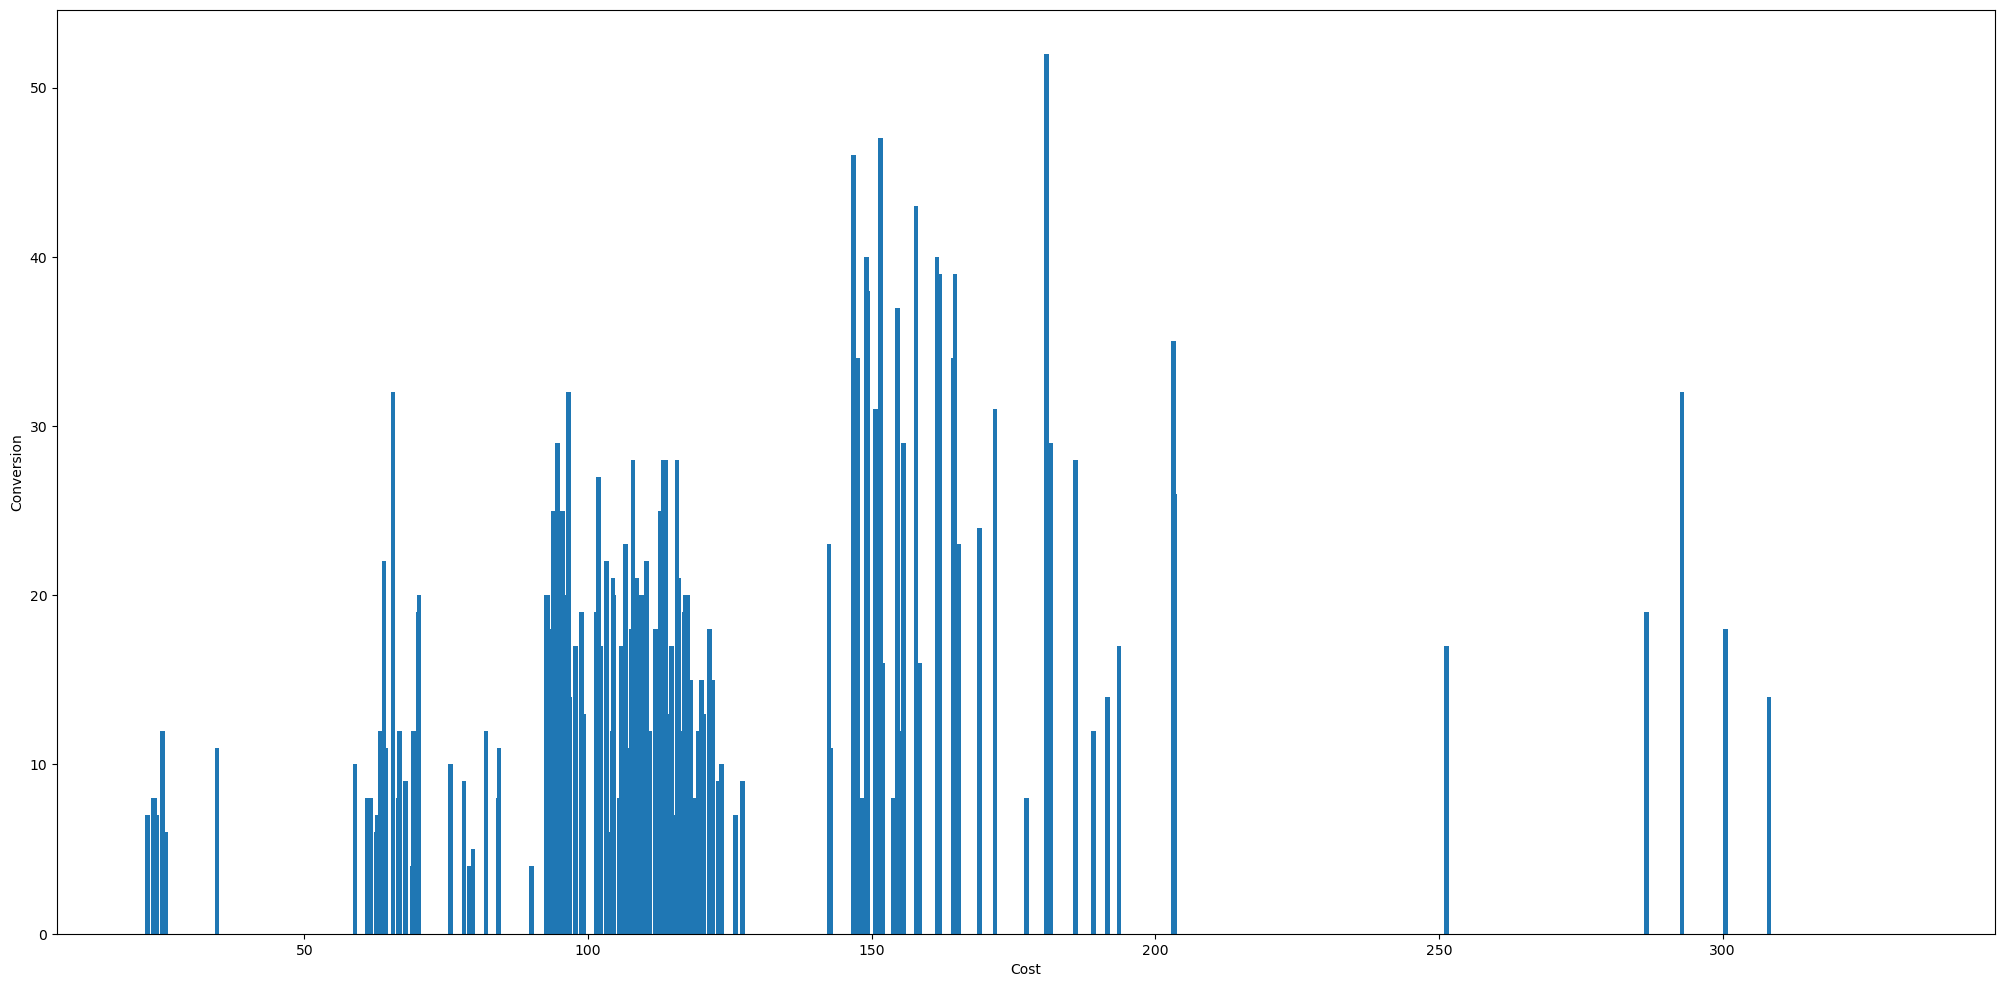

In [81]:
plt.figure(figsize=(25,12))
plt.bar(metaads_performance['Cost'], metaads_performance['Conversions'])
plt.xlabel("Cost")
plt.ylabel("Conversion")
plt.show()

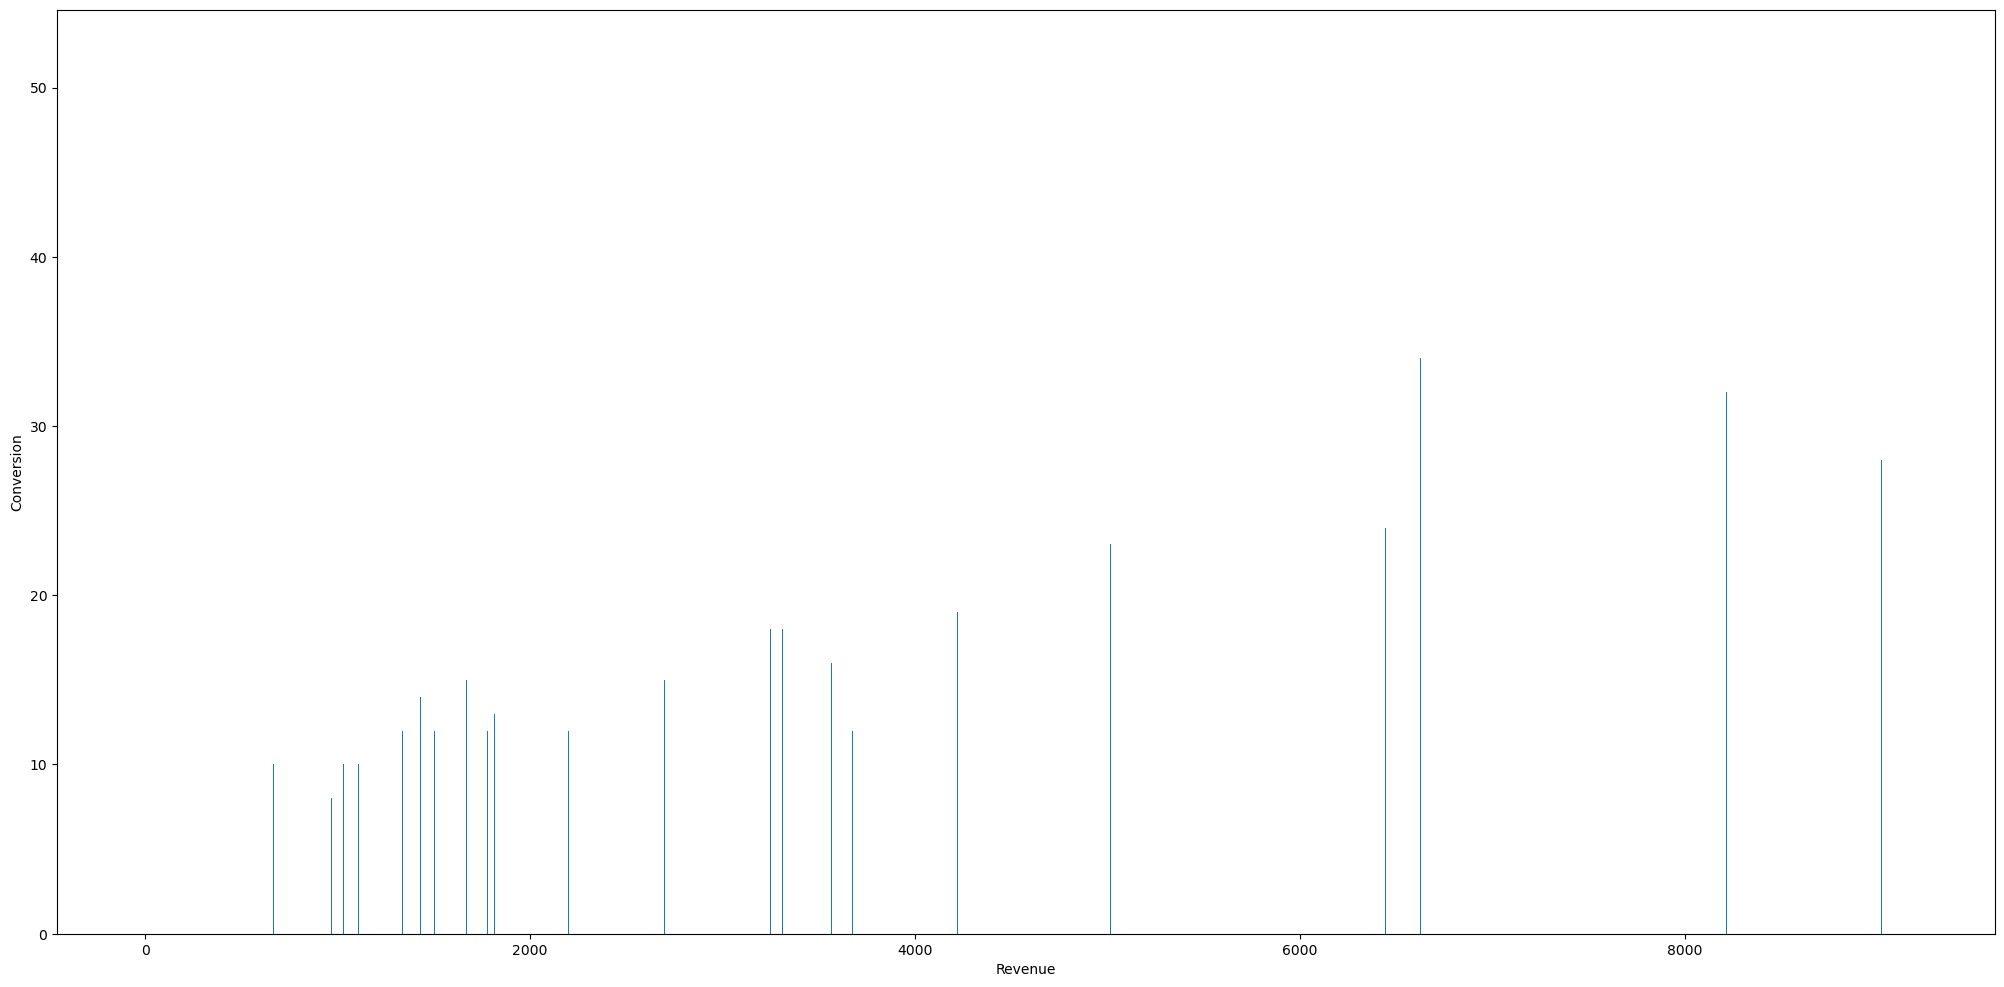

In [82]:
plt.figure(figsize=(25,12))
plt.bar(metaads_performance['Revenue'], metaads_performance['Conversions'])
plt.xlabel("Revenue")
plt.ylabel("Conversion")
plt.show()

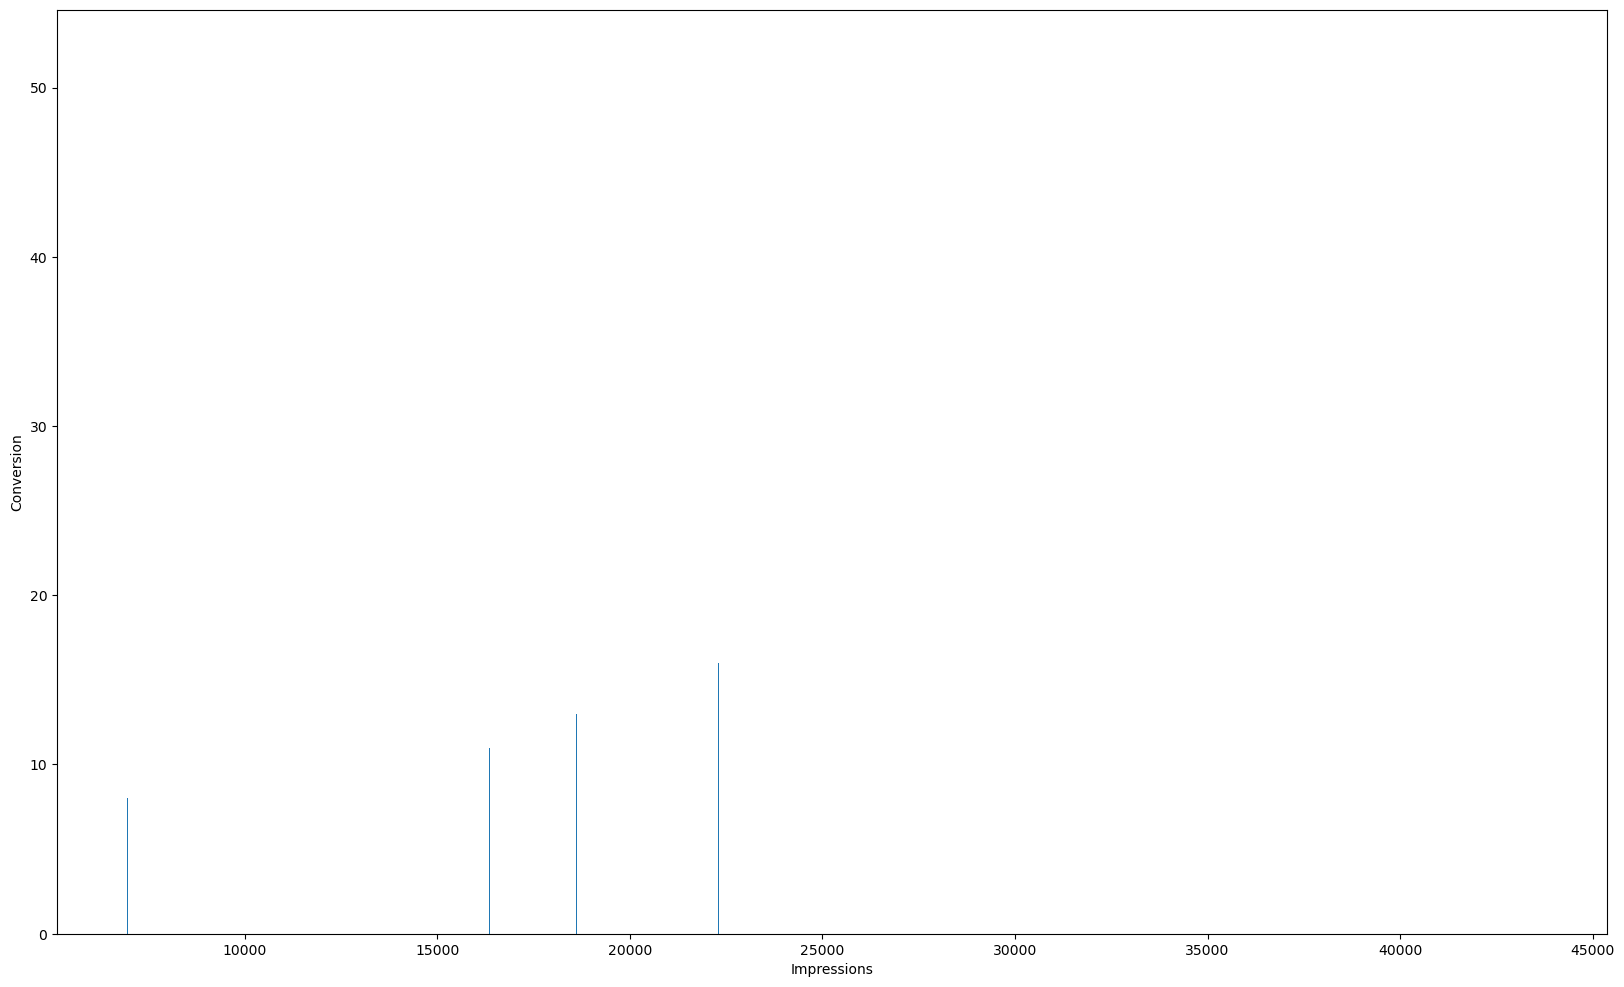

In [83]:
plt.figure(figsize=(20,12))
plt.bar(metaads_performance['Impressions'], metaads_performance['Conversions'])
plt.xlabel("Impressions")
plt.ylabel("Conversion")
plt.show()

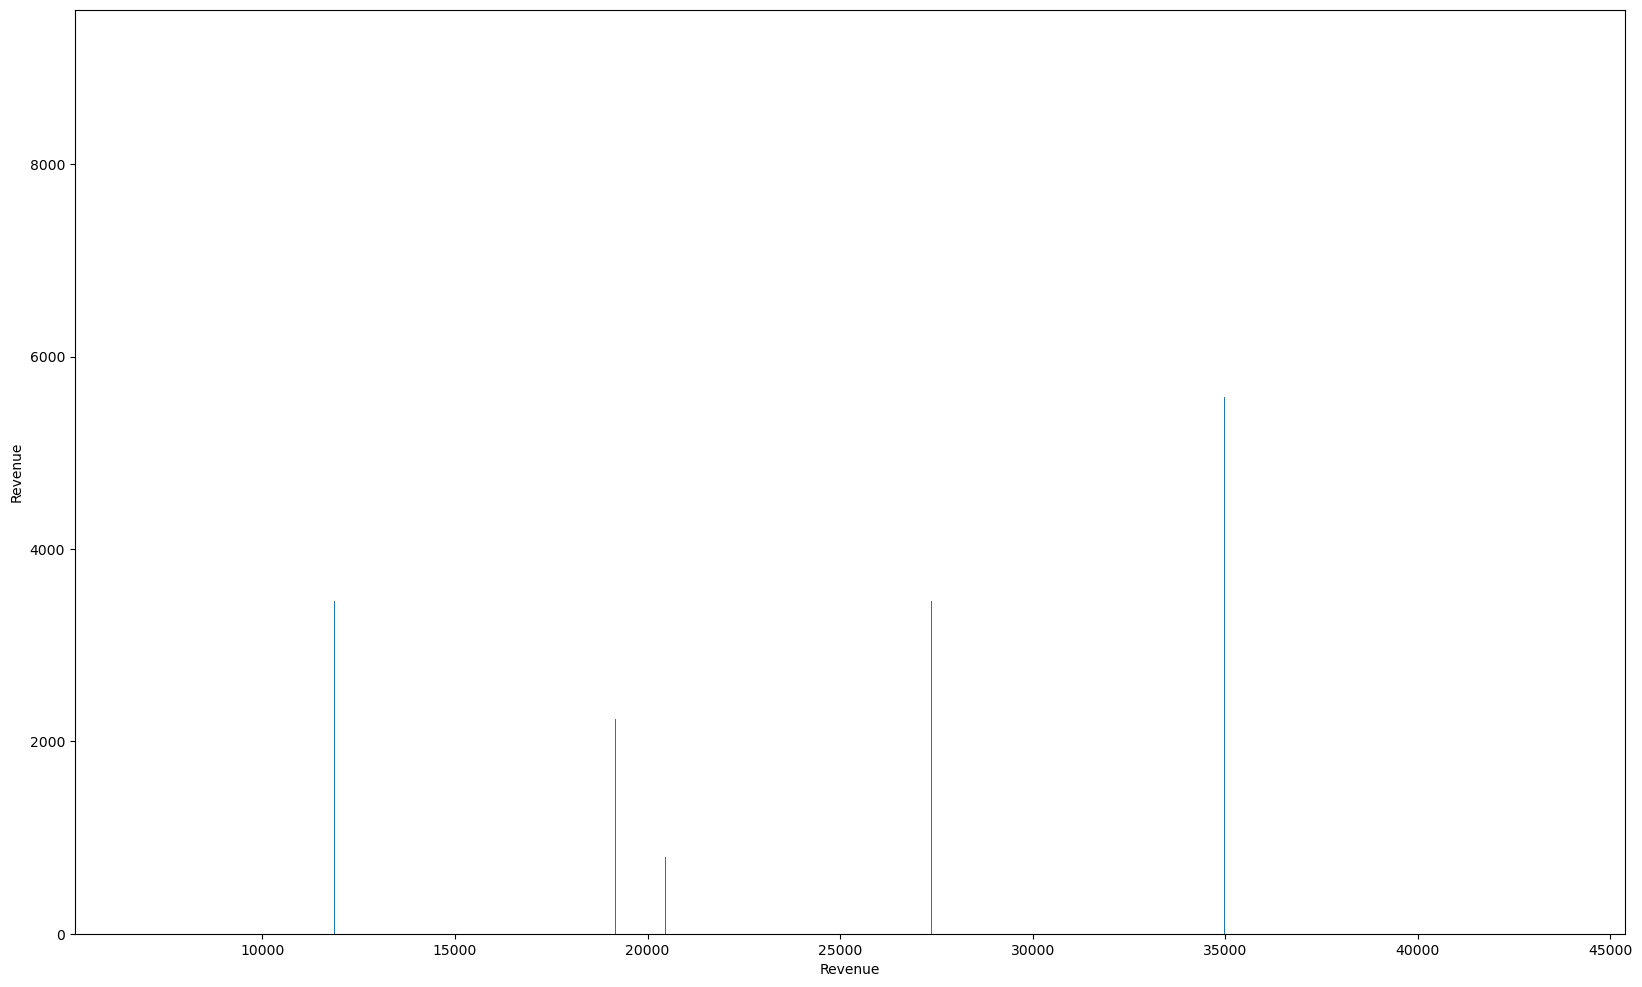

In [84]:
plt.figure(figsize=(20,12))
plt.bar(metaads_performance['Impressions'], metaads_performance['Revenue'])
plt.xlabel("Revenue")
plt.ylabel("Revenue")
plt.show()

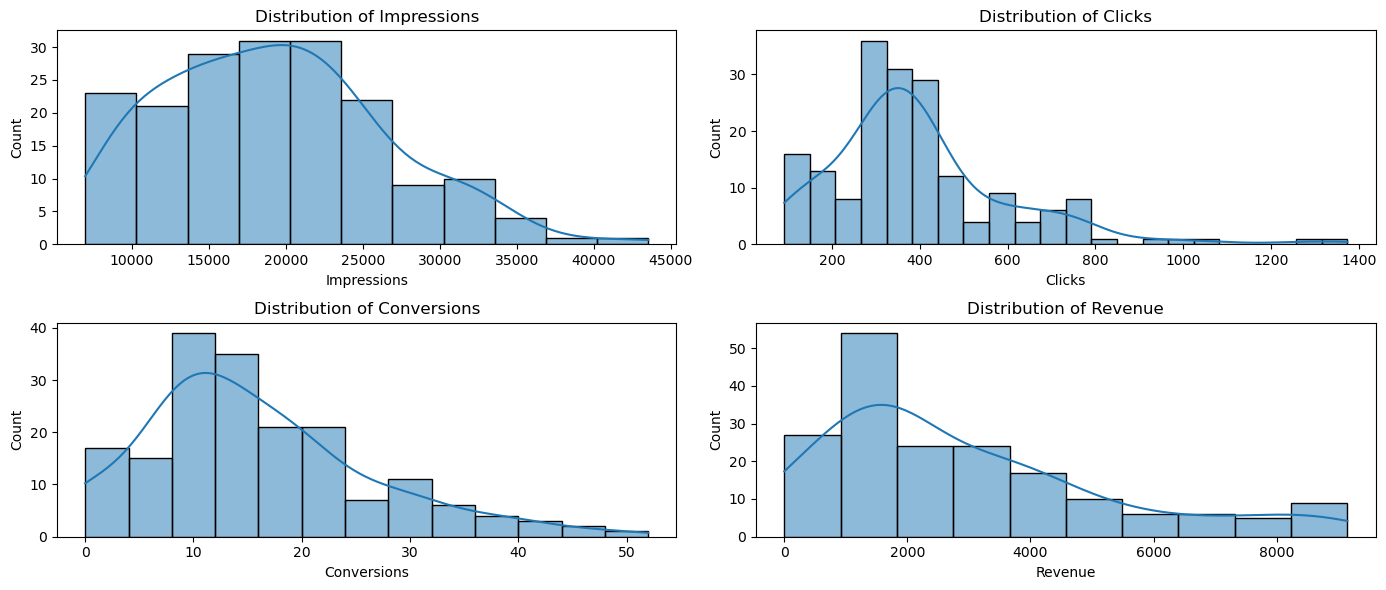

In [85]:
# 1. Distribution of Impressions, Clicks, Conversions, and Revenue
plt.figure(figsize=(14, 6))

plt.subplot(2, 2, 1)
sns.histplot(metaads_performance['Impressions'], kde=True)
plt.title('Distribution of Impressions')

plt.subplot(2, 2, 2)
sns.histplot(metaads_performance['Clicks'], kde=True)
plt.title('Distribution of Clicks')

plt.subplot(2, 2, 3)
sns.histplot(metaads_performance['Conversions'], kde=True)
plt.title('Distribution of Conversions')

plt.subplot(2, 2, 4)
sns.histplot(metaads_performance['Revenue'], kde=True)
plt.title('Distribution of Revenue')

plt.tight_layout()
plt.show()

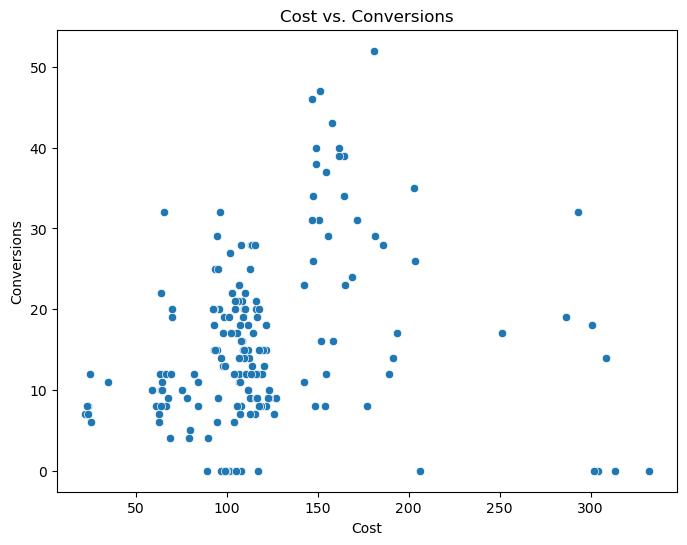

In [86]:
# 2. Relationship Between Cost and Conversions
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Cost', y='Conversions', data=metaads_performance)
plt.title('Cost vs. Conversions')
plt.show()

([<matplotlib.axis.XTick at 0x22d0f76a290>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20'),
  Text(25, 0, '25'),
  Text(30, 0, '30'),
  Text(35, 0, '35'),
  Text(40, 0, '40'),
  Text(45, 0, '45'),
  Text(50, 0, '50'),
  Text(55, 0, '55'),
  Text(60, 0, '60'),
  Text(65, 0, '65'),
  Text(70, 0, '70'),
  Text(75, 0, '75'),
  Text(80, 0, '80'),
  Text(85, 0, '85'),
  Text(90, 0, '90'),
  Text(95, 0, '95'),
  Text(100, 0, '100'),
  Text(105, 0, '105'),
  Text(110, 0, '110'),
  Text(115, 0, '115'),
  Text(120, 0, '120'),
  Text(125, 0, '125'),
  Text(130, 0, '130'),
  Text(135, 0, '135'),
  Text(140, 0, '140'),
  Text(145, 0, '145'),
  Text(150, 0, '150'),
  Text(155, 0, '155'),
  Text(160, 0, '160'),
  Text(165, 0, '165'),
  Text(170, 0, '170'),
  Text(175, 0, '175'),
  Text(180, 0, '180')])

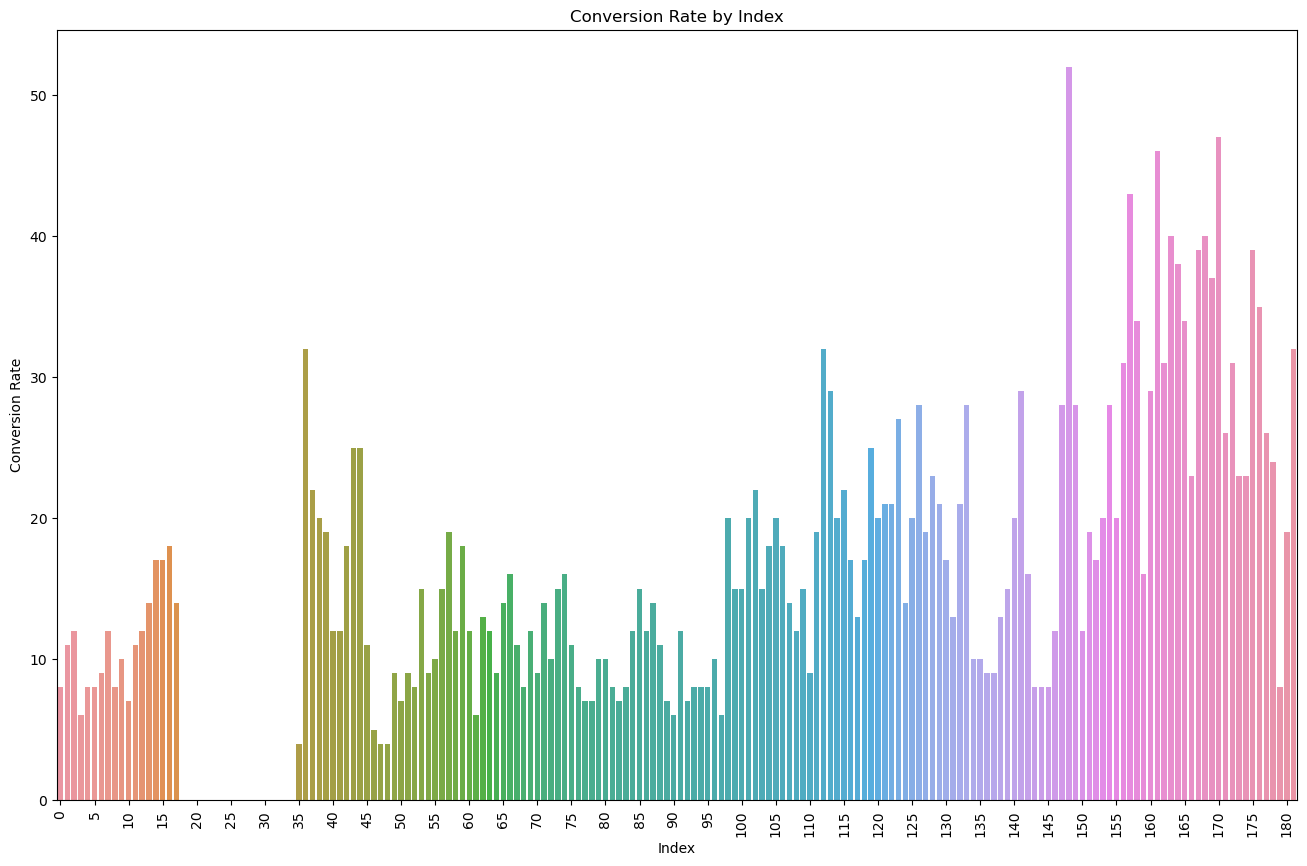

In [87]:
# 3. Conversion Rate Analysis
# Increase figure size and rotate labels
plt.figure(figsize=(16, 10))
sns.barplot(x=metaads_performance.index, y='Conversions', data=metaads_performance)

plt.title('Conversion Rate by Index')
plt.xlabel('Index')
plt.ylabel('Conversion Rate')

# Rotate x-axis labels and set the alignment
plt.xticks(rotation=90, ha='center')

# Optionally, display fewer x-axis labels (e.g., every 5th label)
plt.xticks(ticks=range(0, len(metaads_performance.index), 5), labels=metaads_performance.index[::5])

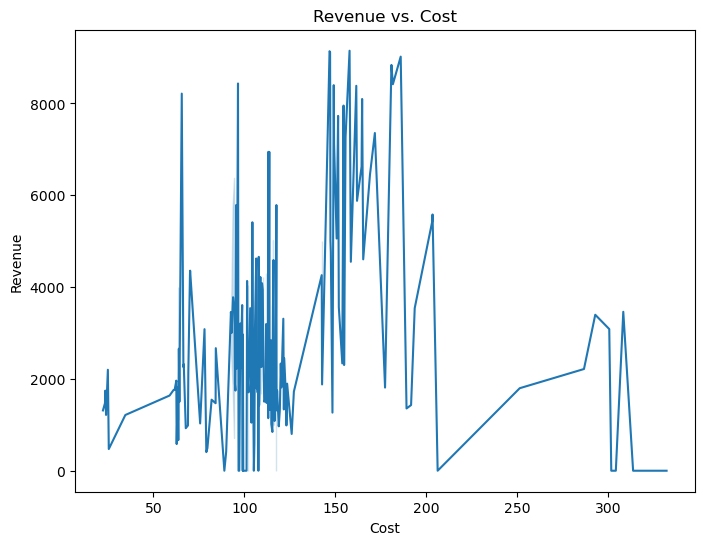

In [88]:
# 4. Revenue vs. Cost Analysis
plt.figure(figsize=(8, 6))
sns.lineplot(x='Cost', y='Revenue', data=metaads_performance)
plt.title('Revenue vs. Cost')
plt.show()

C:\Users\nensi\AppData\Local\Temp\ipykernel_24312\3418456148.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Impressions_binned', y='Conversions', data=metaads_performance, ci=None)


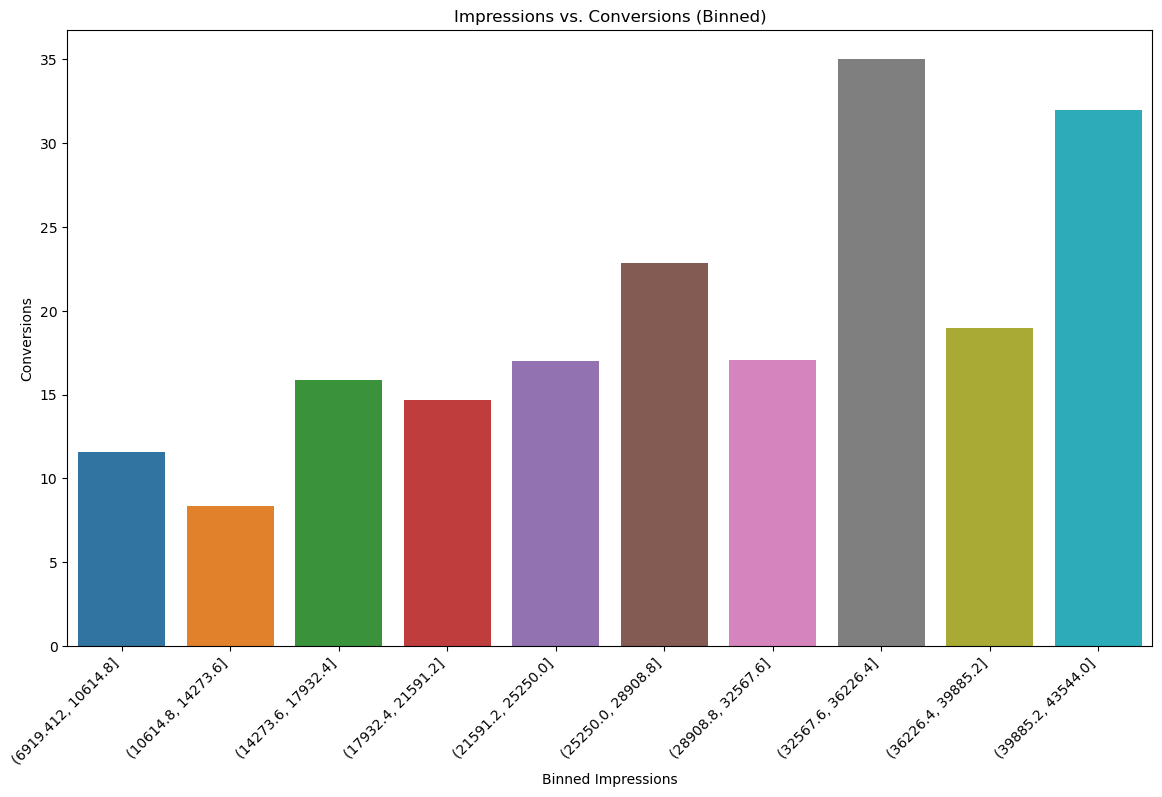

In [89]:
# 5. Impression vs. Conversion Analysis
# Convert 'Impressions' to categorical data or bin it to reduce labels
metaads_performance['Impressions_binned'] = pd.cut(metaads_performance['Impressions'], bins=10)  # Bin into 10 categories

# Plot: Impressions vs. Conversions with binned impressions
plt.figure(figsize=(14, 8))  # Increase figure size
sns.barplot(x='Impressions_binned', y='Conversions', data=metaads_performance, ci=None)
plt.title('Impressions vs. Conversions (Binned)')
plt.xticks(rotation=45, ha='right')  # Rotate for better visibility
plt.xlabel('Binned Impressions')
plt.ylabel('Conversions')
plt.show()

C:\Users\nensi\AppData\Local\Temp\ipykernel_24312\1829146914.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(metaads_performance.corr(), annot=True, cmap='coolwarm')


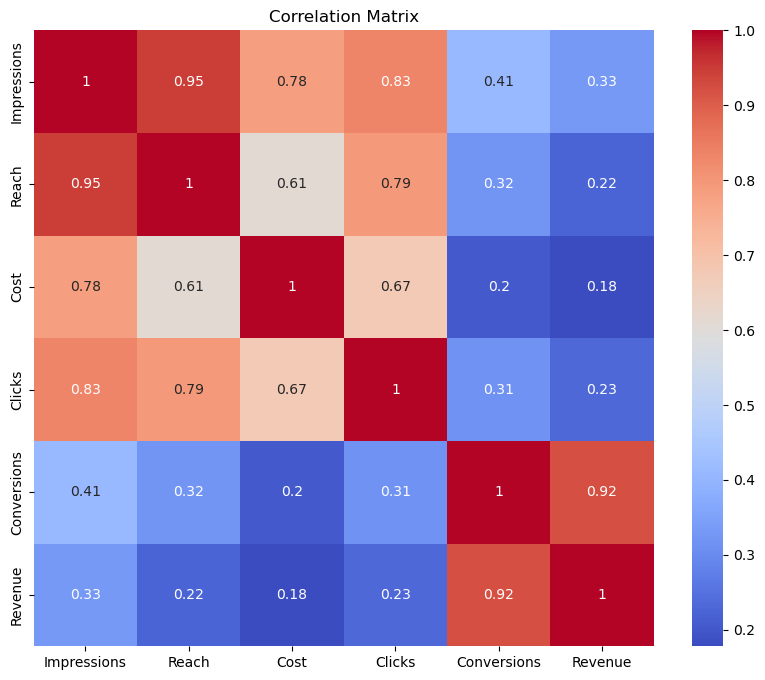

In [90]:
# Heatmap for Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(metaads_performance.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [91]:
# Calculate metrics
metaads_performance['CPC'] = metaads_performance['Cost'] / metaads_performance['Conversions']
metaads_performance['Conversion Rate'] = metaads_performance['Conversions'] / metaads_performance['Impressions']
metaads_performance['RPC'] = metaads_performance['Revenue'] / metaads_performance['Conversions']

In [92]:
metaads_performance['CPC']

0       8.312500
1       5.845455
2       5.283333
3      10.433333
4       7.712500
         ...    
177     7.823077
178     7.041667
179    22.162500
180    15.084211
181     9.150000
Name: CPC, Length: 182, dtype: float64

In [93]:
metaads_performance['Conversion Rate']

0      0.000692
1      0.001137
2      0.001389
3      0.000662
4      0.000847
         ...   
177    0.000743
178    0.000905
179    0.000273
180    0.000484
181    0.000735
Name: Conversion Rate, Length: 182, dtype: float64

In [94]:
metaads_performance['RPC']

0      282.287500
1      172.200000
2      150.675000
3      327.000000
4      220.437500
          ...    
177    214.700000
178    268.475000
179    226.412500
180    116.610526
181    106.178125
Name: RPC, Length: 182, dtype: float64

In [95]:
# Initialize parameters
total_budget = 200000  # Total budget to allocate
min_budget = 0.1 * total_budget  # Minimum budget allocation to each identifier
n_rounds = 100  # Number of rounds (iterations) for budget allocation
epsilon = 0.1  # Exploration probability

In [96]:
# Initialize budget allocation
metaads_performance['Allocated Budget'] = min_budget  # Start with a minimum allocation

In [97]:
# Multi-Armed Bandit - Epsilon-Greedy Algorithm
for _ in range(n_rounds):
    if random.random() < epsilon:
        # Exploration: Randomly select a campaign
        campaign_index = random.randint(0, len(metaads_performance) - 1)
    else:
        # Exploitation: Select the campaign with the best Conversion Rate
        campaign_index = np.argmax(metaads_performance['Conversion Rate'])

    # Allocate a portion of the remaining budget to the selected campaign
    remaining_budget = total_budget - metaads_performance['Allocated Budget'].sum()
    budget_to_allocate = remaining_budget / (n_rounds - _)

    metaads_performance.loc[campaign_index, 'Allocated Budget'] += budget_to_allocate


In [98]:
# Display the final budget allocation
print(metaads_performance[['Impressions', 'Cost', 'Clicks', 'Conversions', 'Revenue', 'Allocated Budget']])

     Impressions   Cost  Clicks  Conversions  Revenue  Allocated Budget
0        11560.0   66.5   415.0          8.0   2258.3           20000.0
1         9674.0   64.3   320.0         11.0   1894.2           20000.0
2         8640.0   63.4   276.0         12.0   1808.1           20000.0
3         9057.0   62.6   309.0          6.0   1962.0           20000.0
4         9448.0   61.7   282.0          8.0   1763.5           20000.0
..           ...    ...     ...          ...      ...               ...
177      34980.0  203.4   740.0         26.0   5582.2           20000.0
178      26524.0  169.0   975.0         24.0   6443.4           20000.0
179      29264.0  177.3  1064.0          8.0   1811.3           20000.0
180      39216.0  286.6  1264.0         19.0   2215.6          -14400.0
181      43544.0  292.8  1374.0         32.0   3397.7           20000.0

[182 rows x 6 columns]


# 3. MicrosoftAds Performance

In [99]:
microsoftads_performance = pd.read_csv("microsoftads-performance2.csv")
microsoftads_performance

,Date,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue
0,2024-01-01,Search & content,831.0,100.0,108.6,15.0,2240.6
1,2024-01-01,Shopping,20128.0,316.0,149.0,13.0,2364.3
2,2024-01-02,Search & content,1069.0,163.0,188.4,26.0,4383.0
3,2024-01-02,Shopping,31540.0,366.0,166.9,11.0,423.6
4,2024-01-03,Search & content,960.0,153.0,180.7,22.0,3035.6
...,...,...,...,...,...,...,...
359,2024-06-28,Shopping,15266.0,229.0,129.9,8.0,2522.0
360,2024-06-29,Search & content,365.0,87.0,133.7,15.0,4178.8
361,2024-06-29,Shopping,14916.0,247.0,129.4,10.0,1239.9
362,2024-06-30,Search & content,303.0,69.0,99.2,11.0,1721.7


In [100]:
microsoftads_performance.head()

,Date,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue
0,2024-01-01,Search & content,831.0,100.0,108.6,15.0,2240.6
1,2024-01-01,Shopping,20128.0,316.0,149.0,13.0,2364.3
2,2024-01-02,Search & content,1069.0,163.0,188.4,26.0,4383.0
3,2024-01-02,Shopping,31540.0,366.0,166.9,11.0,423.6
4,2024-01-03,Search & content,960.0,153.0,180.7,22.0,3035.6


In [101]:
microsoftads_performance.tail()

,Date,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue
359,2024-06-28,Shopping,15266.0,229.0,129.9,8.0,2522.0
360,2024-06-29,Search & content,365.0,87.0,133.7,15.0,4178.8
361,2024-06-29,Shopping,14916.0,247.0,129.4,10.0,1239.9
362,2024-06-30,Search & content,303.0,69.0,99.2,11.0,1721.7
363,2024-06-30,Shopping,11646.0,186.0,94.3,6.0,826.3


In [102]:
microsoftads_performance.shape

(364, 7)

In [103]:
microsoftads_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           364 non-null    object 
 1   Campaign type  364 non-null    object 
 2   Impressions    364 non-null    float64
 3   Clicks         364 non-null    float64
 4   Cost           364 non-null    float64
 5   Conversions    364 non-null    float64
 6   Revenue        364 non-null    float64
dtypes: float64(5), object(2)
memory usage: 20.0+ KB


In [104]:
microsoftads_performance.columns

Index(['Date', 'Campaign type', 'Impressions', 'Clicks', 'Cost', 'Conversions',
       'Revenue'],
      dtype='object')

In [105]:
microsoftads_performance.describe()

,Impressions,Clicks,Cost,Conversions,Revenue
count,364.000000,364.000000,364.000000,364.000000,364.000000
mean,10195.065934,180.445055,139.566209,12.445055,1983.526923
std,11446.766359,102.783571,85.522881,6.715366,1725.411177
min,87.000000,4.000000,9.000000,0.000000,0.000000
25%,763.750000,117.000000,99.900000,8.000000,769.450000
50%,6271.000000,160.000000,126.450000,12.000000,1500.150000
75%,17203.250000,229.250000,165.925000,16.000000,2698.400000
max,63625.000000,675.000000,701.500000,38.000000,10654.100000


In [106]:
microsoftads_performance.describe(include="object")

,Date,Campaign type
count,364,364
unique,182,2
top,2024-01-01,Search & content
freq,2,182


In [107]:
microsoftads_performance.isnull()

,Date,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
359,False,False,False,False,False,False,False
360,False,False,False,False,False,False,False
361,False,False,False,False,False,False,False
362,False,False,False,False,False,False,False


In [108]:
microsoftads_performance.isnull().sum()

Date             0
Campaign type    0
Impressions      0
Clicks           0
Cost             0
Conversions      0
Revenue          0
dtype: int64

In [109]:
microsoftads_performance.drop(columns=["Date"], axis=1, inplace=True)

<Axes: xlabel='Impressions'>

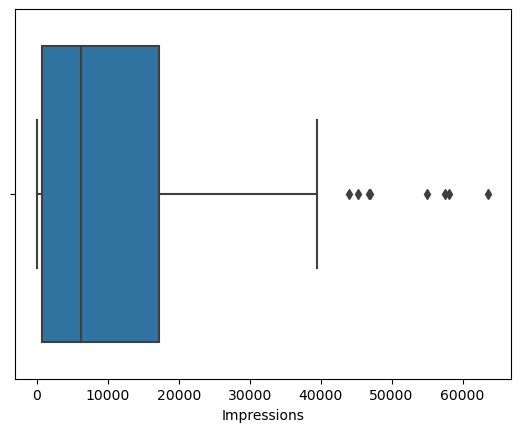

In [110]:
sns.boxplot(x="Impressions", data=microsoftads_performance)

<Axes: xlabel='Clicks'>

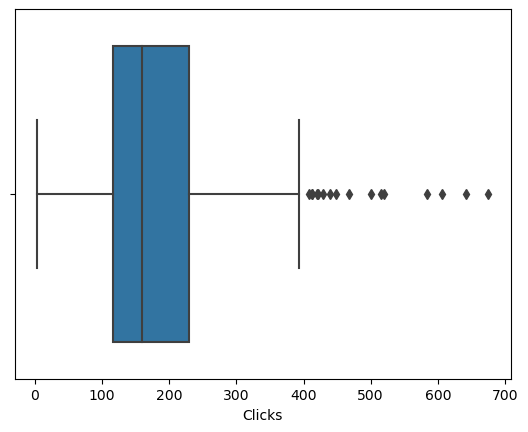

In [111]:
sns.boxplot(x="Clicks", data=microsoftads_performance)

<Axes: xlabel='Cost'>

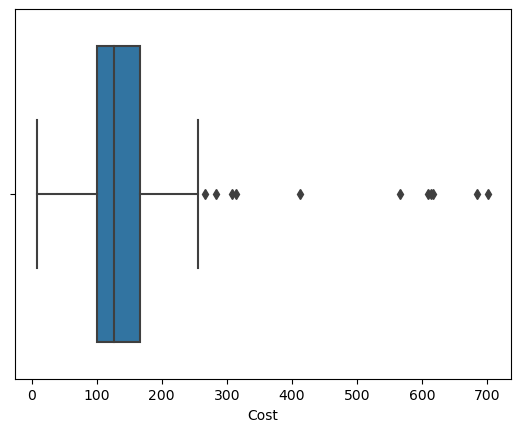

In [112]:
sns.boxplot(x="Cost", data=microsoftads_performance)

<Axes: xlabel='Conversions'>

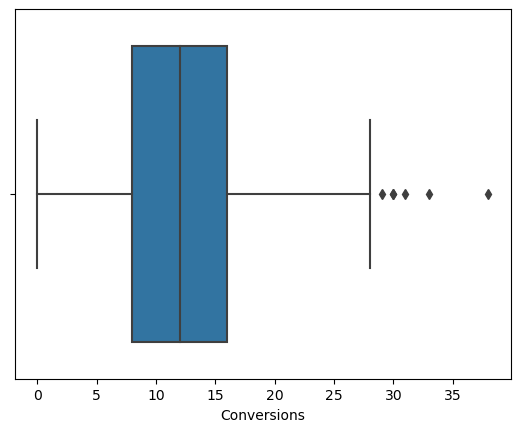

In [113]:
sns.boxplot(x="Conversions", data=microsoftads_performance)

<Axes: xlabel='Revenue'>

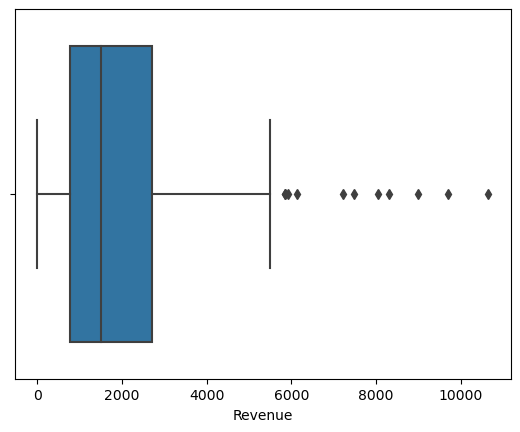

In [114]:
sns.boxplot(x="Revenue", data=microsoftads_performance)

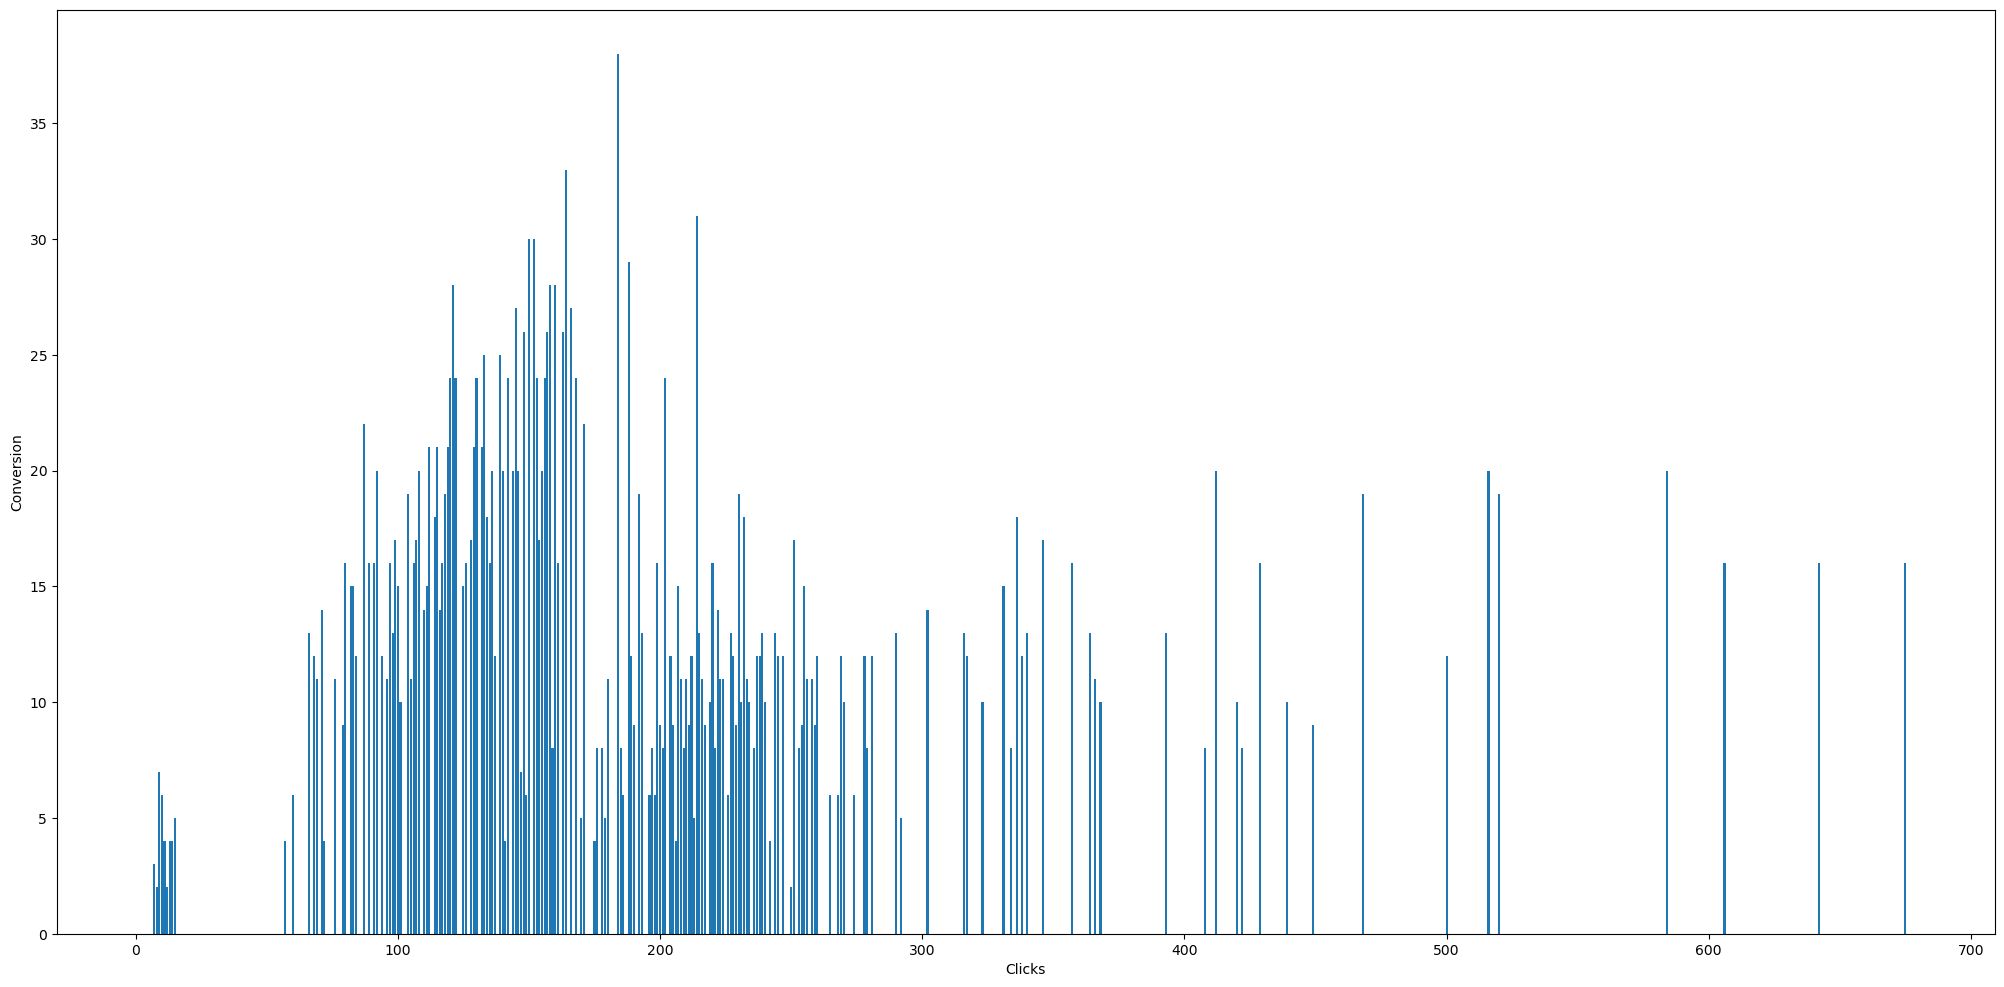

In [115]:
plt.figure(figsize=(25,12))
plt.bar(microsoftads_performance['Clicks'], microsoftads_performance['Conversions'])
plt.xlabel("Clicks")
plt.ylabel("Conversion")
plt.show()

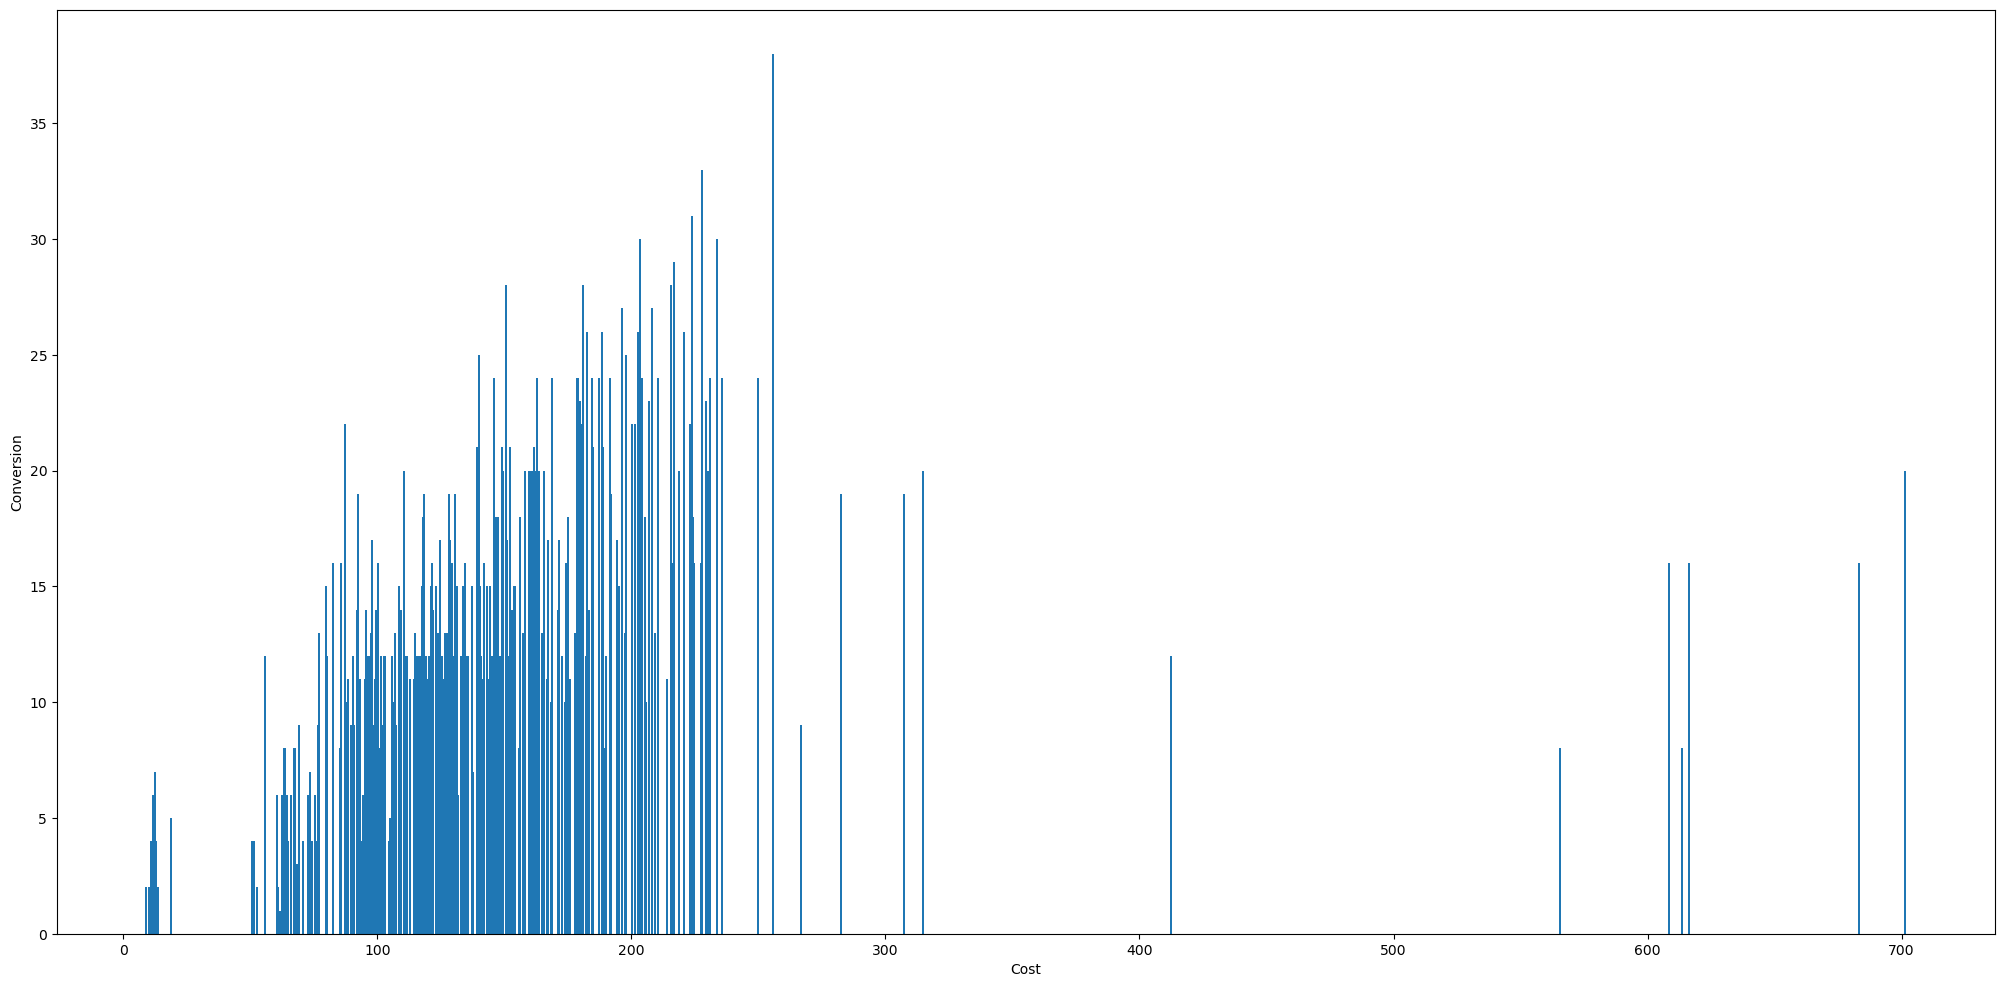

In [116]:
plt.figure(figsize=(25,12))
plt.bar(microsoftads_performance['Cost'], microsoftads_performance['Conversions'])
plt.xlabel("Cost")
plt.ylabel("Conversion")
plt.show()

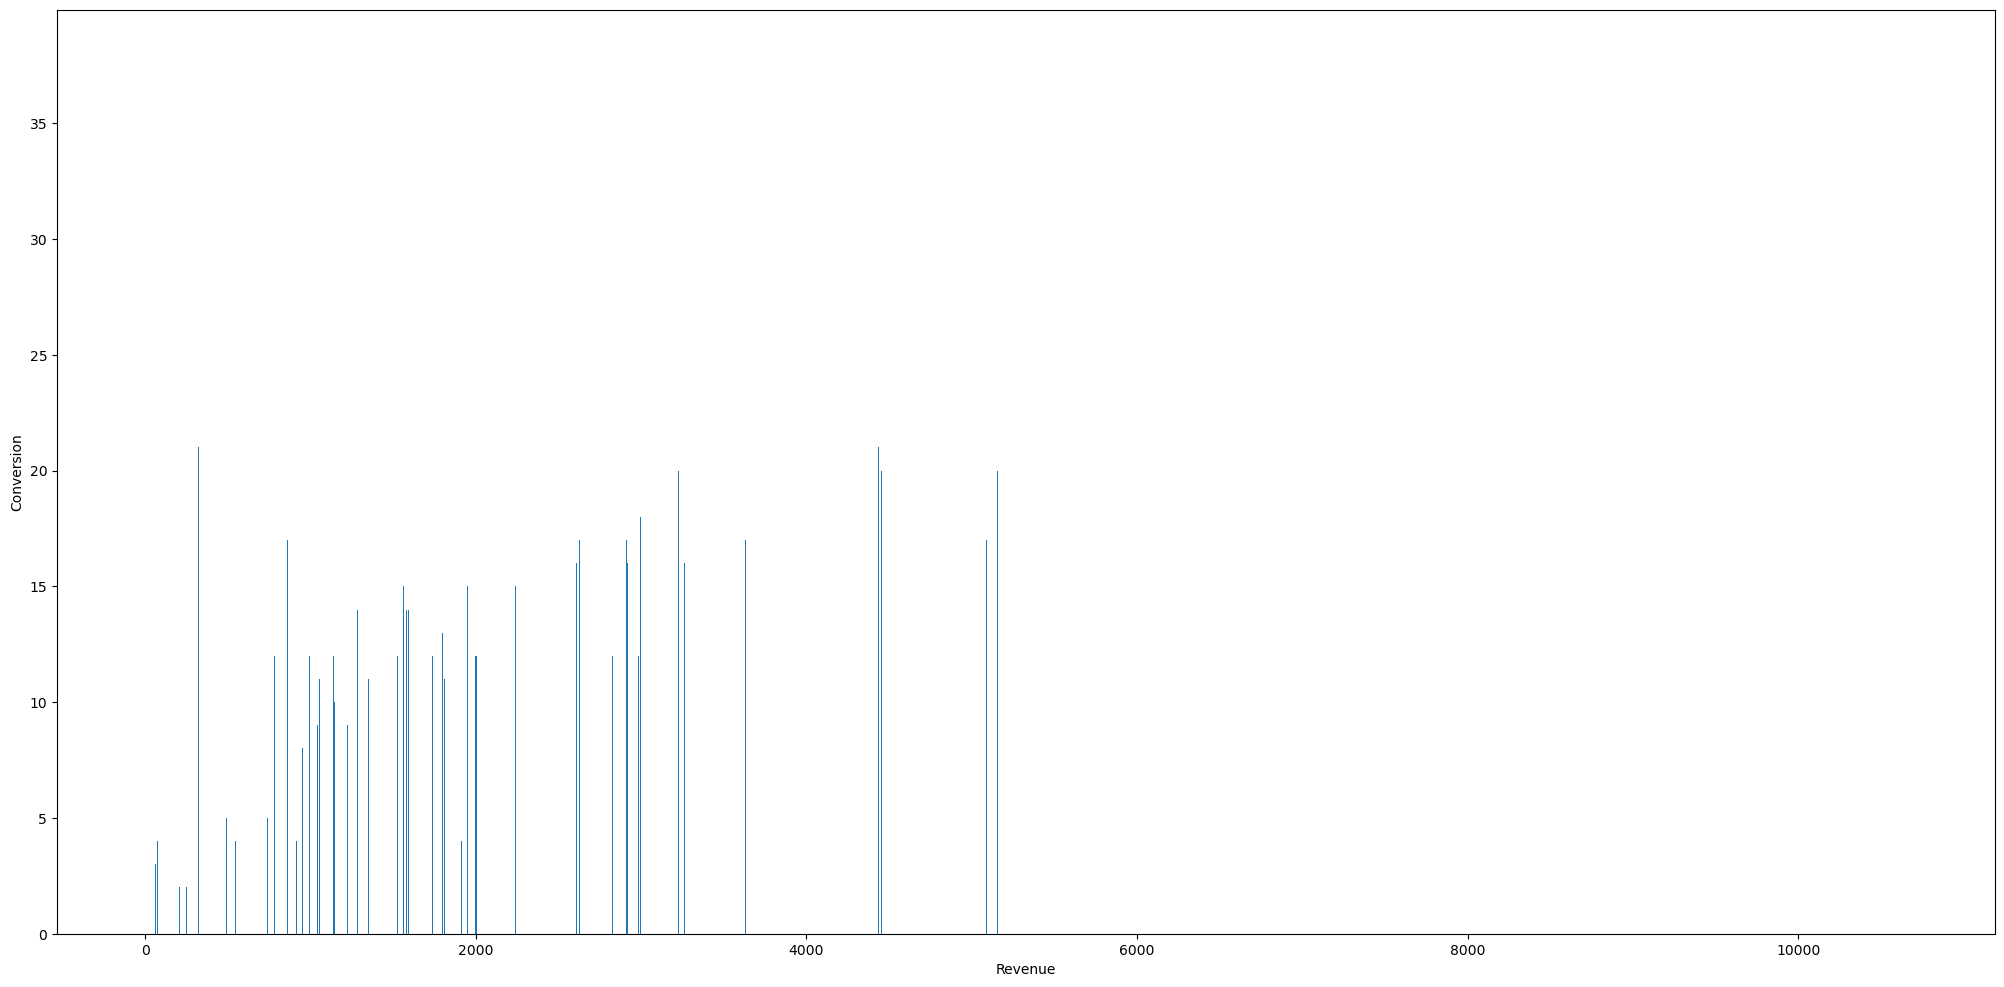

In [117]:
plt.figure(figsize=(25,12))
plt.bar(microsoftads_performance['Revenue'], microsoftads_performance['Conversions'])
plt.xlabel("Revenue")
plt.ylabel("Conversion")
plt.show()

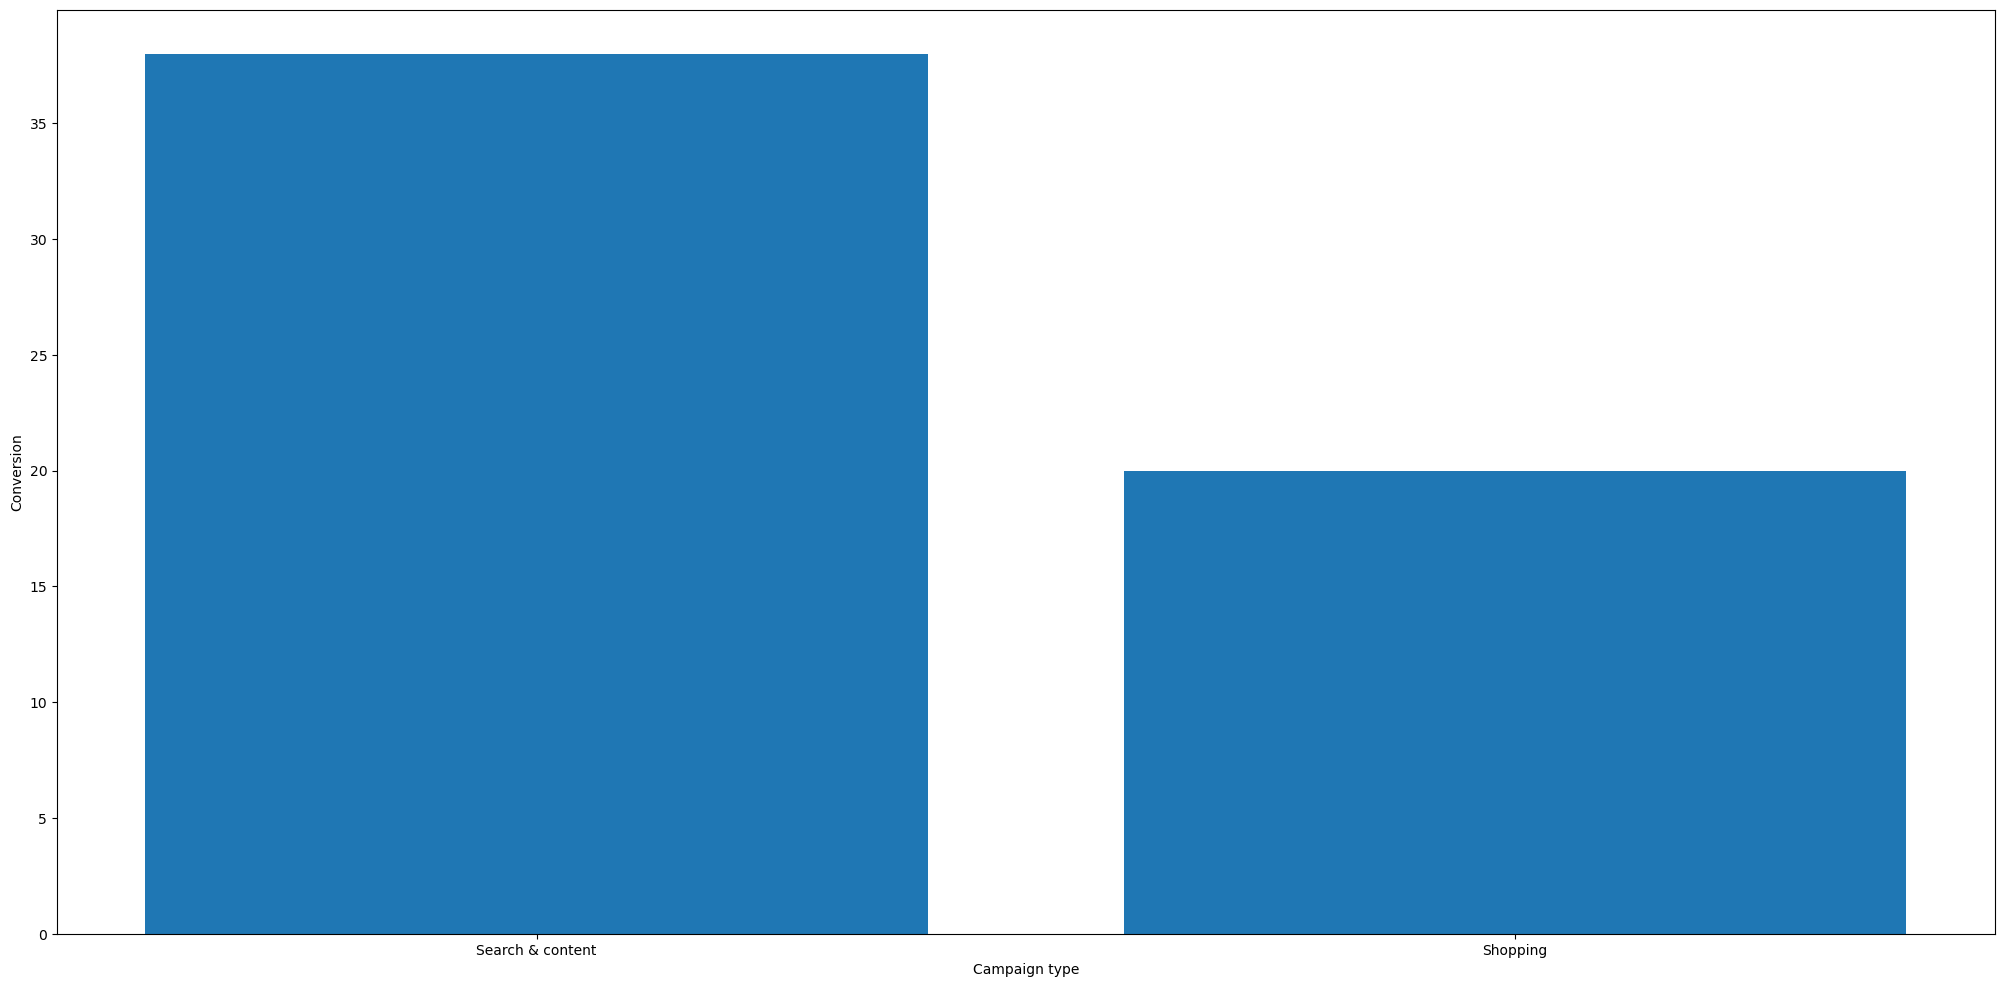

In [118]:
plt.figure(figsize=(25,12))
plt.bar(microsoftads_performance['Campaign type'], microsoftads_performance['Conversions'])
plt.xlabel("Campaign type")
plt.ylabel("Conversion")
plt.show()

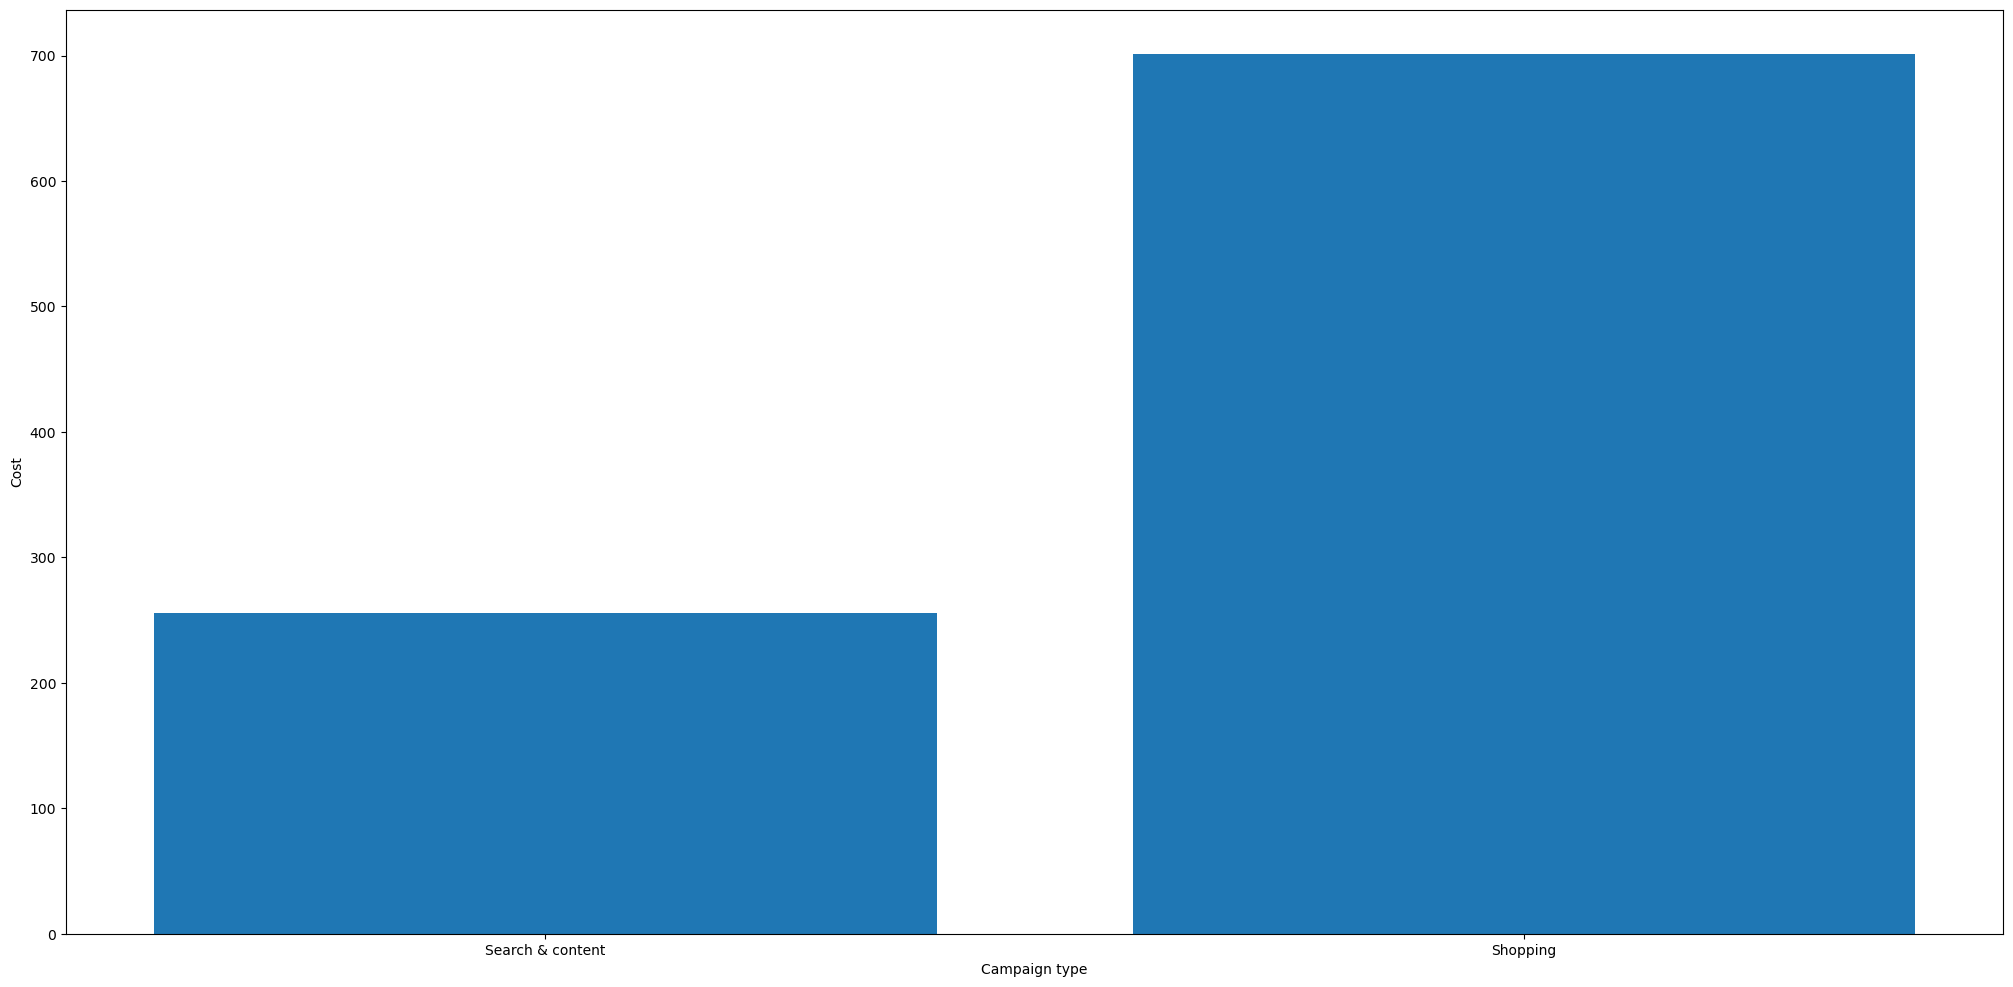

In [119]:
plt.figure(figsize=(25,12))
plt.bar(microsoftads_performance['Campaign type'], microsoftads_performance['Cost'])
plt.xlabel("Campaign type")
plt.ylabel("Cost")
plt.show()

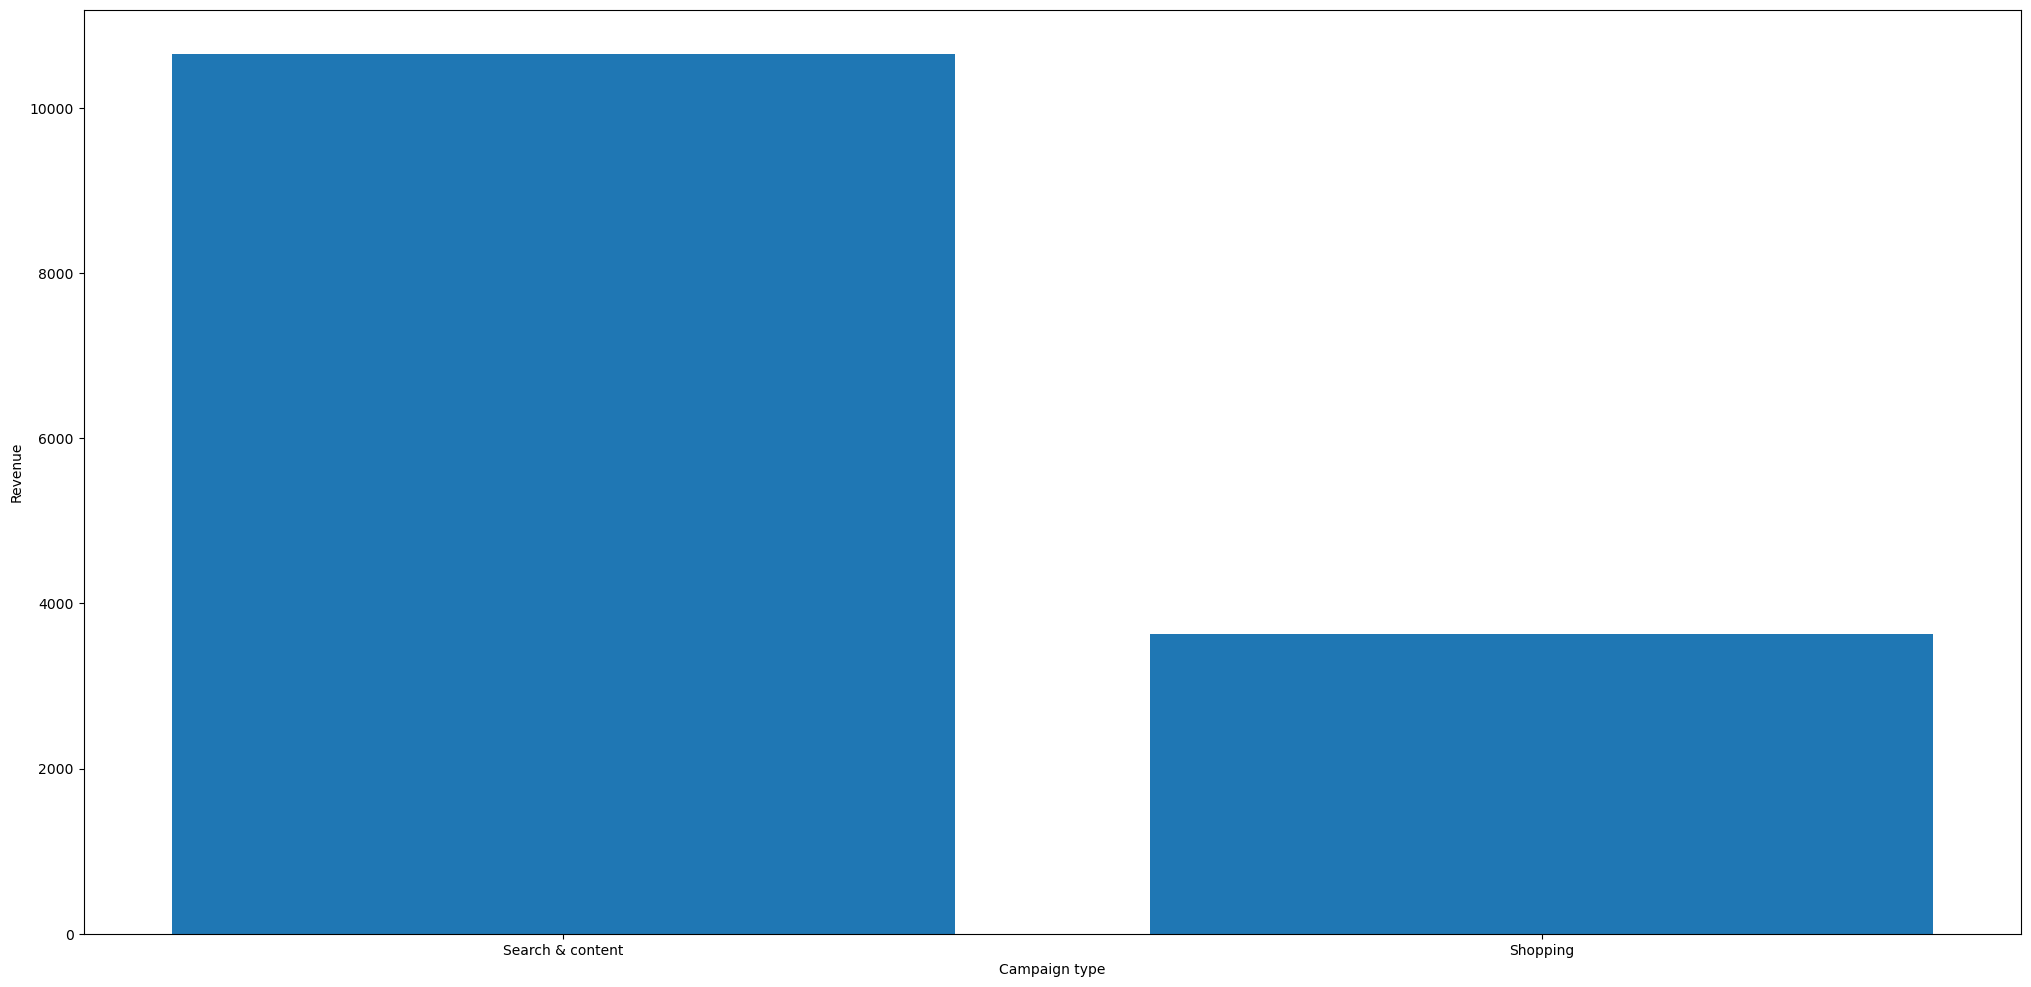

In [120]:
plt.figure(figsize=(25,12))
plt.bar(microsoftads_performance['Campaign type'], microsoftads_performance['Revenue'])
plt.xlabel("Campaign type")
plt.ylabel("Revenue")
plt.show()

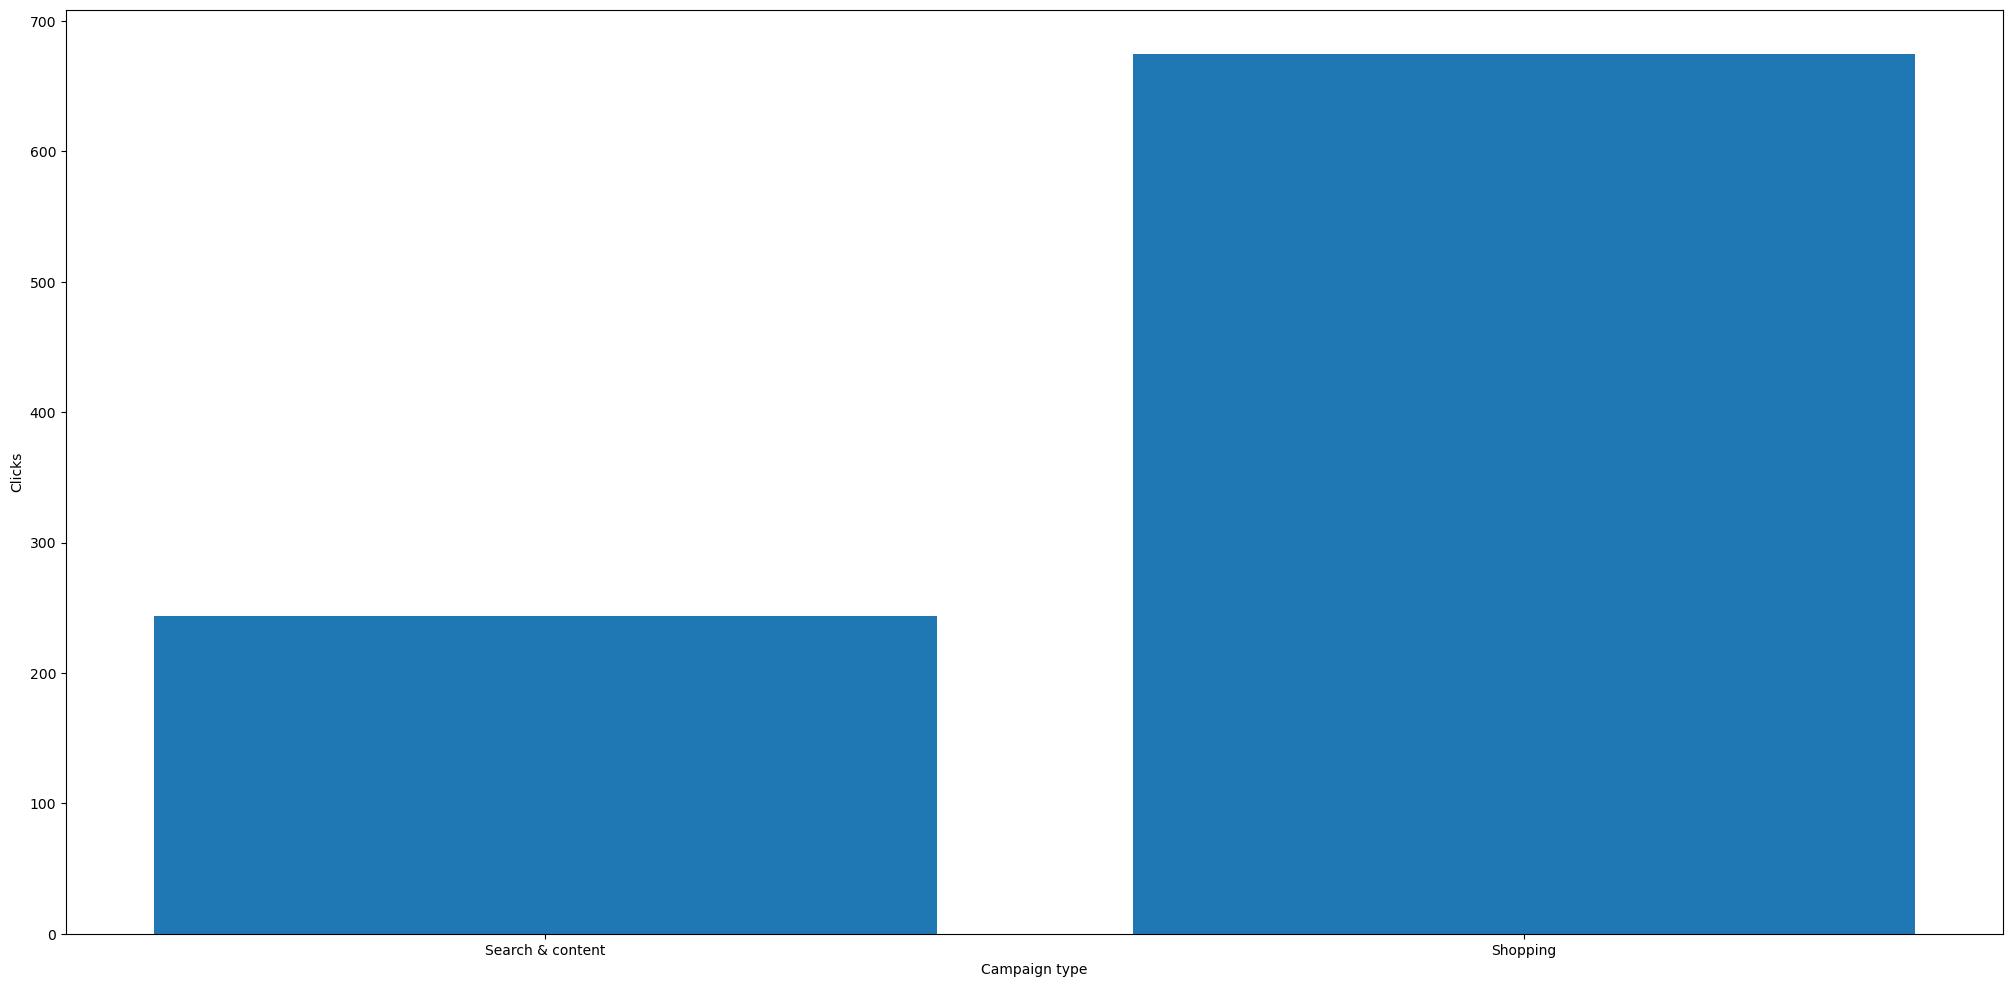

In [121]:
plt.figure(figsize=(25,12))
plt.bar(microsoftads_performance['Campaign type'], microsoftads_performance['Clicks'])
plt.xlabel("Campaign type")
plt.ylabel("Clicks")
plt.show()

In [122]:
corr=microsoftads_performance.corr()
corr.style.background_gradient(cmap="coolwarm")

C:\Users\nensi\AppData\Local\Temp\ipykernel_24312\2930190952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=microsoftads_performance.corr()


,Impressions,Clicks,Cost,Conversions,Revenue
Impressions,1.000000,0.916940,0.386347,-0.222846,-0.307176
Clicks,0.916940,1.000000,0.595883,0.061336,-0.066012
Cost,0.386347,0.595883,1.000000,0.486614,0.333752
Conversions,-0.222846,0.061336,0.486614,1.000000,0.789789
Revenue,-0.307176,-0.066012,0.333752,0.789789,1.000000


<Axes: xlabel='Campaign type', ylabel='Cost'>

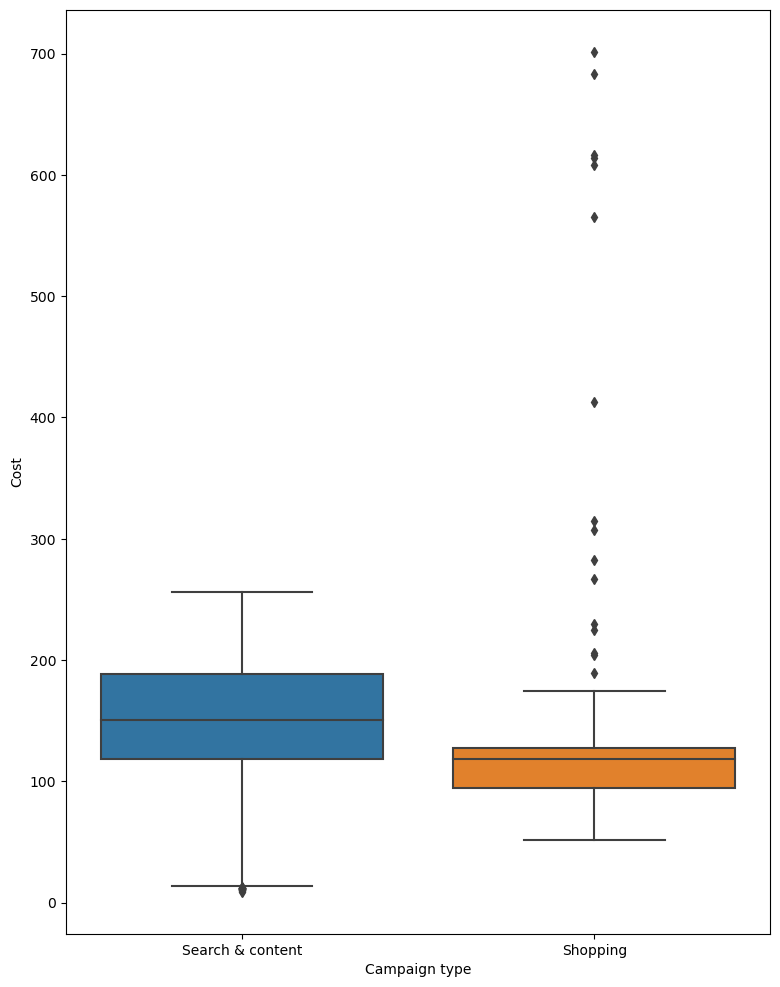

In [123]:
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
sns.boxplot(x="Campaign type", y="Cost", data=microsoftads_performance)

<Axes: xlabel='Campaign type', ylabel='Conversions'>

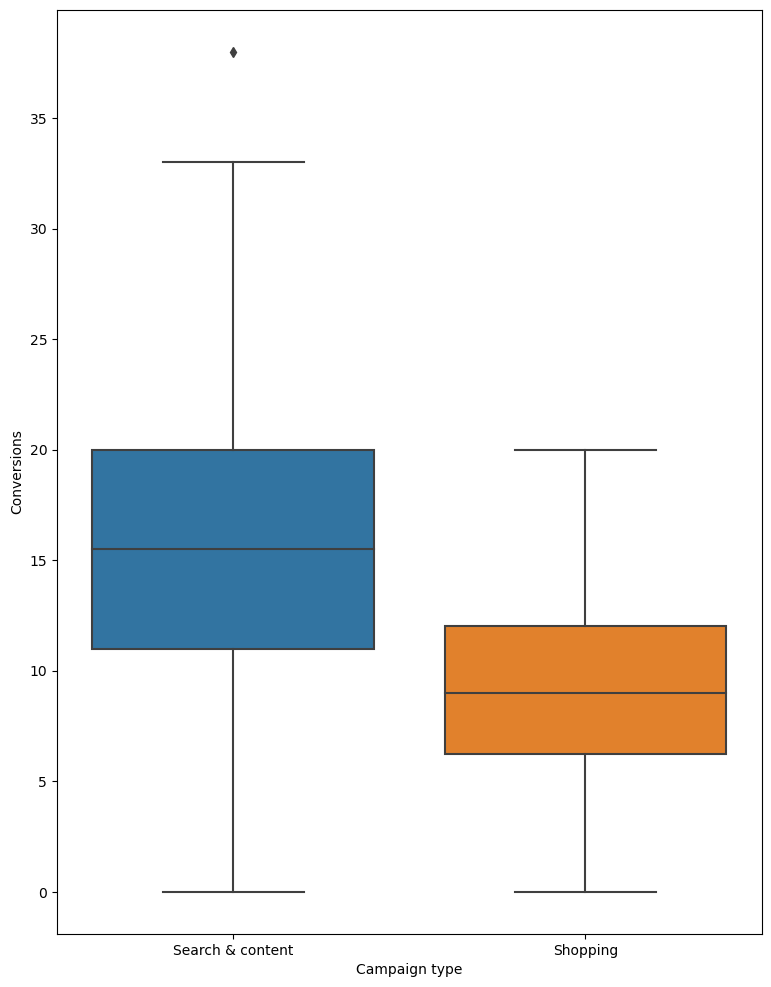

In [124]:
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
sns.boxplot(x="Campaign type", y="Conversions", data=microsoftads_performance)

<Axes: xlabel='Campaign type', ylabel='Revenue'>

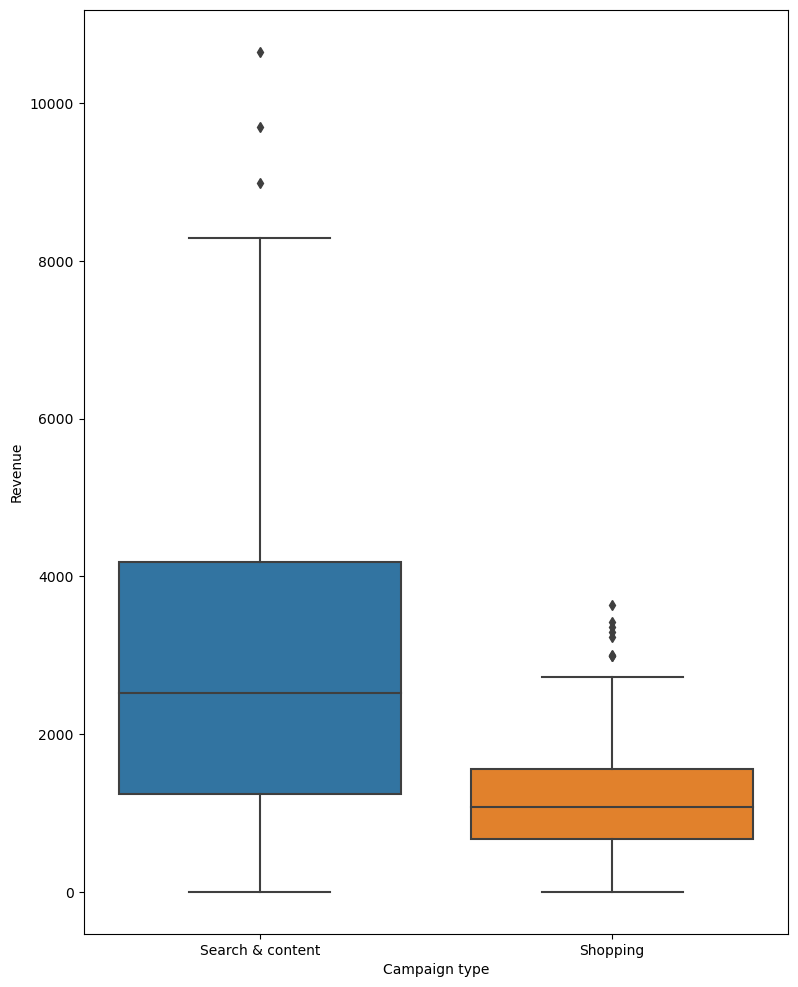

In [125]:
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
sns.boxplot(x="Campaign type", y="Revenue", data=microsoftads_performance)

<Axes: xlabel='Campaign type', ylabel='Clicks'>

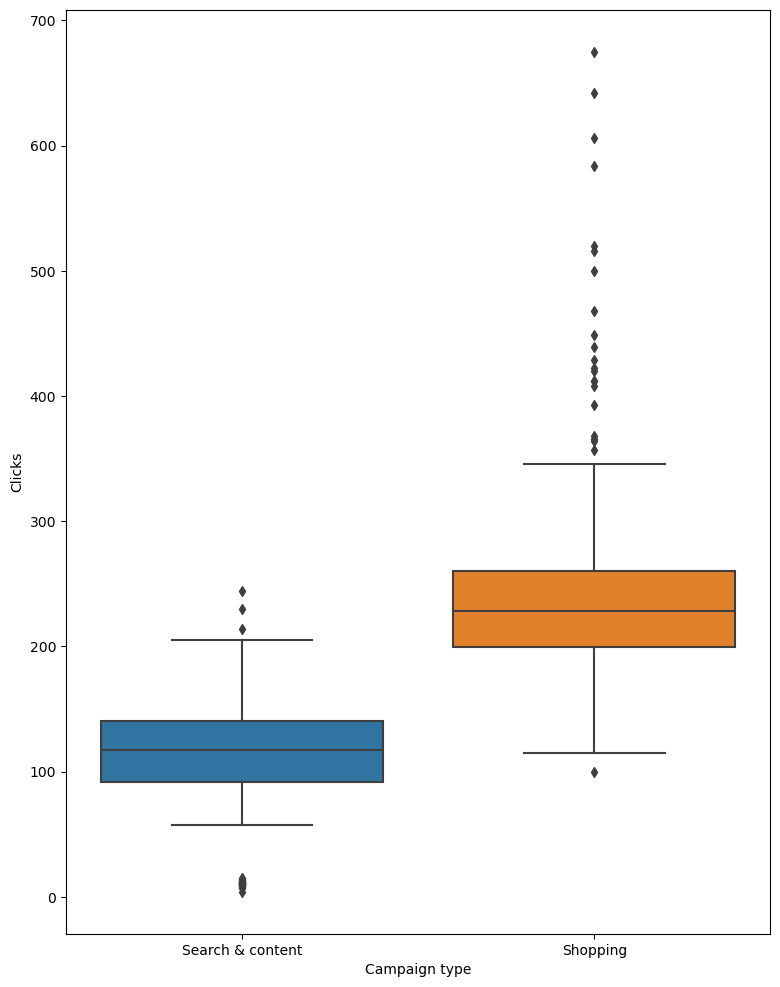

In [126]:
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
sns.boxplot(x="Campaign type", y="Clicks", data=microsoftads_performance)

<Axes: xlabel='Campaign type', ylabel='Impressions'>

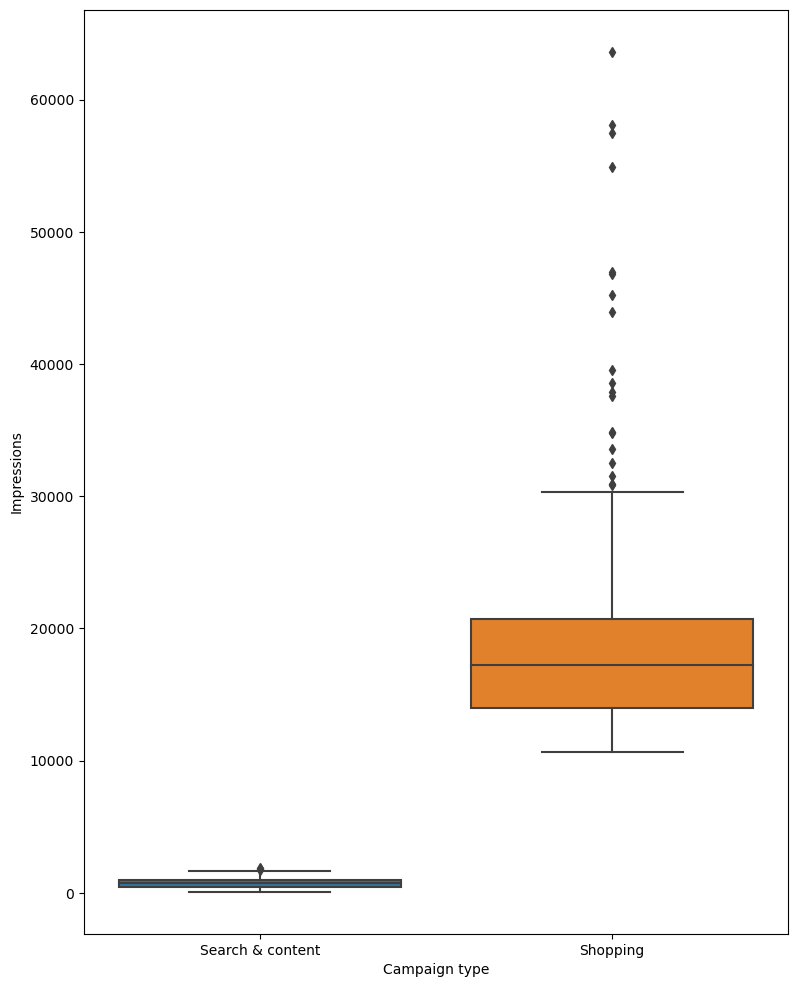

In [127]:
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
sns.boxplot(x="Campaign type", y="Impressions", data=microsoftads_performance)

In [128]:
numeric_columns3=["Impressions", "Clicks", "Cost", "Conversions", "Revenue"]

In [129]:
scaler=StandardScaler()
data_scaled=microsoftads_performance.copy()
data_scaled[numeric_columns3]=scaler.fit_transform(microsoftads_performance[numeric_columns3])
print(scaler.mean_)

[10195.06593407   180.44505495   139.56620879    12.44505495
  1983.52692308]


In [130]:
microsoftads_performance_Impressions_Q1 = microsoftads_performance["Impressions"].quantile(0.25)
microsoftads_performance_Impressions_Q3 = microsoftads_performance["Impressions"].quantile(0.75)
microsoftads_performance_Impressions_iqr = microsoftads_performance_Impressions_Q3 - microsoftads_performance_Impressions_Q1

In [131]:
upper_microsoftads_performance_Impressions = microsoftads_performance_Impressions_Q3 + 1.5 * microsoftads_performance_Impressions_iqr
lower_microsoftads_performance_Impressions = microsoftads_performance_Impressions_Q1 - 1.5 * microsoftads_performance_Impressions_iqr

In [132]:
microsoftads_performance[microsoftads_performance['Impressions'] < lower_microsoftads_performance_Impressions]

,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue


In [133]:
microsoftads_performance[microsoftads_performance['Impressions'] > upper_microsoftads_performance_Impressions]

,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue
5,Shopping,43958.0,516.0,314.7,20.0,3225.9
19,Shopping,45231.0,468.0,282.7,19.0,1513.6
21,Shopping,46996.0,520.0,307.4,19.0,1820.1
129,Shopping,63625.0,675.0,616.3,16.0,2345.0
131,Shopping,58096.0,606.0,608.5,16.0,1495.0
135,Shopping,46815.0,500.0,412.5,12.0,1379.2
137,Shopping,57476.0,642.0,683.4,16.0,2008.0
141,Shopping,54917.0,584.0,701.5,20.0,2397.1


In [134]:
microsoftads_performance['Impressions'] = np.where(
    microsoftads_performance['Impressions'] > upper_microsoftads_performance_Impressions,
    upper_microsoftads_performance_Impressions,
    np.where(
    microsoftads_performance['Impressions'] < lower_microsoftads_performance_Impressions,
    lower_microsoftads_performance_Impressions, microsoftads_performance['Impressions']))

<Axes: xlabel='Impressions'>

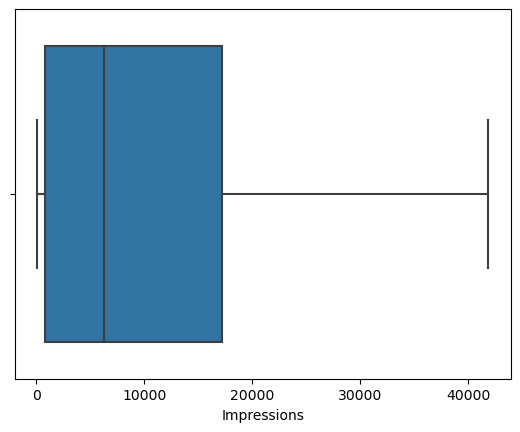

In [135]:
sns.boxplot(x="Impressions", data=microsoftads_performance)

In [136]:
microsoftads_performance_Clicks_Q1 = microsoftads_performance["Clicks"].quantile(0.25)
microsoftads_performance_Clicks_Q3 = microsoftads_performance["Clicks"].quantile(0.75)
microsoftads_performance_Clicks_iqr = microsoftads_performance_Clicks_Q3 - microsoftads_performance_Clicks_Q1

In [137]:
upper_microsoftads_performance_Clicks = microsoftads_performance_Clicks_Q3 + 1.5 * microsoftads_performance_Clicks_iqr
lower_microsoftads_performance_Clicks = microsoftads_performance_Clicks_Q1 - 1.5 * microsoftads_performance_Clicks_iqr

In [138]:
microsoftads_performance[microsoftads_performance['Clicks'] < lower_microsoftads_performance_Clicks]

,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue


In [139]:
microsoftads_performance[microsoftads_performance['Clicks'] > upper_microsoftads_performance_Clicks]

,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue
5,Shopping,41862.5,516.0,314.7,20.0,3225.9
7,Shopping,37614.0,439.0,229.4,10.0,1245.4
9,Shopping,33612.0,408.0,189.6,8.0,952.0
15,Shopping,34861.0,420.0,205.8,10.0,801.4
17,Shopping,39549.0,429.0,224.6,16.0,2516.6
19,Shopping,41862.5,468.0,282.7,19.0,1513.6
21,Shopping,41862.5,520.0,307.4,19.0,1820.1
23,Shopping,30863.0,449.0,266.6,9.0,757.3
35,Shopping,34764.0,412.0,204.2,20.0,1546.0
129,Shopping,41862.5,675.0,616.3,16.0,2345.0


In [140]:
microsoftads_performance['Clicks'] = np.where(
    microsoftads_performance['Clicks'] > upper_microsoftads_performance_Clicks,
    upper_microsoftads_performance_Clicks,
    np.where(
    microsoftads_performance['Clicks'] < lower_microsoftads_performance_Clicks,
    lower_microsoftads_performance_Clicks, microsoftads_performance['Clicks']))

<Axes: xlabel='Clicks'>

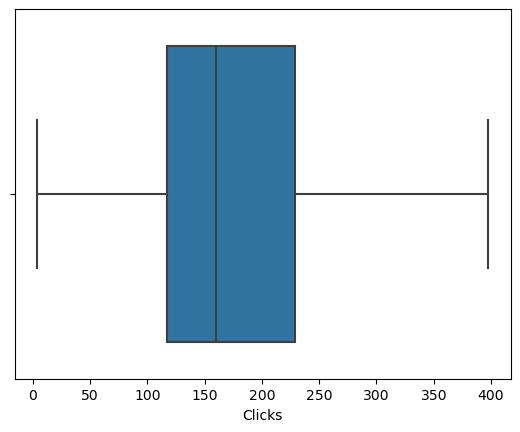

In [141]:
sns.boxplot(x="Clicks", data=microsoftads_performance)

In [142]:
microsoftads_performance_Cost_Q1 = microsoftads_performance["Cost"].quantile(0.25)
microsoftads_performance_Cost_Q3 = microsoftads_performance["Cost"].quantile(0.75)
microsoftads_performance_Cost_iqr = microsoftads_performance_Cost_Q3 - microsoftads_performance_Cost_Q1

In [143]:
upper_microsoftads_performance_Cost = microsoftads_performance_Cost_Q3 + 1.5 * microsoftads_performance_Cost_iqr
lower_microsoftads_performance_Cost = microsoftads_performance_Cost_Q1 - 1.5 * microsoftads_performance_Cost_iqr

In [144]:
microsoftads_performance[microsoftads_performance['Cost'] < lower_microsoftads_performance_Cost]

,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue


In [145]:
microsoftads_performance[microsoftads_performance['Cost'] > upper_microsoftads_performance_Cost]

,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue
5,Shopping,41862.5,397.625,314.7,20.0,3225.9
19,Shopping,41862.5,397.625,282.7,19.0,1513.6
21,Shopping,41862.5,397.625,307.4,19.0,1820.1
23,Shopping,30863.0,397.625,266.6,9.0,757.3
129,Shopping,41862.5,397.625,616.3,16.0,2345.0
131,Shopping,41862.5,397.625,608.5,16.0,1495.0
133,Shopping,38530.0,397.625,613.7,8.0,613.6
135,Shopping,41862.5,397.625,412.5,12.0,1379.2
137,Shopping,41862.5,397.625,683.4,16.0,2008.0
139,Shopping,37896.0,397.625,565.5,8.0,918.3


In [146]:
microsoftads_performance['Cost'] = np.where(
    microsoftads_performance['Cost'] > upper_microsoftads_performance_Cost,
    upper_microsoftads_performance_Cost,
    np.where(
    microsoftads_performance['Cost'] < lower_microsoftads_performance_Cost,
    lower_microsoftads_performance_Cost, microsoftads_performance['Cost']))

<Axes: xlabel='Cost'>

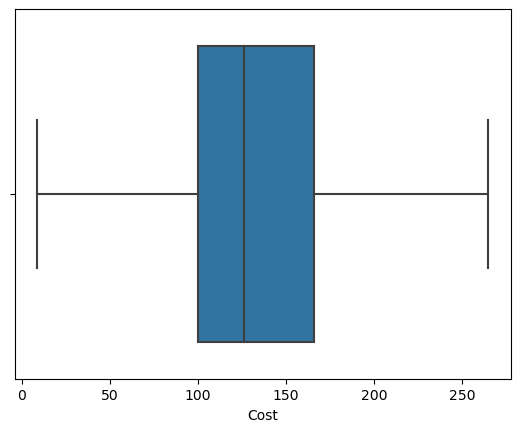

In [147]:
sns.boxplot(x="Cost", data=microsoftads_performance)

In [148]:
# Feature Engineering: Calculate conversion rates
microsoftads_performance['conversion_rate'] = microsoftads_performance['Conversions'] / microsoftads_performance['Clicks']

In [149]:
# Display summary statistics
microsoftads_performance.describe()

,Impressions,Clicks,Cost,Conversions,Revenue,conversion_rate
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,9969.203297,176.214286,132.812878,12.445055,1983.526923,0.096999
std,10643.198635,89.277565,56.930862,6.715366,1725.411177,0.082874
min,87.000000,4.000000,9.000000,0.000000,0.000000,0.000000
25%,763.750000,117.000000,99.900000,8.000000,769.450000,0.040179
50%,6271.000000,160.000000,126.450000,12.000000,1500.150000,0.064355
75%,17203.250000,229.250000,165.925000,16.000000,2698.400000,0.144235
max,41862.500000,397.625000,264.962500,38.000000,10654.100000,0.777778


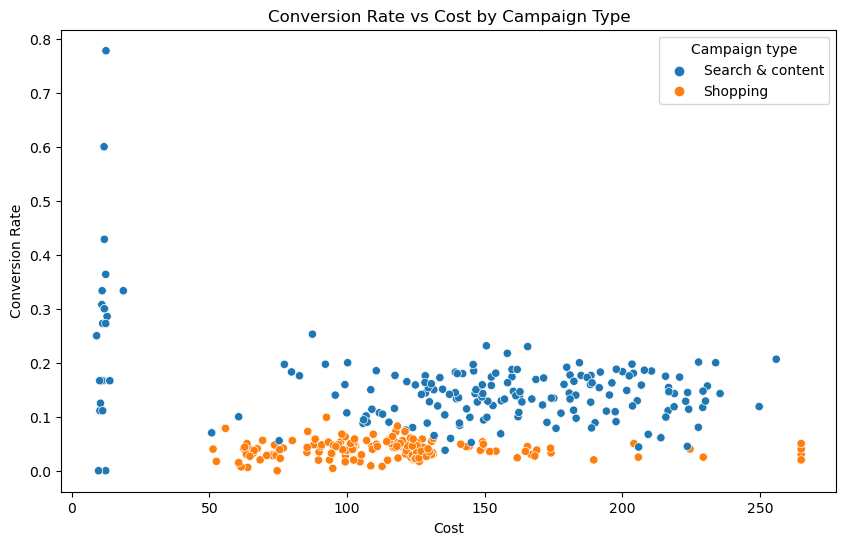

In [150]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Cost', y='conversion_rate', hue='Campaign type', data=microsoftads_performance)
plt.title('Conversion Rate vs Cost by Campaign Type')
plt.xlabel('Cost')
plt.ylabel('Conversion Rate')
plt.show()

In [151]:
# Define features (X) and target (y)
X = microsoftads_performance[['Cost', 'Impressions', 'Clicks']]
y = microsoftads_performance['Conversions']

In [152]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [153]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [154]:
# Predict conversions on the test set
y_pred = model.predict(X_test)

In [155]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [156]:
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')

Mean Absolute Error: 2.8433550584185507
R2 Score: 0.4676619517155345


In [157]:
# Group by Campaign type to get conversion and cost data
campaign_performance = microsoftads_performance.groupby('Campaign type').agg({
    'Cost': 'sum',
    'Conversions': 'sum'
}).reset_index()
campaign_performance

,Campaign type,Cost,Conversions
0,Search & content,26229.9000,2790.0
1,Shopping,22113.9875,1740.0


In [158]:
# Initialize parameters
n_campaigns = len(campaign_performance)  # Number of campaign types
total_budget = 200000  # Total budget to allocate
min_budget = 0.1 * total_budget  # Minimum budget allocation to each campaign
campaign_performance['Allocated Budget'] = min_budget  # Initialize with minimum budget

In [159]:
# Define Epsilon-Greedy parameters
epsilon = 0.1  # Exploration probability
n_rounds = 100  # Number of rounds (iterations) for budget allocation

In [160]:
# Track total conversions and budget allocated
total_conversions = 0
allocated_budgets = np.zeros(n_campaigns)

In [161]:
# Multi-Armed Bandit - Epsilon-Greedy Algorithm
for _ in range(n_rounds):
    # Exploration vs Exploitation
    if random.random() < epsilon:
        # Exploration: Randomly select a campaign
        campaign_index = random.randint(0, n_campaigns - 1)
    else:
        # Exploitation: Select the campaign with the best conversion rate
        conversion_rates = campaign_performance['Conversions'] / campaign_performance['Cost']
        campaign_index = np.argmax(conversion_rates)

    # Allocate a small portion of the remaining budget to the selected campaign
    remaining_budget = total_budget - campaign_performance['Allocated Budget'].sum()
    budget_to_allocate = remaining_budget / (n_rounds - _)

    campaign_performance.loc[campaign_index, 'Allocated Budget'] += budget_to_allocate

    # Update the total conversions
    conversion_rate = campaign_performance.loc[campaign_index, 'Conversions'] / campaign_performance.loc[campaign_index, 'Cost']
    total_conversions += conversion_rate * budget_to_allocate

In [162]:
# Print the final budget allocation and estimated conversions
print(campaign_performance[['Campaign type', 'Allocated Budget']])
print(f"Total Estimated Conversions: {total_conversions:.2f}")

      Campaign type  Allocated Budget
0  Search & content          180000.0
1          Shopping           20000.0
Total Estimated Conversions: 17018.75


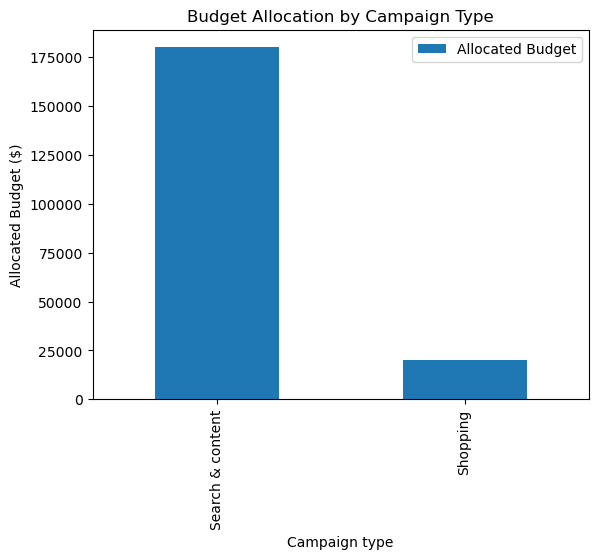

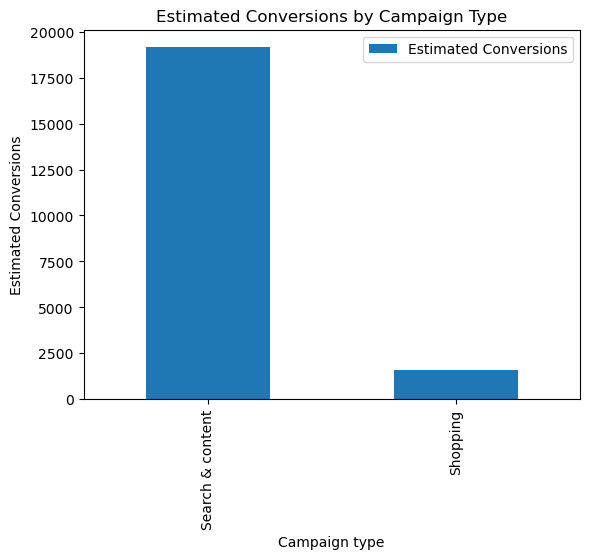

In [163]:
# Plot Allocated Budget vs. Campaign Type
campaign_performance.plot(kind='bar', x='Campaign type', y='Allocated Budget', title='Budget Allocation by Campaign Type')
plt.ylabel('Allocated Budget ($)')
plt.show()

# Plot Estimated Conversions vs. Campaign Type
campaign_performance['Estimated Conversions'] = campaign_performance['Allocated Budget'] * (campaign_performance['Conversions'] / campaign_performance['Cost'])
campaign_performance.plot(kind='bar', x='Campaign type', y='Estimated Conversions', title='Estimated Conversions by Campaign Type')
plt.ylabel('Estimated Conversions')
plt.show()

# 4. Website Landings

In [164]:
website_landings = pd.read_csv("website-landings2.csv")
website_landings

,User Id,Website Landing Time,Is Converted,Source,Channel,Campaign Type
0,f7093a95,2024-02-02 01:19:03,0,google,organic search,NaN
1,f7093a95,2024-02-20 17:53:27,0,google,organic search,NaN
2,f7093a95,2024-03-03 04:51:34,0,google,organic search,NaN
3,f7093a95,2024-04-23 04:28:26,0,NaN,direct,NaN
4,f7093a95,2024-04-23 04:29:56,0,NaN,direct,NaN
...,...,...,...,...,...,...
2913106,9c6b6077,2024-05-28 00:00:35,0,facebook,paid,NaN
2913107,31aa3826,2024-05-28 00:01:20,0,facebook,paid,NaN
2913108,822ef39f,2024-05-28 00:00:58,0,facebook,paid,NaN
2913109,f31cf3e7,2024-05-28 00:00:21,0,facebook,paid,NaN


In [165]:
website_landings.head()

,User Id,Website Landing Time,Is Converted,Source,Channel,Campaign Type
0,f7093a95,2024-02-02 01:19:03,0,google,organic search,NaN
1,f7093a95,2024-02-20 17:53:27,0,google,organic search,NaN
2,f7093a95,2024-03-03 04:51:34,0,google,organic search,NaN
3,f7093a95,2024-04-23 04:28:26,0,NaN,direct,NaN
4,f7093a95,2024-04-23 04:29:56,0,NaN,direct,NaN


In [166]:
website_landings.tail()

,User Id,Website Landing Time,Is Converted,Source,Channel,Campaign Type
2913106,9c6b6077,2024-05-28 00:00:35,0,facebook,paid,NaN
2913107,31aa3826,2024-05-28 00:01:20,0,facebook,paid,NaN
2913108,822ef39f,2024-05-28 00:00:58,0,facebook,paid,NaN
2913109,f31cf3e7,2024-05-28 00:00:21,0,facebook,paid,NaN
2913110,5b358884,2024-05-28 00:01:27,0,facebook,paid,NaN


In [167]:
website_landings.shape

(2913111, 6)

In [168]:
website_landings.columns

Index(['User Id', 'Website Landing Time', 'Is Converted', 'Source', 'Channel',
       'Campaign Type'],
      dtype='object')

In [169]:
website_landings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2913111 entries, 0 to 2913110
Data columns (total 6 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   User Id               object
 1   Website Landing Time  object
 2   Is Converted          int64 
 3   Source                object
 4   Channel               object
 5   Campaign Type         object
dtypes: int64(1), object(5)
memory usage: 133.4+ MB


In [170]:
website_landings.describe()

,Is Converted
count,2.913111e+06
mean,2.072080e-02
std,1.424481e-01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.000000e+00


In [171]:
website_landings.describe(include="object")

,User Id,Website Landing Time,Source,Channel,Campaign Type
count,2913111,2913111,1182831,2913111,661620
unique,1811724,2544386,34,7,5
top,5cbc5066,2024-05-27 00:01:23,google,direct,Cross-network
freq,5262,64,764772,1661350,436326


In [172]:
website_landings.isnull()

,User Id,Website Landing Time,Is Converted,Source,Channel,Campaign Type
0,False,False,False,False,False,True
1,False,False,False,False,False,True
2,False,False,False,False,False,True
3,False,False,False,True,False,True
4,False,False,False,True,False,True
...,...,...,...,...,...,...
2913106,False,False,False,False,False,True
2913107,False,False,False,False,False,True
2913108,False,False,False,False,False,True
2913109,False,False,False,False,False,True


In [173]:
website_landings.isnull().sum()

User Id                       0
Website Landing Time          0
Is Converted                  0
Source                  1730280
Channel                       0
Campaign Type           2251491
dtype: int64

In [174]:
website_landings["Campaign Type"].unique()

array([nan, 'Cross-network', 'Search Network', 'Shopping',
       'Search & content', 'Display Network'], dtype=object)

In [175]:
website_landings["Source"].unique()

array(['google', nan, 'listrak', 'youtube', 'facebook', 'bing', 'yahoo!',
       'duckduckgo', 'yahoo! mail', 'aol', 'mail.ru', 'yandex', 'ecosia',
       'gmail', 'twitter', 'instagram', 'reddit', 'linkedin', 'pinterest',
       'earthlink', 'telegram', 'infospace', 'amazon', 'tiktok', 'bronto',
       'aol mail', 'snapchat', 'outlook.com', 'kvasir', 'vkontakte',
       'zoho', 'skype', 'qwant', 'baidu', 'quora'], dtype=object)

In [176]:
# Group by Campaign Type and calculate the total conversions and total impressions for each
campaign_data = website_landings.groupby('Campaign Type').agg({
    'Is Converted': ['sum', 'count']
}).reset_index()
campaign_data

Campaign Type Is Converted        
                             sum   count
0     Cross-network        11764  436326
1   Display Network          302   11865
2  Search & content          646   20011
3    Search Network         3965  148312
4          Shopping         1396   45106

In [177]:
# Rename columns for clarity
campaign_data.columns = ['Campaign Type', 'Total Conversions', 'Total Impressions']

In [178]:
# Define the number of simulations
N = 10000

In [179]:
# Initialize variables to track rewards and selections
n_campaigns = len(campaign_data)
numbers_of_rewards_1 = [0] * n_campaigns
numbers_of_rewards_0 = [0] * n_campaigns
total_rewards = [0] * n_campaigns

In [180]:
# Implement Thompson Sampling
for n in range(N):
    campaign_selected = 0
    max_random = 0
    for i in range(n_campaigns):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            campaign_selected = i
    reward = website_landings.loc[website_landings['Campaign Type'] == campaign_data['Campaign Type'][campaign_selected], 'Is Converted'].sample().values[0]
    if reward == 1:
        numbers_of_rewards_1[campaign_selected] += 1
    else:
        numbers_of_rewards_0[campaign_selected] += 1
    total_rewards[campaign_selected] += reward

In [181]:
# Calculate the proportion of budget to be allocated to each campaign
total_reward_sum = sum(total_rewards)
budget_proportions = [reward / total_reward_sum for reward in total_rewards]

In [182]:
# Assuming a total budget of $200,000
total_budget = 200000
allocated_budgets = [round(prop * total_budget, 2) for prop in budget_proportions]

In [183]:
# Create a DataFrame to present the results
results = pd.DataFrame({
    'Campaign Type': campaign_data['Campaign Type'],
    'Allocated Budget': allocated_budgets,
    'Conversion Rate': campaign_data['Total Conversions'] / campaign_data['Total Impressions']
})

In [184]:
print("Budget Allocation:")
print(results)

Budget Allocation:
      Campaign Type  Allocated Budget  Conversion Rate
0     Cross-network          12140.58         0.026961
1   Display Network          13418.53         0.025453
2  Search & content          18530.35         0.032282
3    Search Network          56869.01         0.026734
4          Shopping          99041.53         0.030949
